In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [118]:
data=pd.read_csv('mnist_train.csv', header=None)
testdata=pd.read_csv('mnist_test.csv', header=None)
data = np.array(data)

data_input = data[:, 1:]
# n = data_input.shape[0]
# print(n)
bias = np.ones([n, 1])
x_input=np.append(data_input, bias, axis = 1)
# print(x_input.shape)
# print(bias)

data_labels = data[:, 0]
# print(data_labels)
# print(data_labels[0])
# print(data_labels.shape[0])

#give the output vector for a given label
y_output = np.zeros([n, 10])
for i in range(n):
    y_output[i][data_labels[i]] = 1

# print(y_output[0])
# print(y_output.shape)
testdata[784]=1
test_inp=np.array(testdata)
test_inp.shape


(3000, 785)

In [119]:
# return the label for a given output vector
def return_label(y):
    return np.argmax(y)

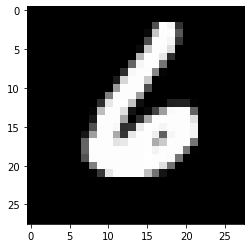

In [120]:
# visualisation of the given data pixels
def return_image(input):
    input = input.reshape(28,28)
    return plt.imshow(input, cmap='gray')  
return_image(data_input[3])

In [121]:
#activation functions
def activation_function(type, a):
    if type == 'sigmoid':
        return (1.0/(1.0 + np.exp(-a)))
    
    elif type == 'relu':
        return np.maximum(0, a)
    
    elif type == 'tanh':
        x1 = np.exp(a)
        x2 = np.exp(-a)
        return ((x1-x2)/(x1+x2))
    
    elif type == 'softmax':
        a = np.exp(a)
        return a/np.sum(a)
       

In [122]:
#derivative of activation functions
def activation_derivative(type, a):
    if type == 'sigmoid':
        S = activation_function('sigmoid', a)
        dS = S * (1 - S)
        return dS

    elif type == 'tanh':
        T = activation_function('tanh', a)
        return 1-T**2
    
    elif type == 'relu':
        a[a <= 0] = 0
        a[a>0]=1
        return a


In [123]:
# structure of the neural network
nn_structure = [
    [785, 'None'], [275, 'tanh'], [10, 'softmax']
]


def neural_network(nn_structure):
    #np.random.seed(seed)
    n_layers = len(nn_structure)
    W = [' '] # W[i] will give the weights of the ith layer
    V = [' ']
    net=[' ']
    errors = [' ']
    for i in range(1, n_layers):
        weights = np.random.randn(nn_structure[i][0], nn_structure[i-1][0])
        weights = np.true_divide(weights,500)
        W.append(weights)
        values = np.zeros((nn_structure[i][0], 1))
        V.append(values)
        net.append(values)
        errors.append(values)
    return V, W, net, errors


#(neural_network(nn_structure, seed)[0][1]).shape
print((np.array([x_input[0]])).shape) # a row vector

(1, 785)


In [124]:
#forward propagation of neural network, and calculates the values of neurons
def forward_propogation(x_vector, y_vector, V, W, net, errors):
    n_layers = len(nn_structure)
    V[0]=x_vector
    for i in range(1, n_layers):
        n_neurons = nn_structure[i][0] #number of neurons in the ith layer
        activation_type = nn_structure[i][1]
        net[i] = W[i]@(V[i-1]) 
        V[i] = activation_function(activation_type, net[i])
        if i!=n_layers-1:
            V[i][n_neurons-1] = 1
        
    y_output_obtained = V[n_layers-1]  #final output obtained
    errors[n_layers-1] = y_vector-y_output_obtained
    
    for i in range(n_layers-2, 0, -1):
        derivation_type = nn_structure[i][1]
        errors[i] = W[i+1].T@(errors[i+1])*activation_derivative(derivation_type, net[i])
      
    return V, W, net, errors

# V, W, net, errors = neural_network(nn_structure)
# V, W, net, errors = forward_propogation(x_input[0], y_output[0], V, W, net, errors)
# n = len(nn_structure)
# y=V[n-1]
# print(return_label(y))

#forward_propogation(np.array([x_input[0]]).T, np.array([y_output[0]]).T,  )

In [125]:
#update the weights using the error vectors and learning rate eta by the gradient descent method
def update_weights(W, errors, V, eta):
    n_layers = len(W)
    for i in range (1, n_layers):
        for j in range (len(V[i-1])):
            W[i][:, j] += errors[i]*(eta*V[i-1][j])
    return W


In [126]:
#Stochastic gradient descent with learning rate eta
#returns the updated weights
def grad_descent(x_input, y_output, eta, epoch, V, W, net, errors):
    #V, W, net, errors = neural_network(nn_structure, seed = 3)
    input_size = len(x_input)
    for i in range(epoch):
        for j in range (input_size):
            x_vector = x_input[j]
            y_vector = y_output[j]
            V, W, net, errors = forward_propogation(x_vector, y_vector, V, W, net, errors)
            W = update_weights(W, errors, V, eta)
    return W
        
# V, W, net, errors = neural_network(nn_structure)
# final_weights = grad_descent(x_input, y_output, 0.001, 2, V, W, net, errors)
# print(final_weights)

In [127]:
#Batch gradient descent with a given batch size and learning rate
#returns the updated weights
def batch_grad_descent(x_input, y_output, batch_size, epoch, eta, V, W, net, errors):
    input_size = len(x_input)
#     print(input_size)
    n_layers = len(V)
    iterations = input_size//batch_size
    for l in range(epoch):
        for i in range(iterations):
    #         print(i)
            V, W, net, batch_error_sum = forward_propogation(x_input[i*batch_size], y_output[i*batch_size], V, W, net, errors)
            for j in range(1, batch_size):
    #             print(i*batch_size+j)
                x_vector = x_input[i*batch_size+j]
                y_vector = y_output[i*batch_size+j]

                V, W, net, error_j = forward_propogation(x_vector, y_vector, V, W, net, errors)                
                for k in range(1, n_layers):
                    batch_error_sum[k] += error_j[k]

            for k in range(1, n_layers):
                    batch_error_sum[k] = batch_error_sum[k]*(1/batch_size)

            W = update_weights(W, batch_error_sum, V, eta)
        
    return W
        
# V, W, net, errors = neural_network(nn_structure)
# final_weights = batch_grad_descent(x_input, y_output, 10, 700, 0.001, V, W, net, errors)
# print(final_weights)   
        
    

    

In [130]:
V, W, net, errors = neural_network(nn_structure)
#final_weights = grad_descent(x_input, y_output, 0.001, 2, V, W, net, errors)
#final_weights = batch_grad_descent(x_input, y_output, 10, 2, 0.002, V, W, net, errors)
final_weights = batch_grad_descent(x_input, y_output, 5, 1, 0.001, V, W, net, errors)
acc = 0
for i in range(0,7000):
    V, W, net, errors = forward_propogation(x_input[i], y_output[i], V, final_weights, net, errors)
    n_layers = len(V)
    y = V[n_layers-1]
    label = return_label(y)
#     print(label)
    if label == data_labels[i]:
        acc = acc+1
    
print(acc/7000)
        

  
        
    

0.7941428571428572


In [ ]:
test_output=pd.DataFrame(np.array([]))
for i in range(0,3000):
    v = forward_propogation(test_inp[i], 1, V, final_weights, net, errors)[0][n_layers-1]
    df1=pd.DataFrame(np.array([return_label(v)]))
    test_output=test_output.append(df1)
print(test_output)
test_output.to_csv('out.csv')

C:\Users\gauri\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


[0.7318571428571429, 0.8062857142857143, 0.8175714285714286, 0.7605714285714286, 0.09314285714285714, 0.09314285714285714, 0.09314285714285714]


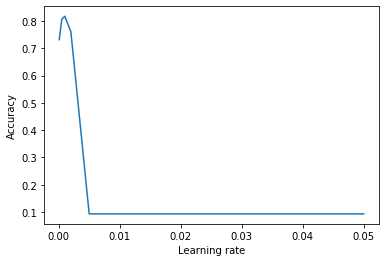

In [26]:
#effect of learning rate on the accuracy of the training model with fixed parameters
# batch_size = 5, epochs = 1, hidden layers = 2


l_rates = [0.0001, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.05]
accuracy = [] 
for i in range (len(l_rates)):
    V, W, net, errors = neural_network(nn_structure)
    final_weights = batch_grad_descent(x_input, y_output, 5, 1, l_rates[i], V, W, net, errors)
    acc = 0
    for i in range(0,7000):
        V, W, net, errors = forward_propogation(x_input[i], y_output[i], V, final_weights, net, errors)
        n_layers = len(V)
        y = V[n_layers-1]
        label = return_label(y)
    #     print(label)
        if label == data_labels[i]:
            acc = acc+1
    accuracy.append(acc/7000) 

plt.plot(l_rates, accuracy)
print(accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.savefig('Accuracy vs l_rate.png')

    

C:\Users\gauri\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


[0.09314285714285714, 0.8095714285714286, 0.7685714285714286, 0.8107142857142857, 0.7761428571428571, 0.7851428571428571, 0.7208571428571429, 0.6994285714285714, 0.7377142857142858]


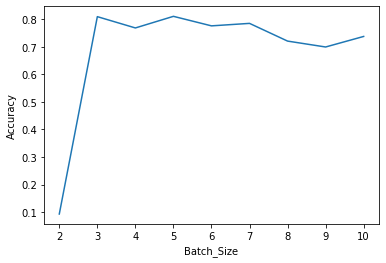

In [31]:
#effect of batch size on the accuracy of the training model with fixed parameters
# learning rate = 0.001, epochs = 1, hidden layers = 2

b_sizes = [2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy = [] 
for i in range (len(b_sizes)):
    V, W, net, errors = neural_network(nn_structure)
    final_weights = batch_grad_descent(x_input, y_output, b_sizes[i], 1, 0.001, V, W, net, errors)
    acc = 0
    for i in range(0,7000):
        V, W, net, errors = forward_propogation(x_input[i], y_output[i], V, final_weights, net, errors)
        n_layers = len(V)
        y = V[n_layers-1]
        label = return_label(y)
    #     print(label)
        if label == data_labels[i]:
            acc = acc+1
    accuracy.append(acc/7000) 

plt.plot(b_sizes, accuracy)
print(accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Batch_Size')
plt.savefig('Accuracy vs b_size.png')

    

[0.8021428571428572, 0.7674285714285715, 0.4307142857142857, 0.175, 0.10142857142857142, 0.08257142857142857, 0.106, 0.08614285714285715]
[0.8021428571428572, 0.7674285714285715, 0.4307142857142857, 0.175, 0.10142857142857142, 0.08257142857142857, 0.106, 0.08614285714285715]


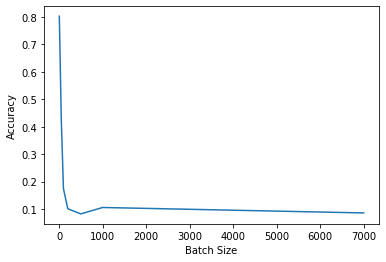

In [22]:
#effect of batch size on the accuracy of the training model with fixed parameters
# learning rate = 0.001, epochs = 1, hidden layers = 2
b_sizes = [5, 10, 50, 100, 200, 500, 1000, 7000]
accuracy = [] 
for i in range (len(b_sizes)):
    V, W, net, errors = neural_network(nn_structure)
    final_weights = batch_grad_descent(x_input, y_output, b_sizes[i], 1, 0.001, V, W, net, errors)
    acc = 0
    for i in range(0,7000):
        V, W, net, errors = forward_propogation(x_input[i], y_output[i], V, final_weights, net, errors)
        n_layers = len(V)
        y = V[n_layers-1]
        label = return_label(y)
    #     print(label)
        if label == data_labels[i]:
            acc = acc+1
            
    accuracy.append(acc/7000) 

plt.plot(b_sizes, accuracy)     
print(accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Batch Size')
plt.savefig('Accuracy vs Batch_size.png')
print(accuracy)

0.7841428571428571
0.8458571428571429
0.8681428571428571
0.8688571428571429
0.878
[0.7841428571428571, 0.8458571428571429, 0.8681428571428571, 0.8688571428571429, 0.878]


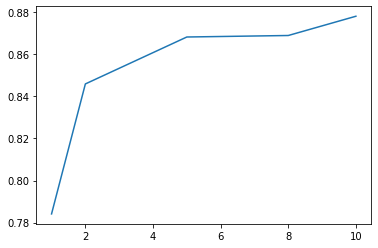

In [17]:
#effect of number of epochs on the accuracy of the training model with fixed parameters
# learning rate = 0.001, batch size = 5, hidden layers = 2
epochs = [1, 2, 5, 8, 10]
accuracy = [] 
for i in range (len(epochs)):
    V, W, net, errors = neural_network(nn_structure)
    final_weights = batch_grad_descent(x_input, y_output, 5, epochs[i], 0.001, V, W, net, errors)
    acc = 0
    for i in range(0,7000):
        V, W, net, errors = forward_propogation(x_input[i], y_output[i], V, final_weights, net, errors)
        n_layers = len(V)
        y = V[n_layers-1]
        label = return_label(y)
    #     print(label)
        if label == data_labels[i]:
            acc = acc+1
    accuracy.append(acc/7000) 
    print(acc/7000)

plt.plot(epochs, accuracy) 
print(accuracy)

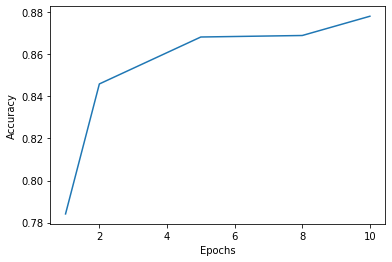

In [45]:
a=[0.7841428571428571, 0.8458571428571429, 0.8681428571428571, 0.8688571428571429, 0.878]
b= [1, 2, 5, 8, 10]
plt.plot(b, a) 
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.savefig('Accuracy vs epoch.png')

0.8108571428571428
0.8088571428571428
0.8041428571428572
[0.8108571428571428, 0.8088571428571428, 0.8041428571428572]


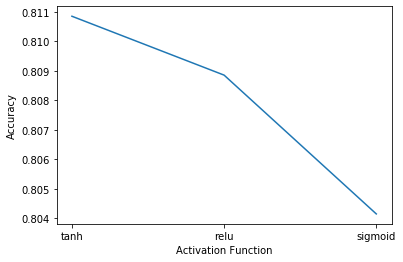

In [19]:
#effect of activation fuinctions used on the accuracy of the training model with fixed parameters
# learning rate = 0.001, batch size = 5, epochs = 1, hidden layers = 2, 
structure_list = [0, 0, 0]
structure_list[0] = [
    [785, 'None'], [275, 'tanh'], [10, 'softmax']
]
structure_list[1] = [
    [785, 'None'], [275, 'relu'], [10, 'softmax']
]

structure_list[2] = [
    [785, 'None'], [275, 'relu'], [10, 'softmax']
]
l = ['tanh', 'relu', 'sigmoid']

accuracy = [] 
for i in range (len(l)):
    V, W, net, errors = neural_network(structure_list[i])
    final_weights = batch_grad_descent(x_input, y_output, 5, 1, 0.001, V, W, net, errors)
    acc = 0
    for i in range(0,7000):
        V, W, net, errors = forward_propogation(x_input[i], y_output[i], V, final_weights, net, errors)
        n_layers = len(V)
        y = V[n_layers-1]
        label = return_label(y)
    #     print(label)
        if label == data_labels[i]:
            acc = acc+1
    accuracy.append(acc/7000) 
    print(acc/7000)

plt.plot(l, accuracy) 
plt.ylabel('Accuracy')
plt.xlabel('Activation Function')
plt.savefig('Accuracy vs Activation.png')
print(accuracy)


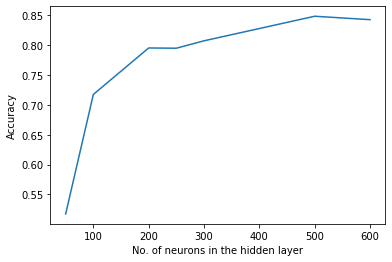

In [93]:
l = [0.5172857142857142, 0.7174285714285714, 0.7952857142857143,  0.7948571428571428, 0.8072857142857143, 0.8484285714285714, 0.8427142857142857 ]
a = [50, 100, 200, 250, 300, 500, 600]
plt.plot(a, l) 
plt.ylabel('Accuracy')
plt.xlabel('No. of neurons in the hidden layer')
plt.savefig('Accuracy vs nneurons.png')


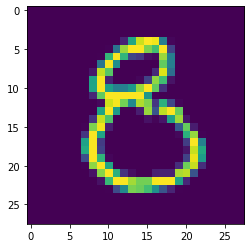

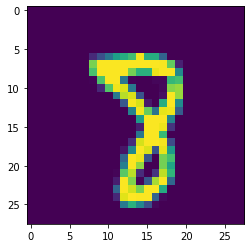

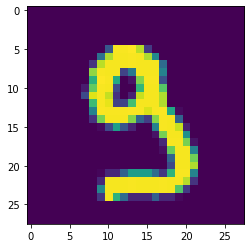

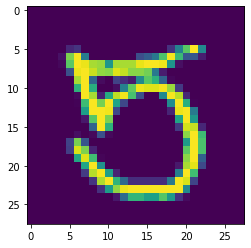

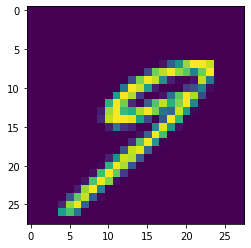

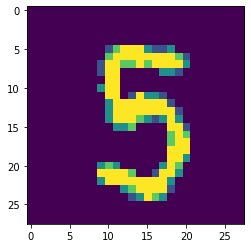

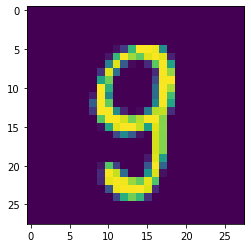

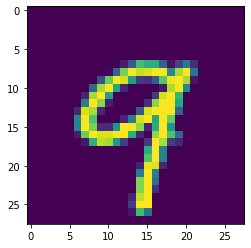

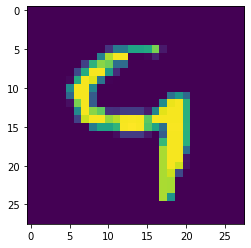

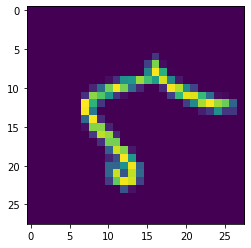

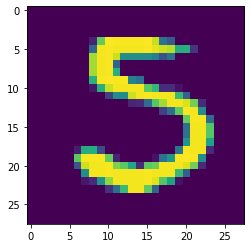

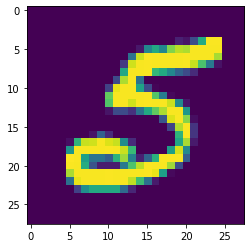

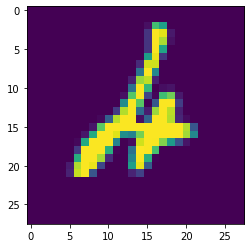

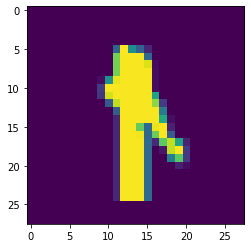

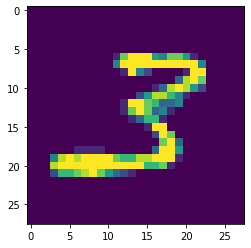

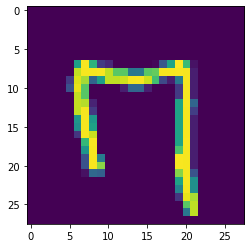

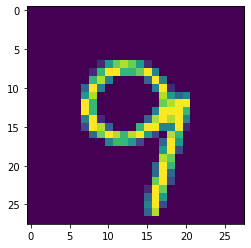

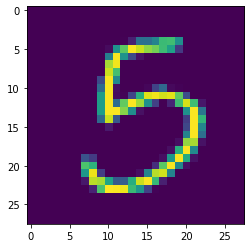

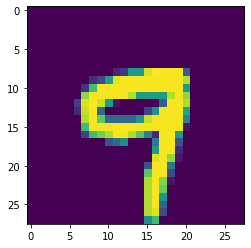

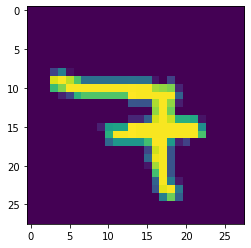

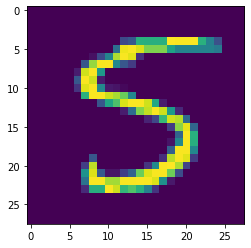

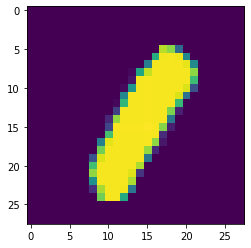

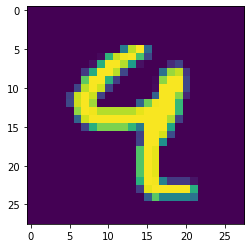

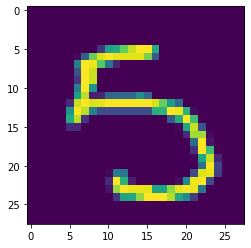

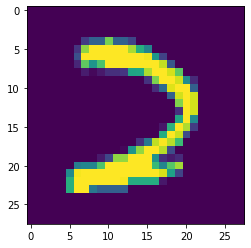

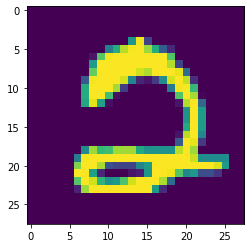

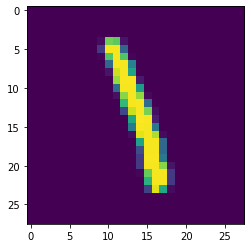

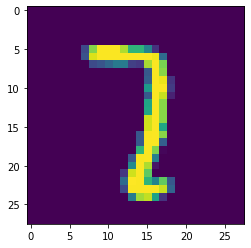

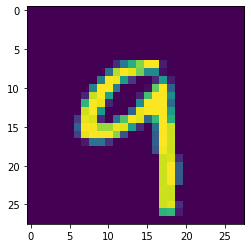

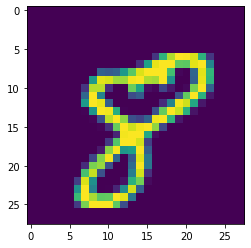

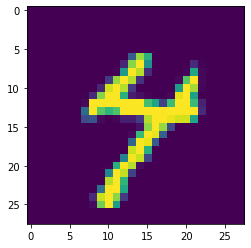

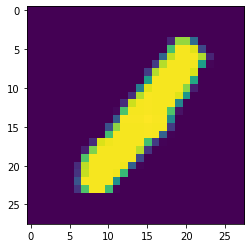

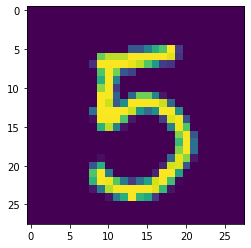

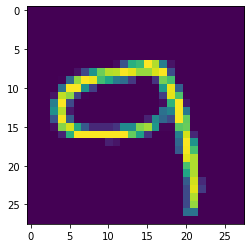

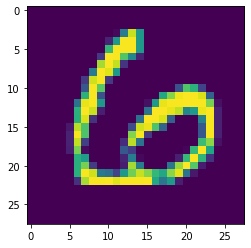

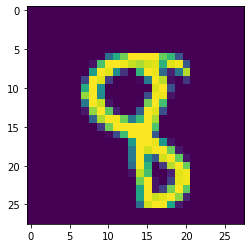

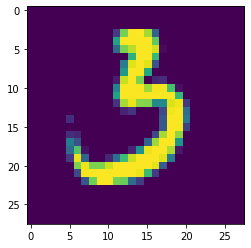

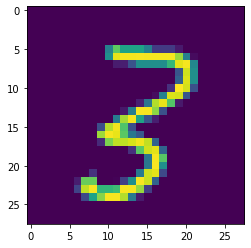

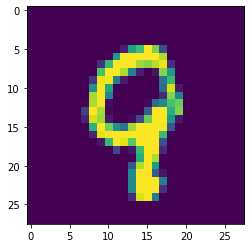

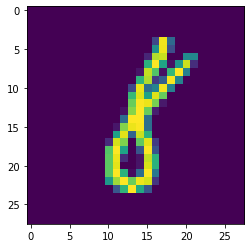

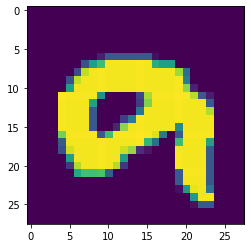

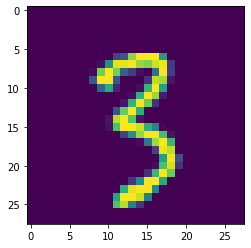

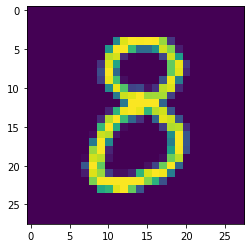

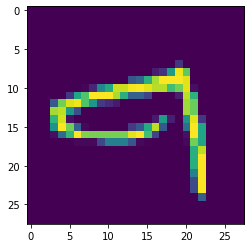

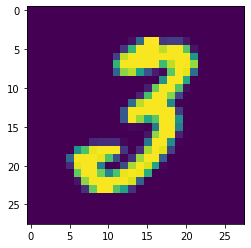

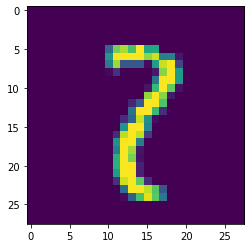

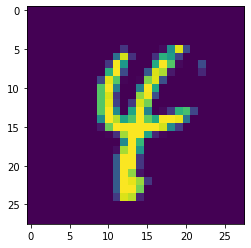

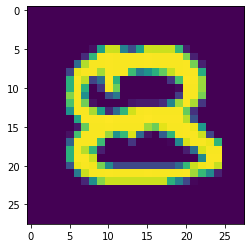

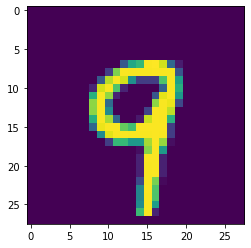

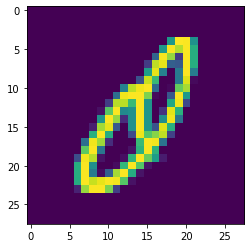

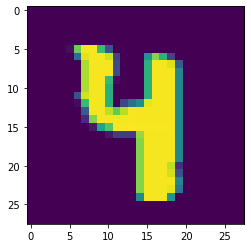

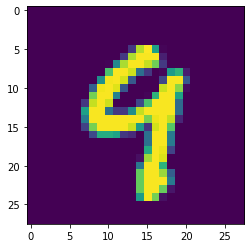

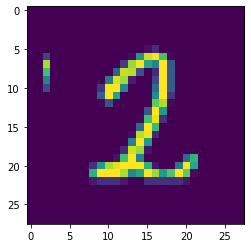

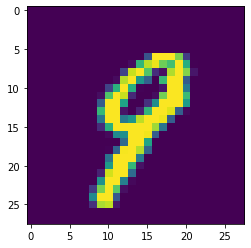

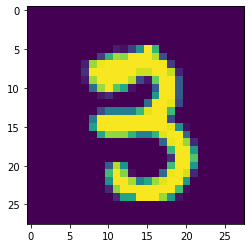

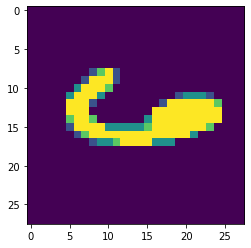

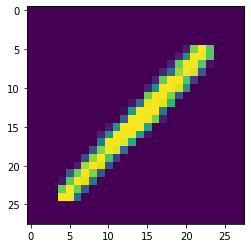

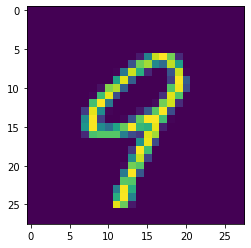

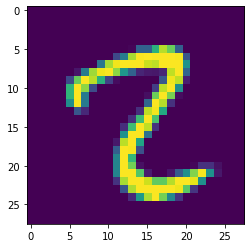

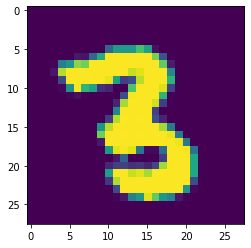

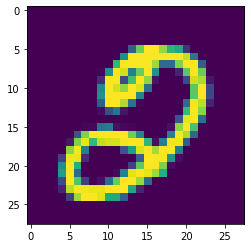

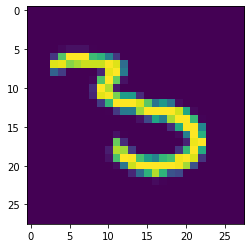

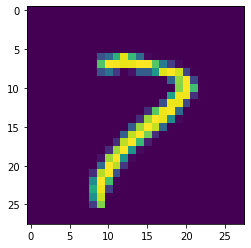

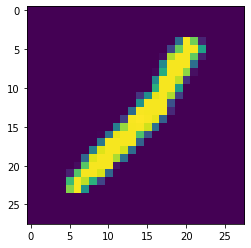

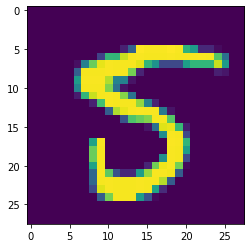

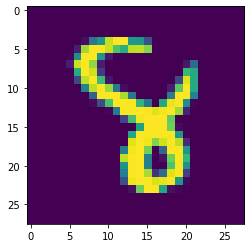

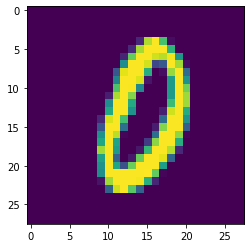

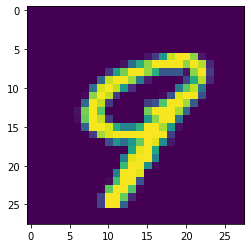

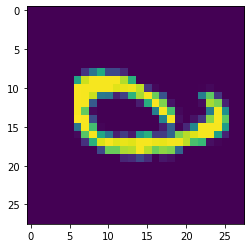

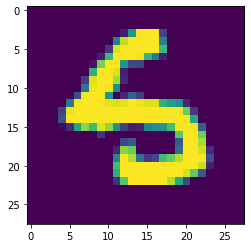

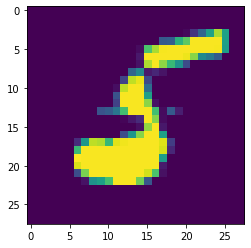

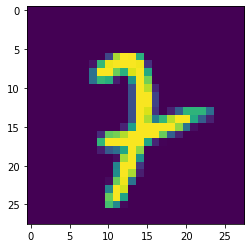

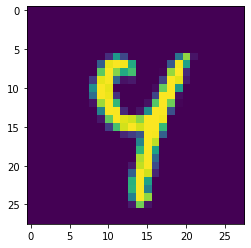

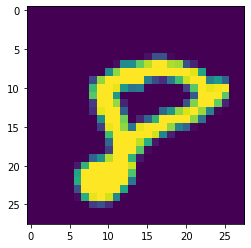

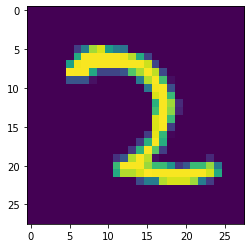

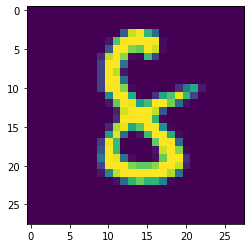

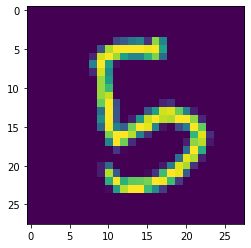

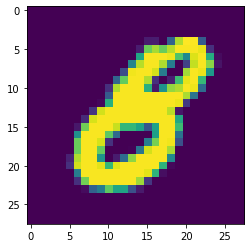

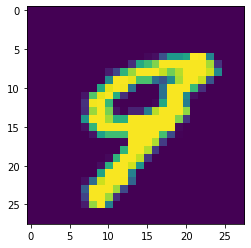

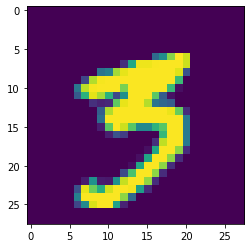

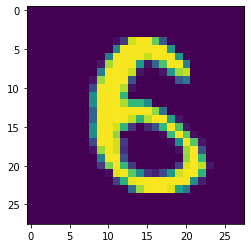

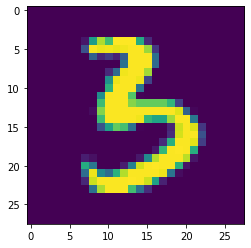

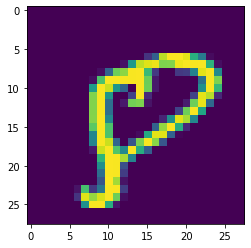

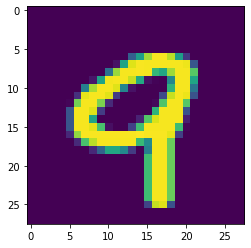

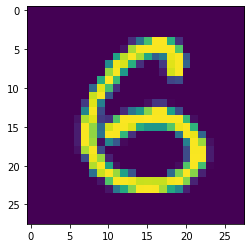

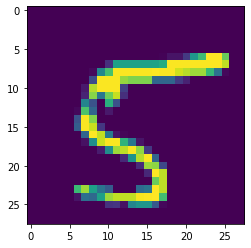

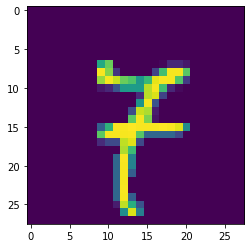

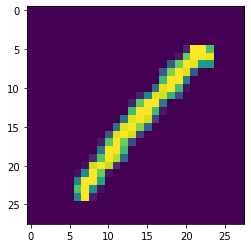

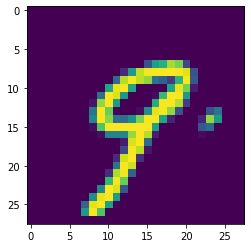

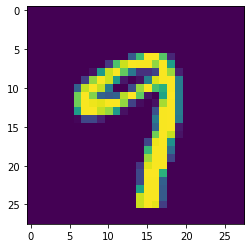

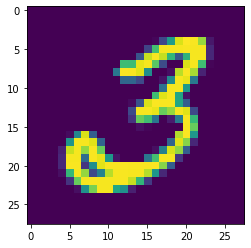

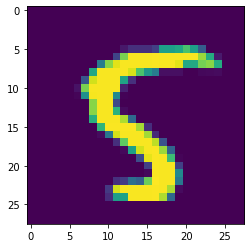

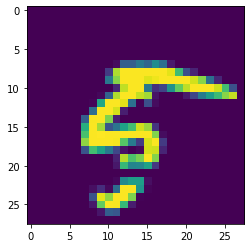

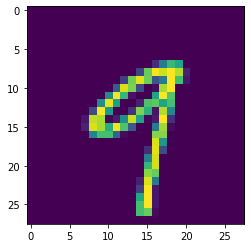

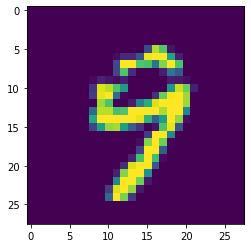

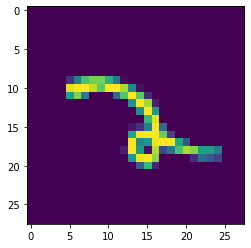

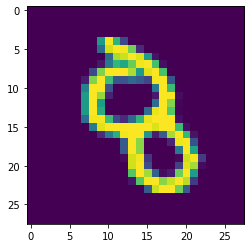

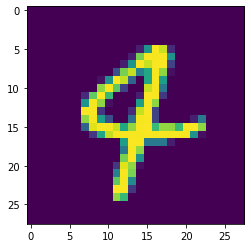

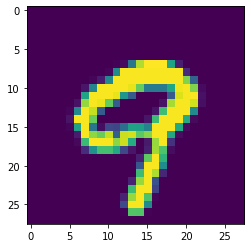

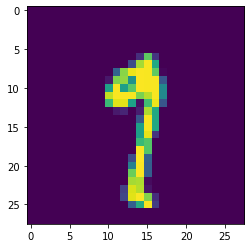

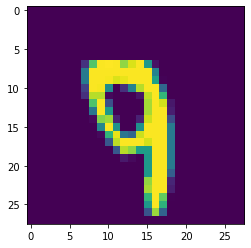

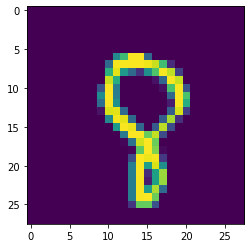

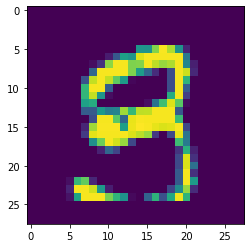

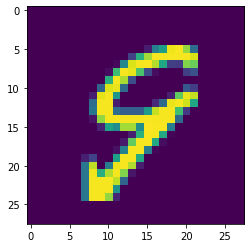

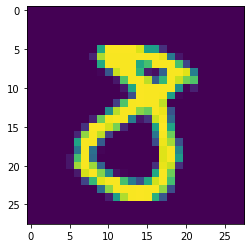

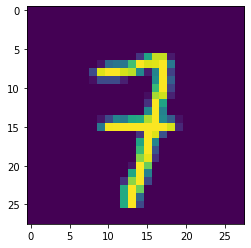

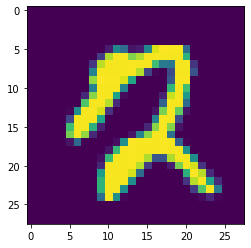

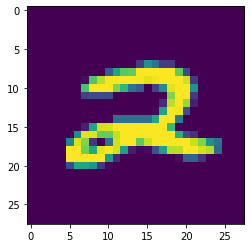

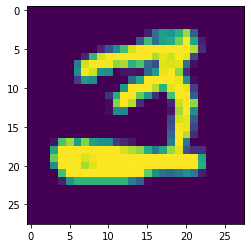

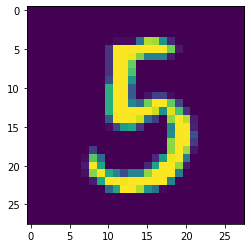

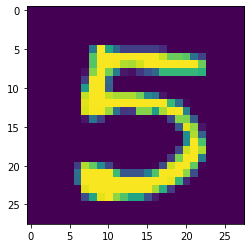

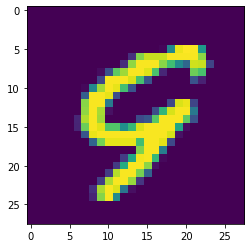

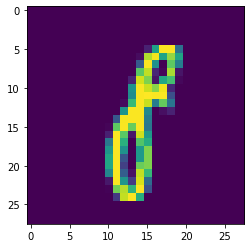

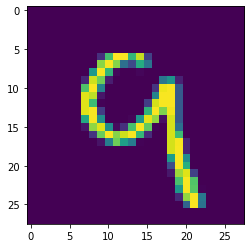

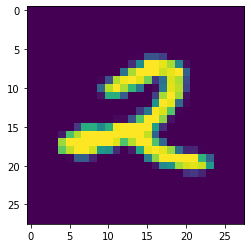

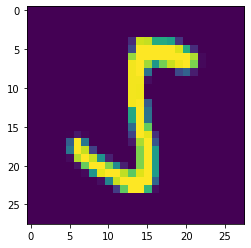

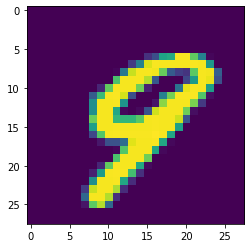

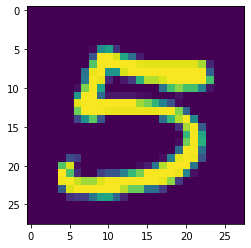

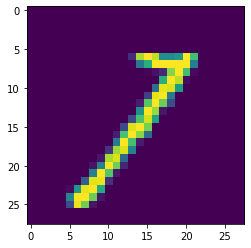

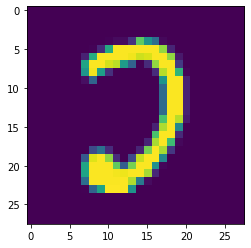

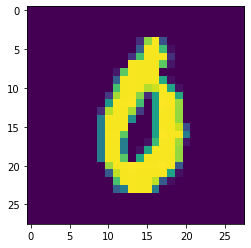

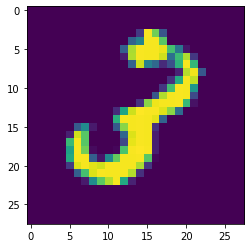

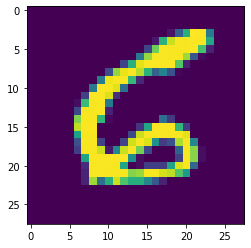

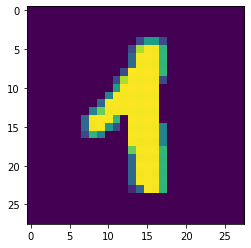

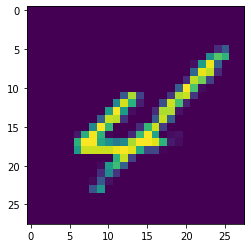

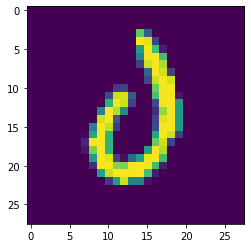

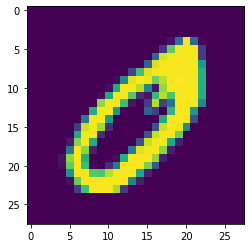

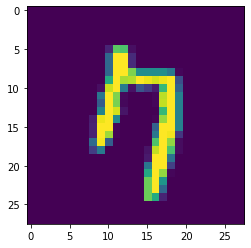

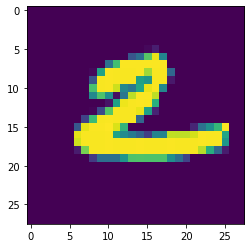

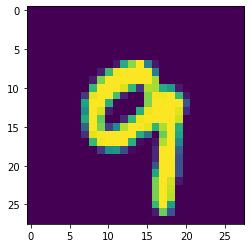

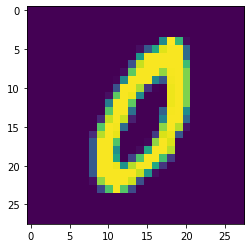

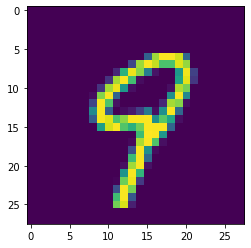

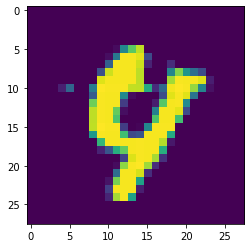

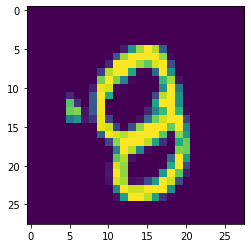

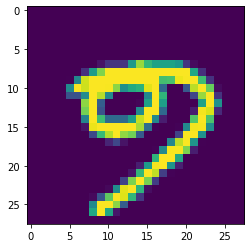

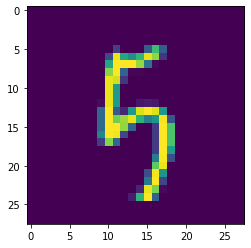

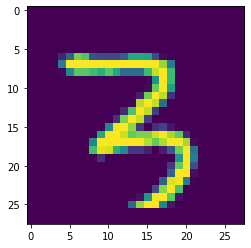

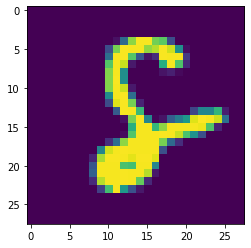

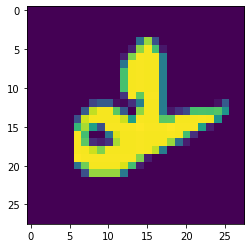

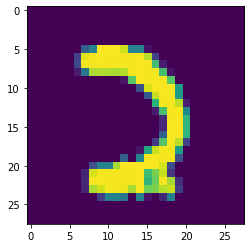

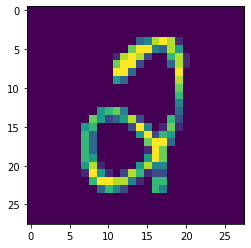

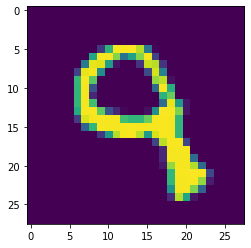

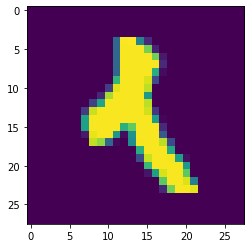

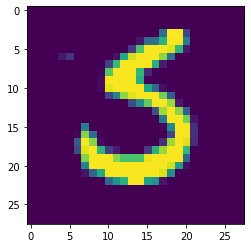

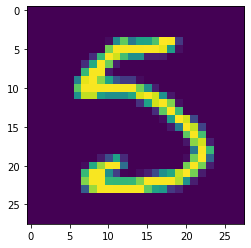

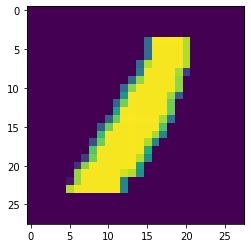

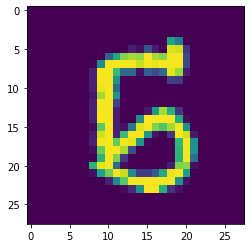

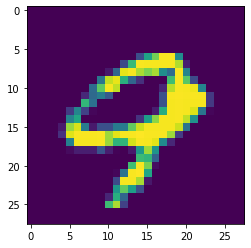

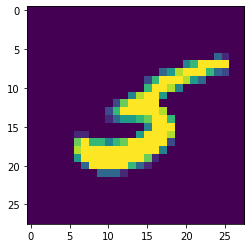

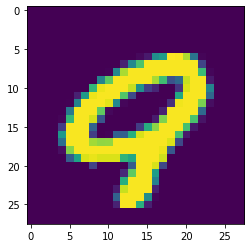

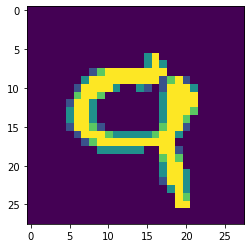

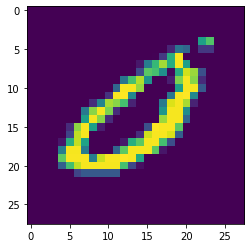

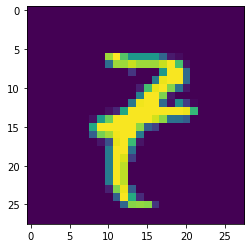

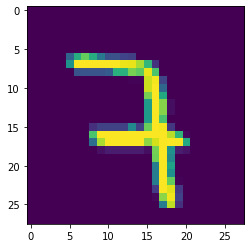

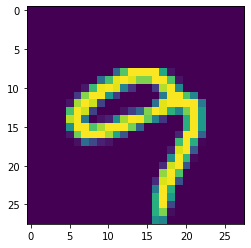

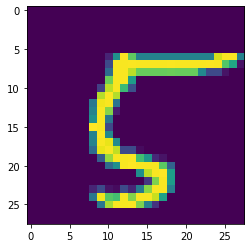

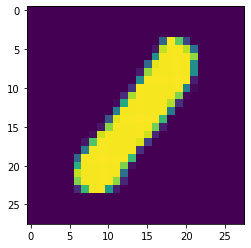

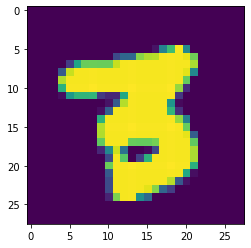

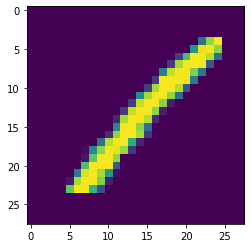

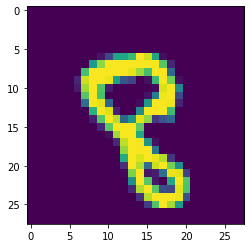

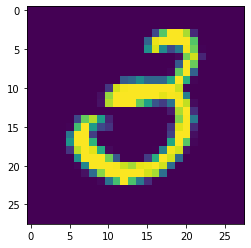

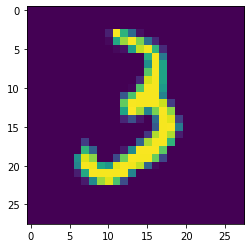

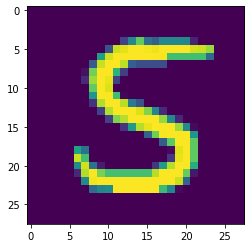

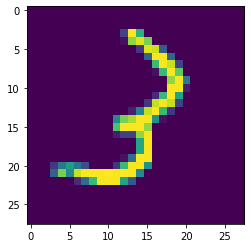

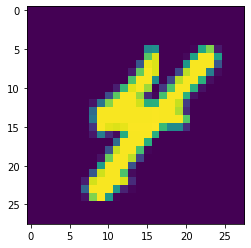

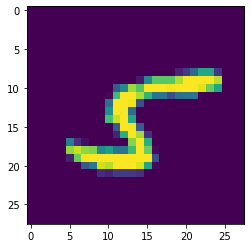

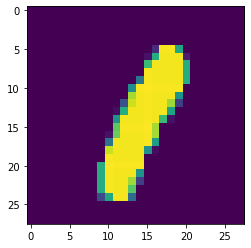

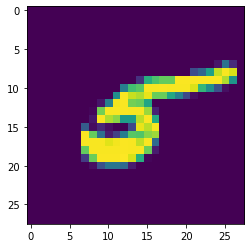

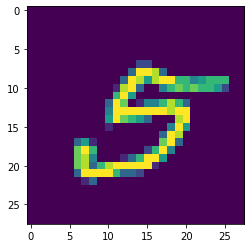

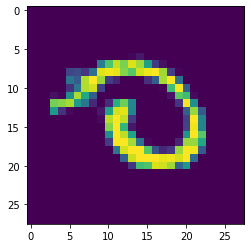

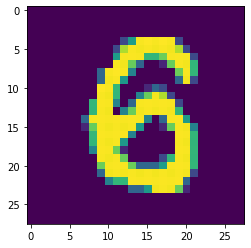

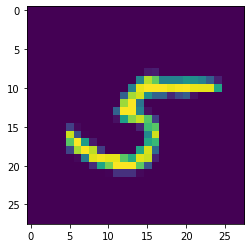

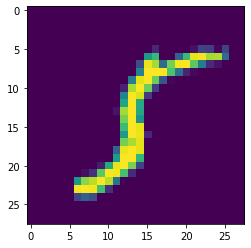

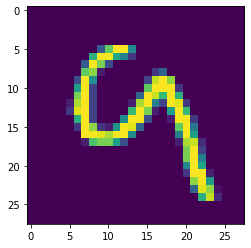

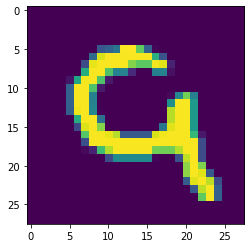

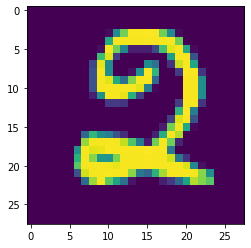

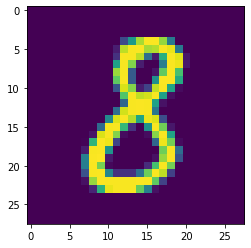

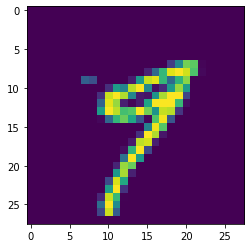

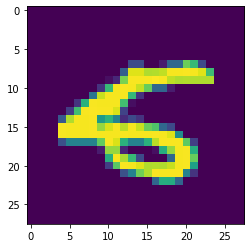

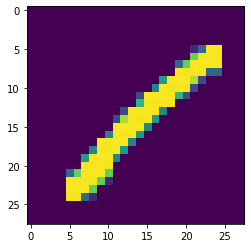

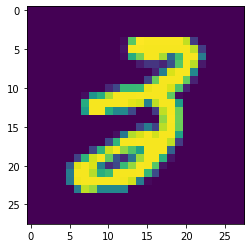

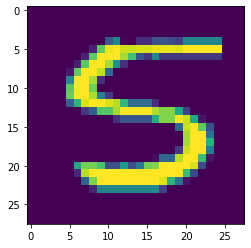

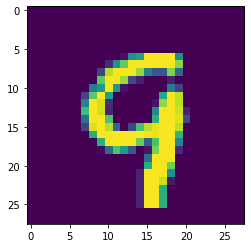

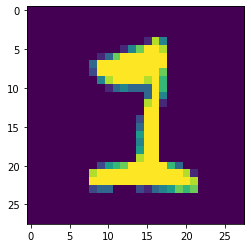

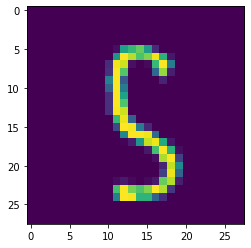

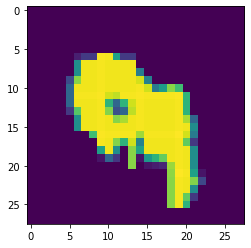

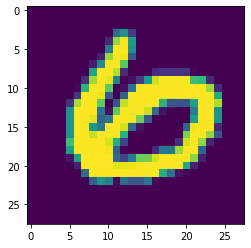

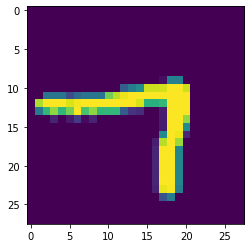

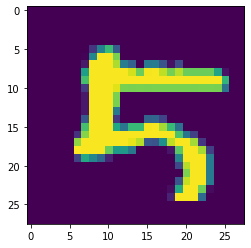

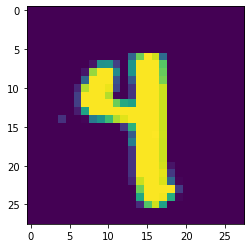

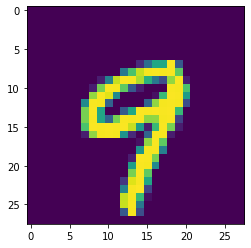

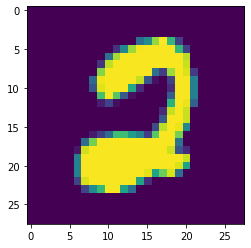

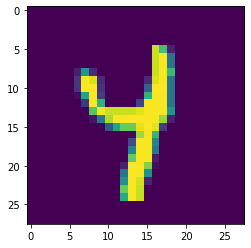

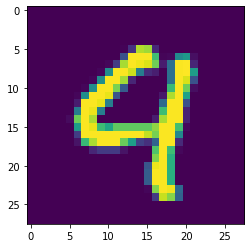

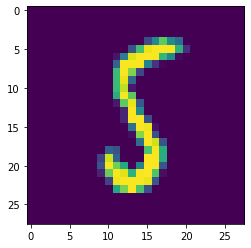

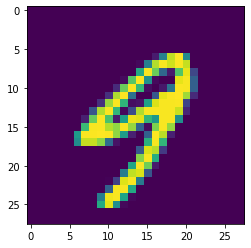

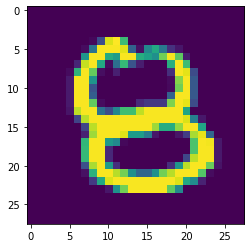

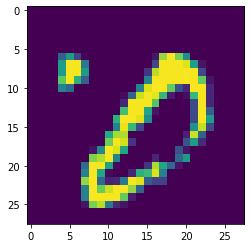

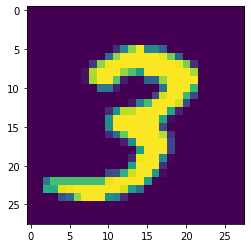

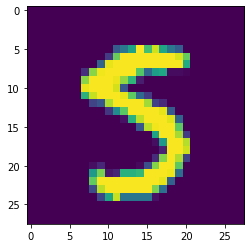

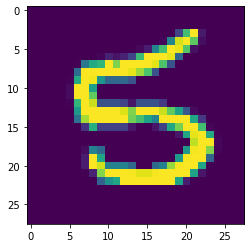

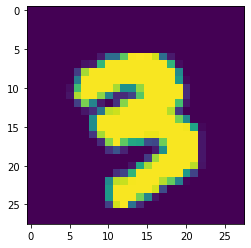

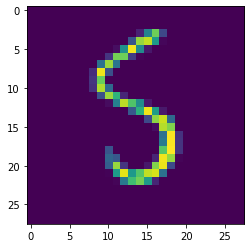

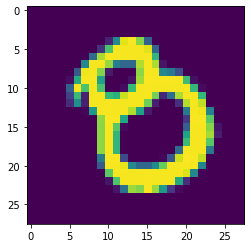

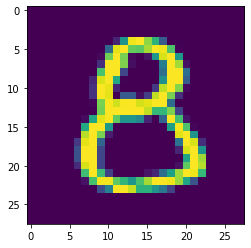

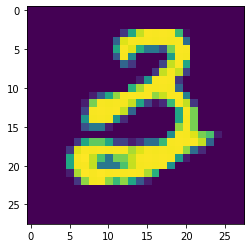

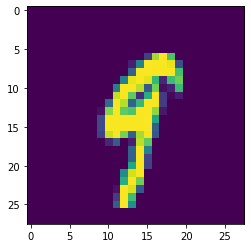

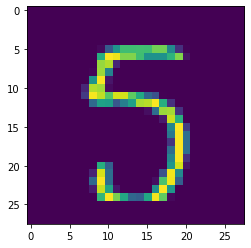

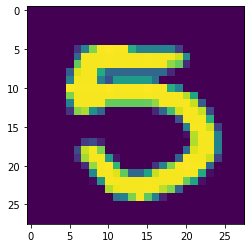

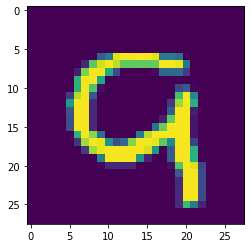

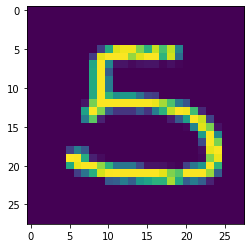

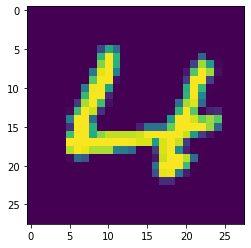

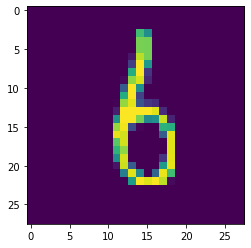

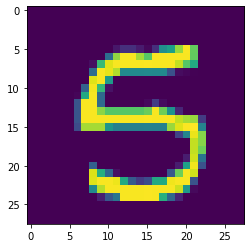

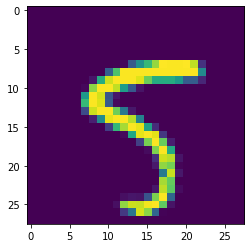

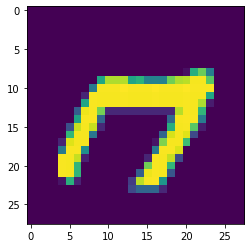

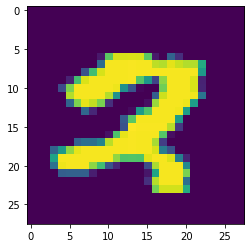

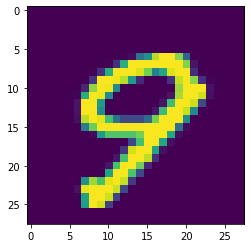

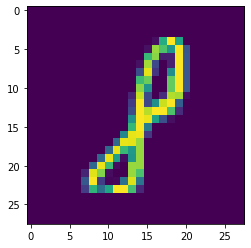

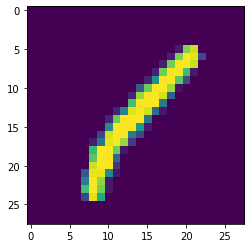

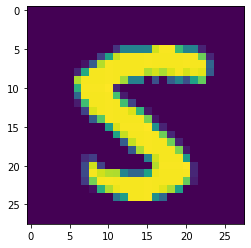

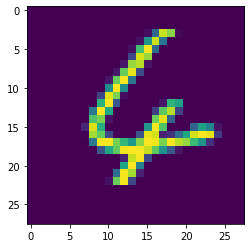

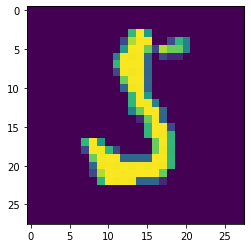

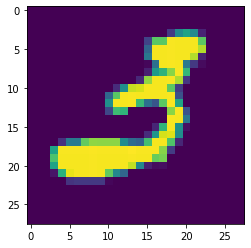

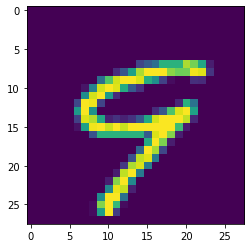

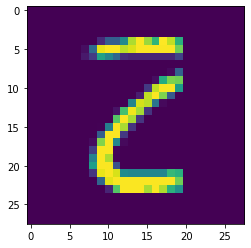

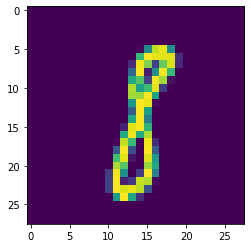

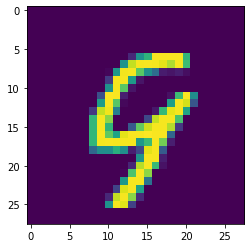

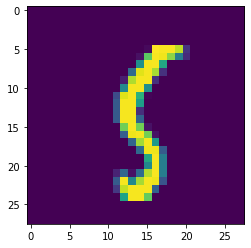

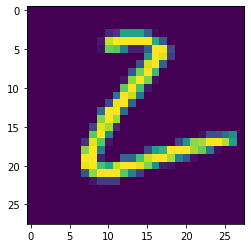

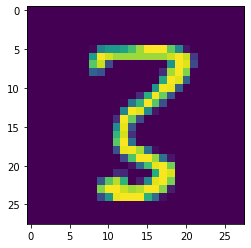

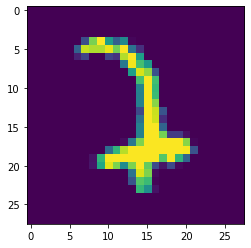

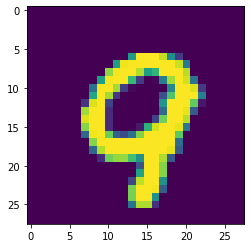

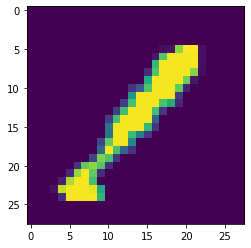

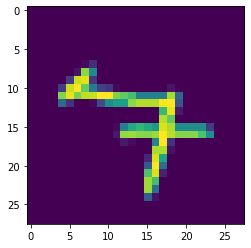

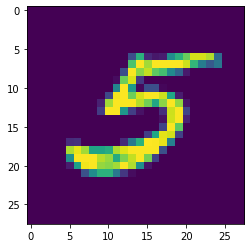

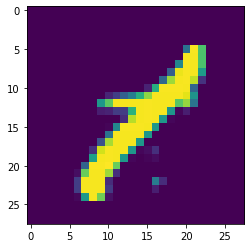

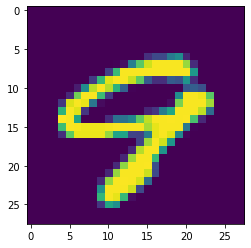

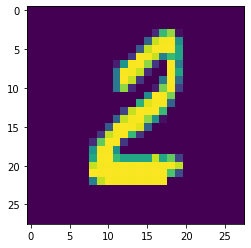

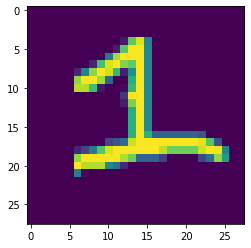

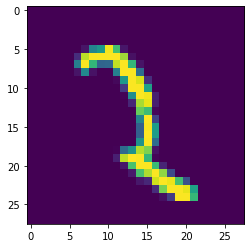

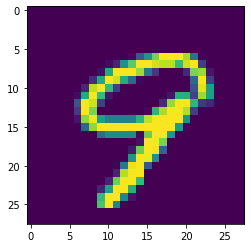

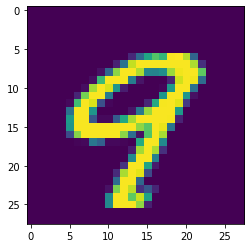

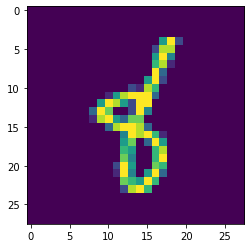

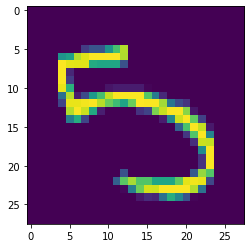

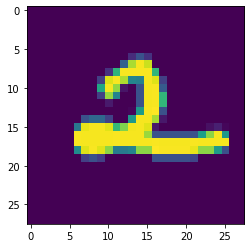

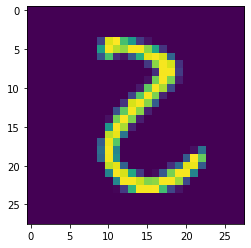

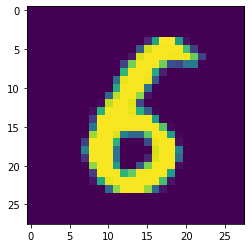

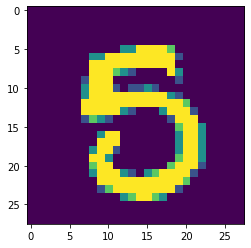

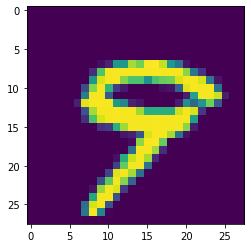

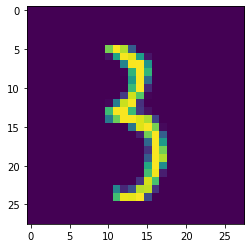

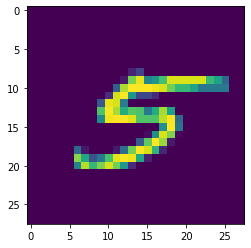

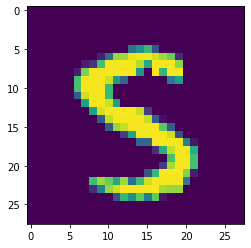

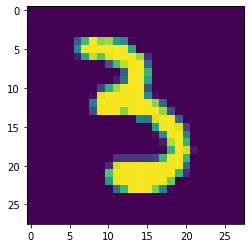

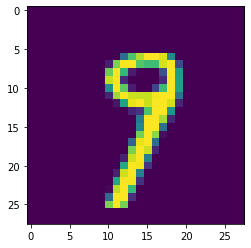

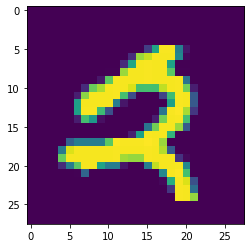

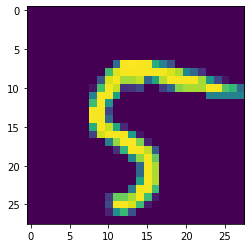

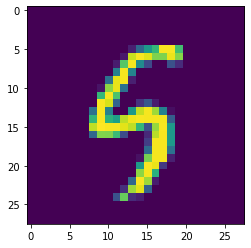

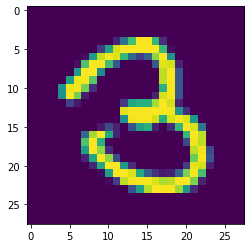

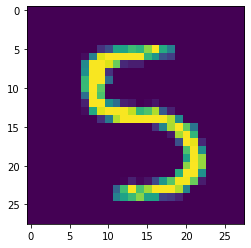

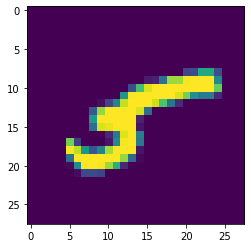

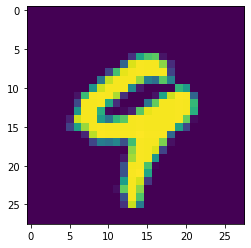

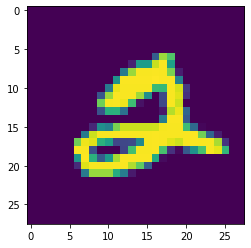

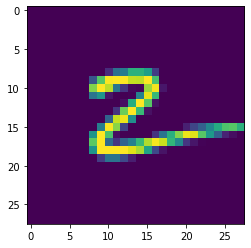

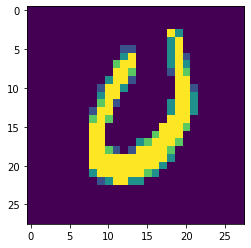

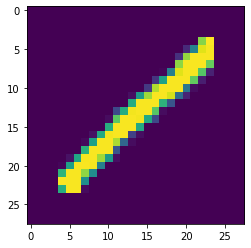

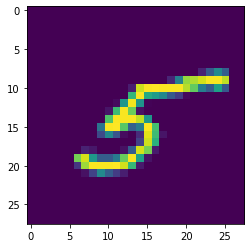

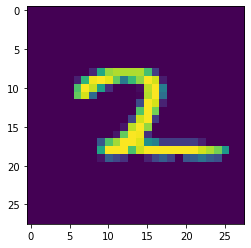

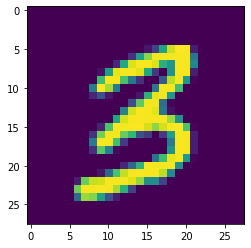

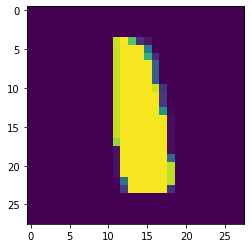

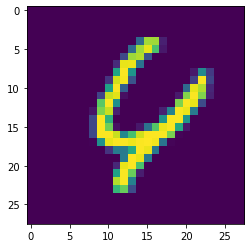

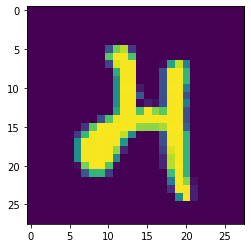

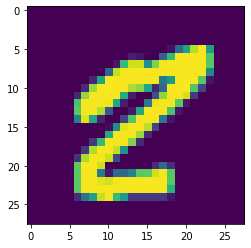

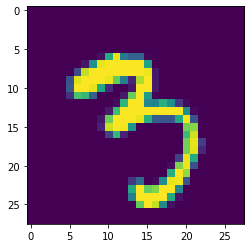

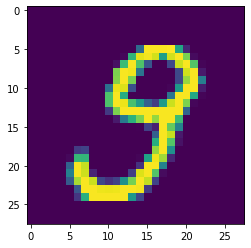

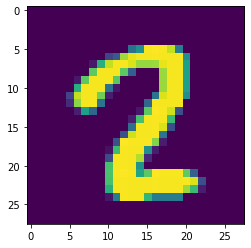

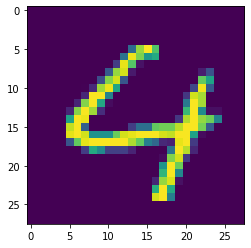

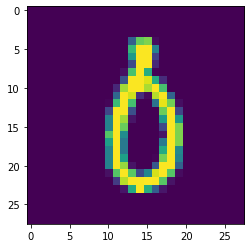

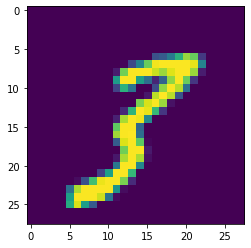

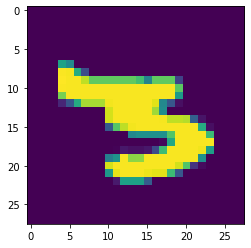

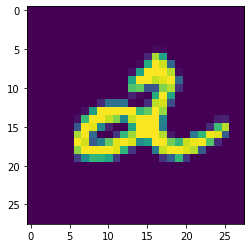

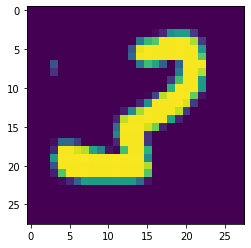

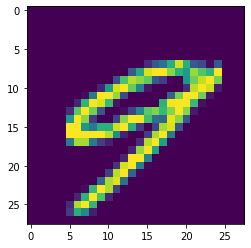

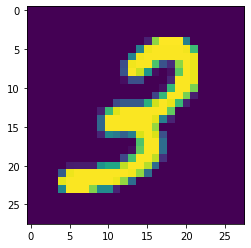

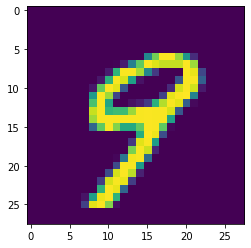

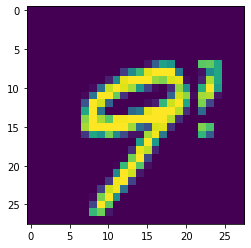

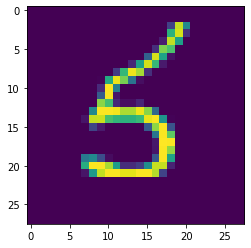

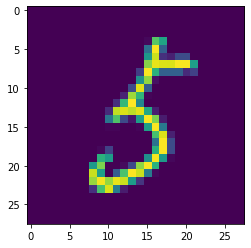

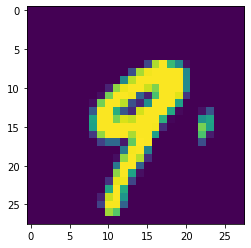

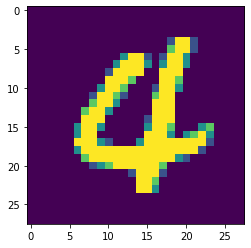

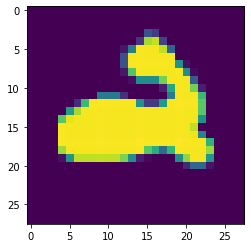

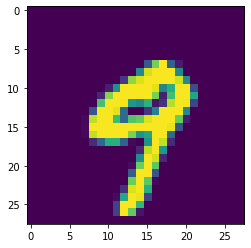

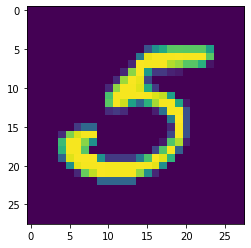

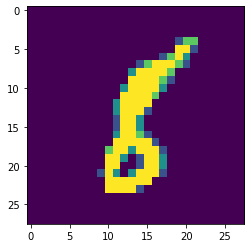

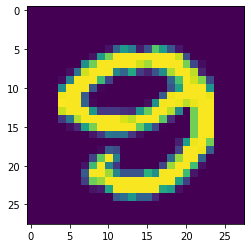

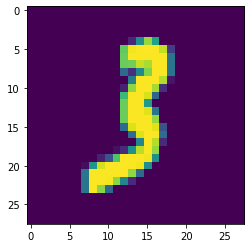

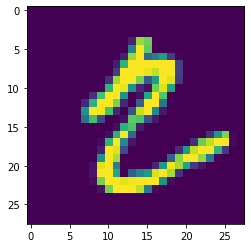

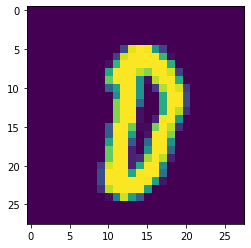

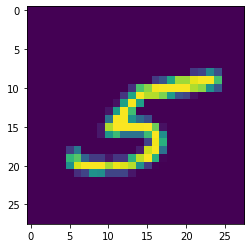

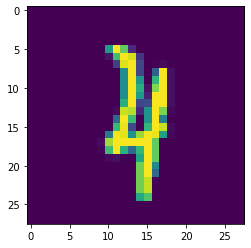

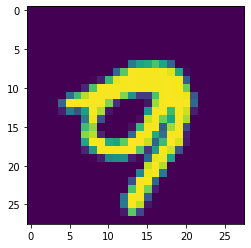

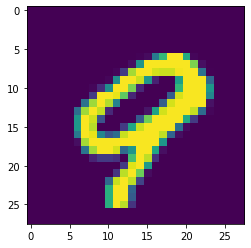

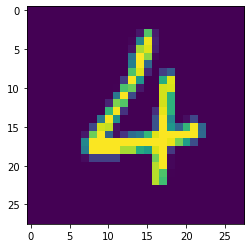

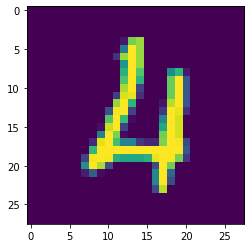

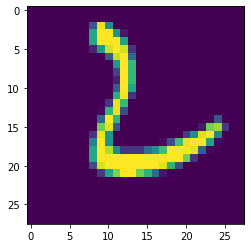

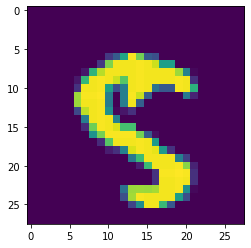

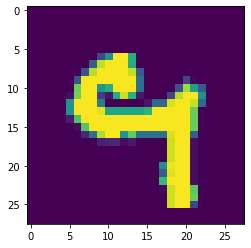

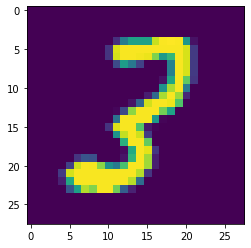

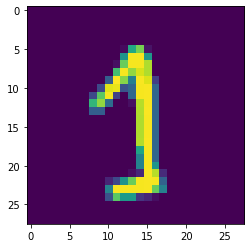

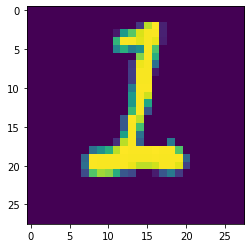

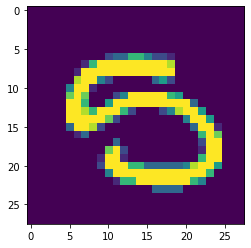

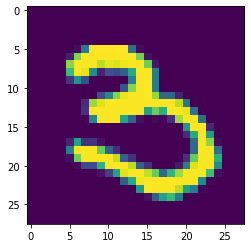

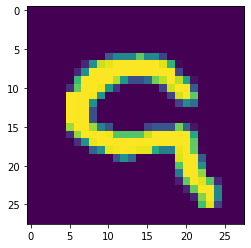

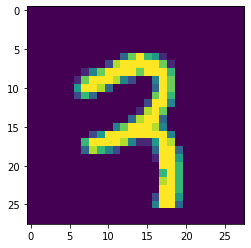

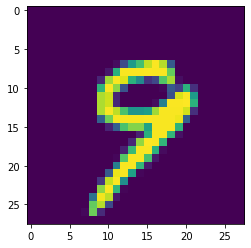

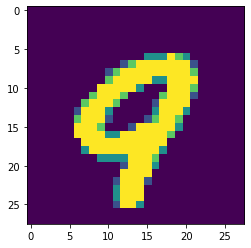

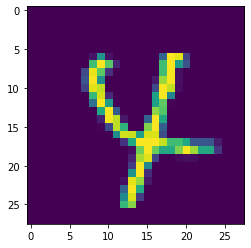

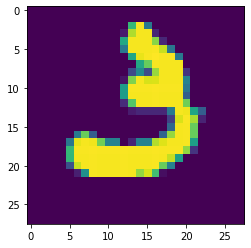

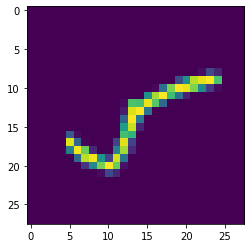

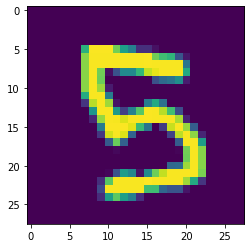

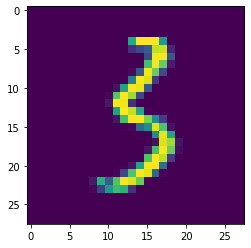

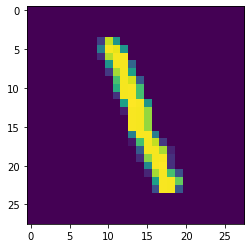

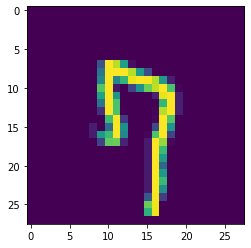

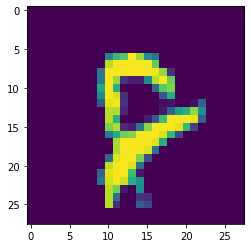

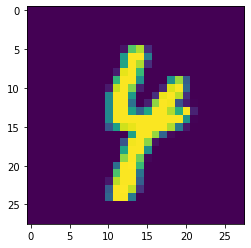

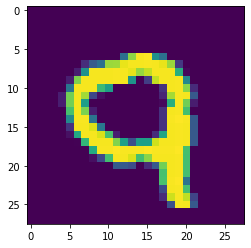

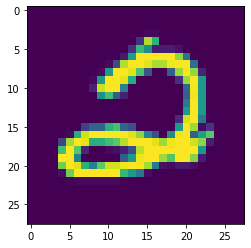

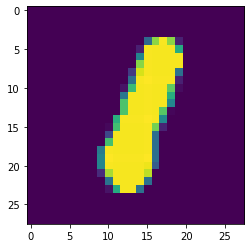

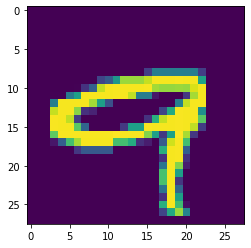

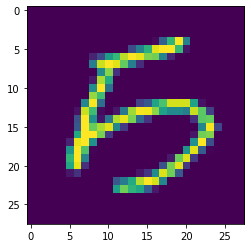

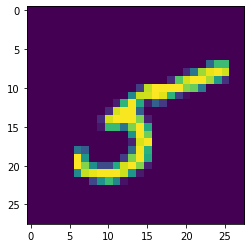

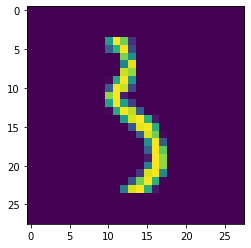

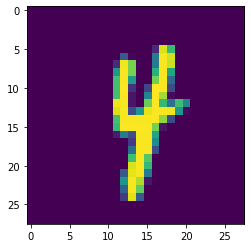

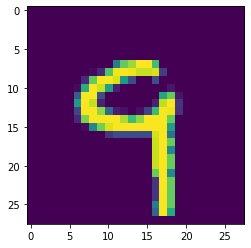

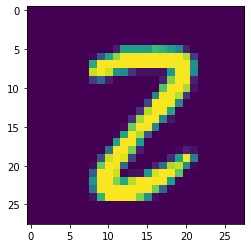

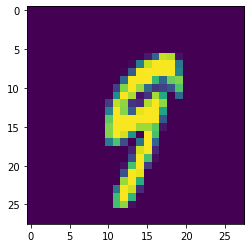

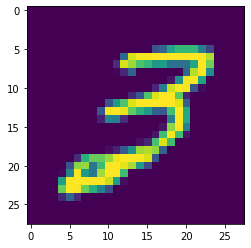

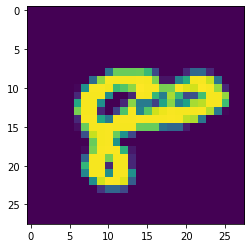

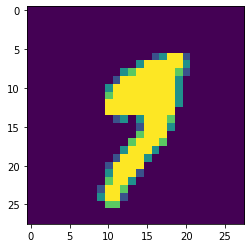

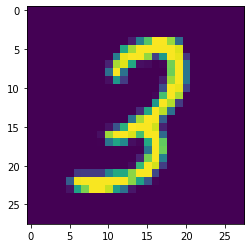

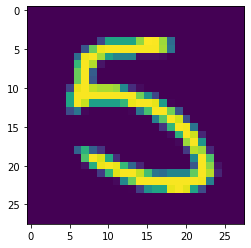

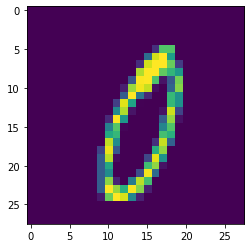

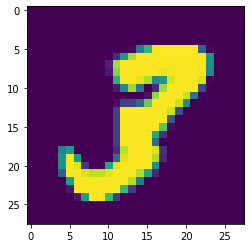

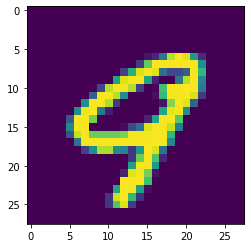

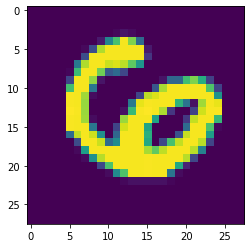

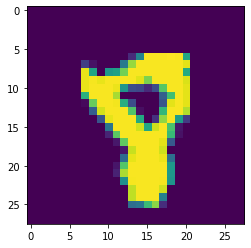

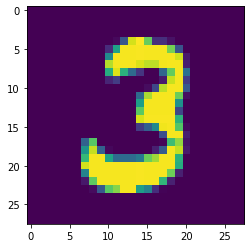

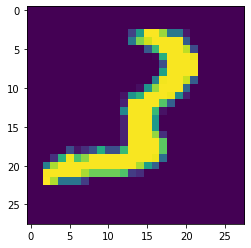

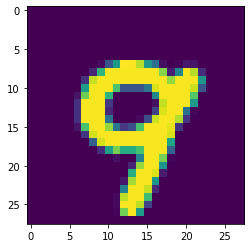

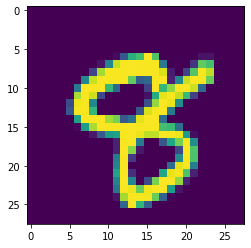

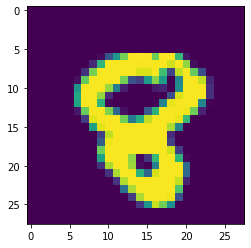

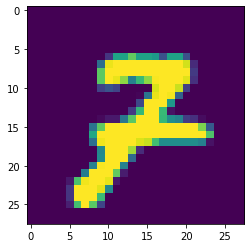

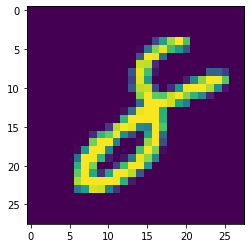

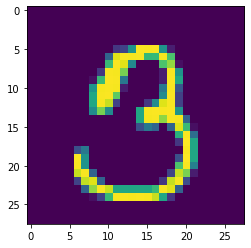

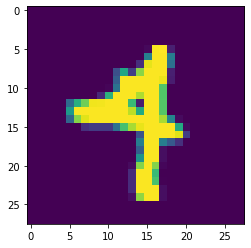

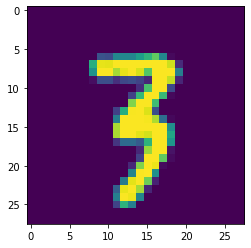

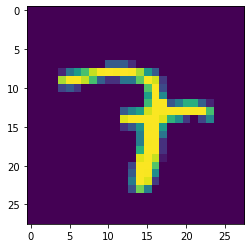

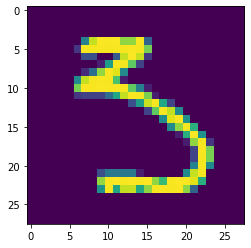

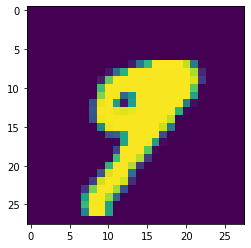

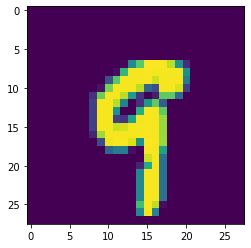

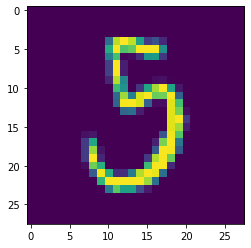

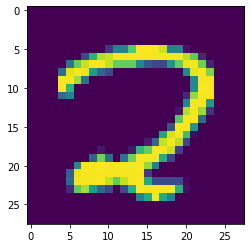

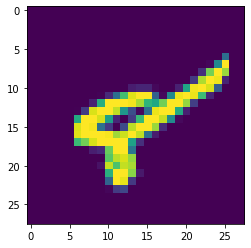

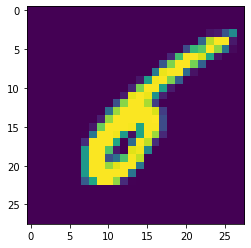

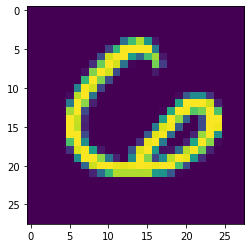

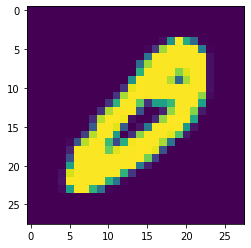

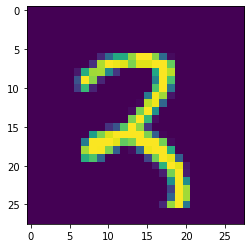

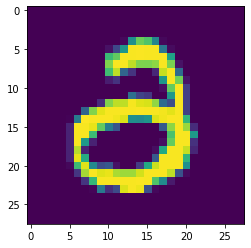

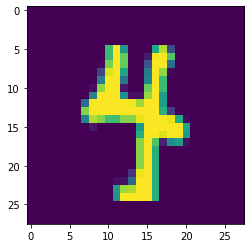

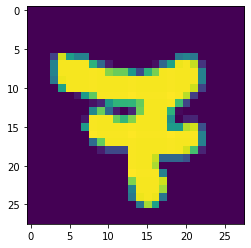

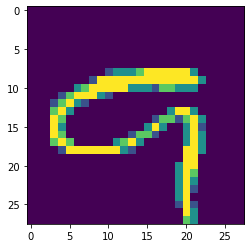

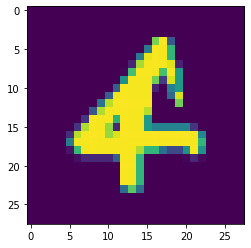

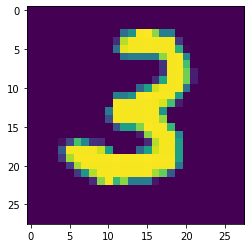

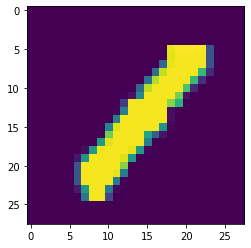

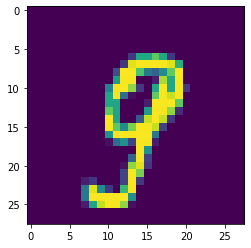

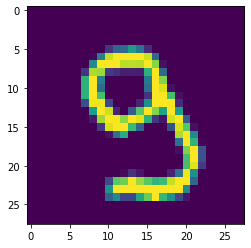

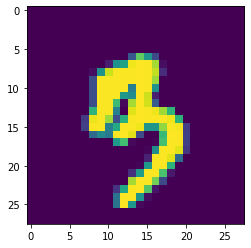

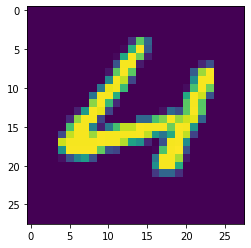

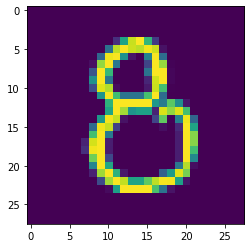

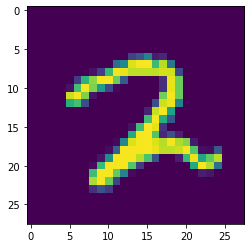

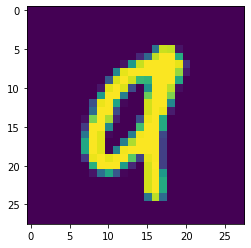

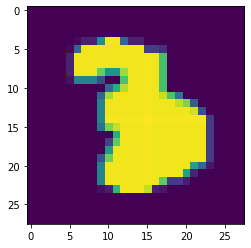

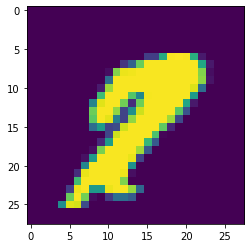

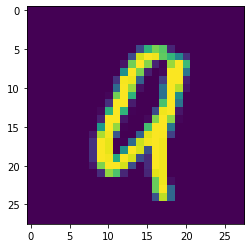

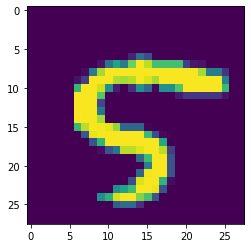

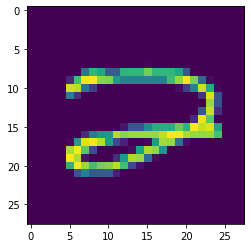

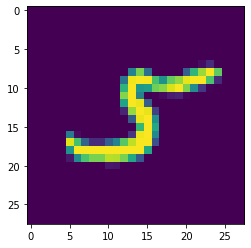

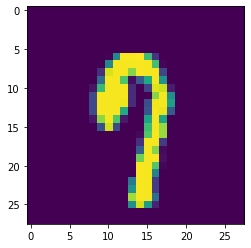

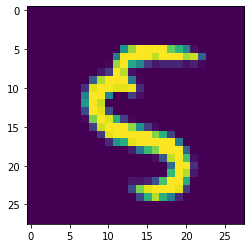

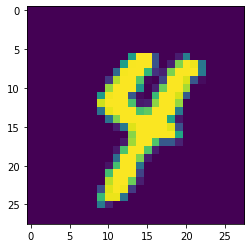

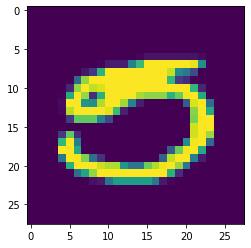

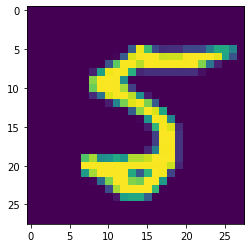

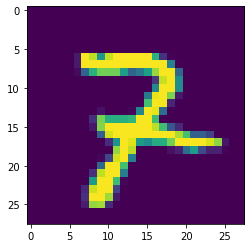

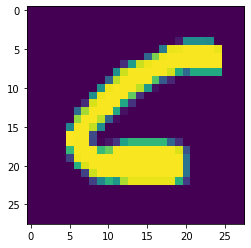

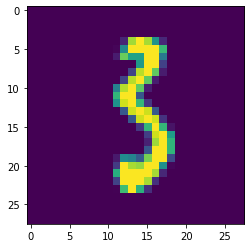

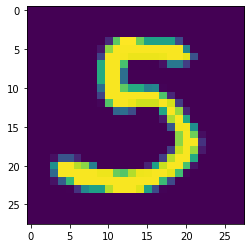

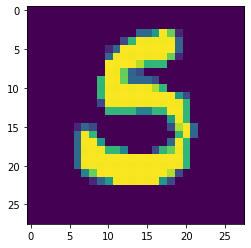

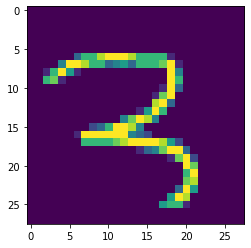

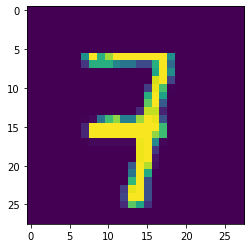

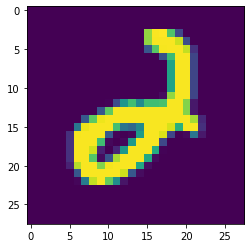

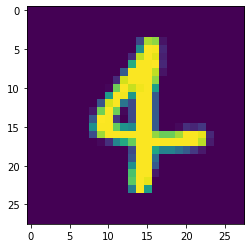

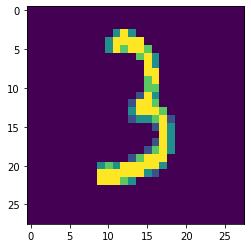

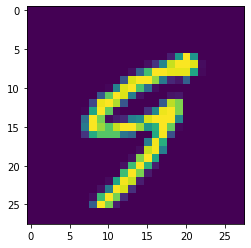

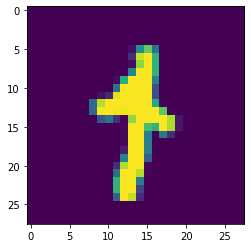

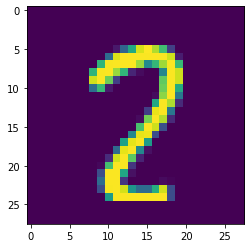

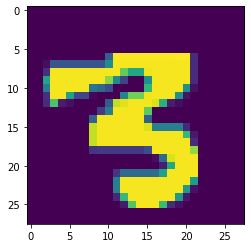

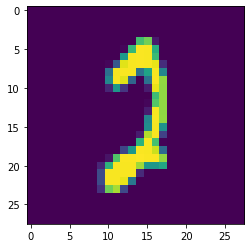

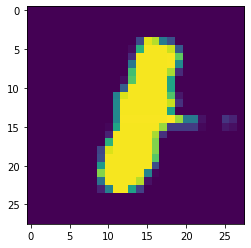

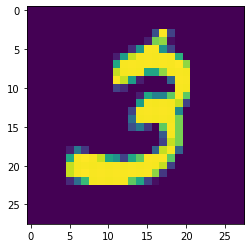

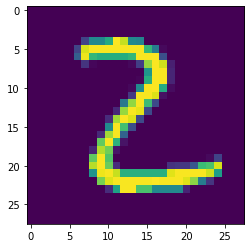

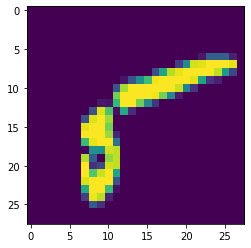

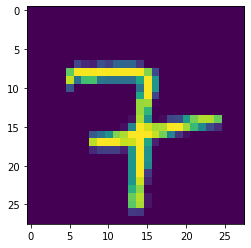

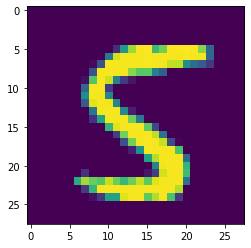

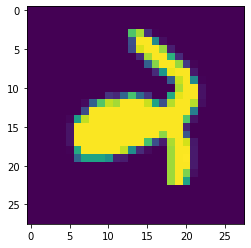

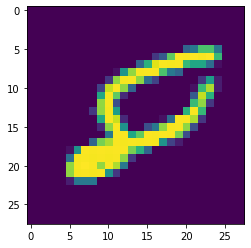

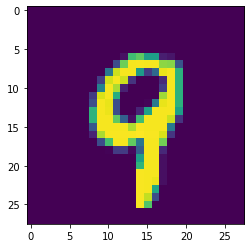

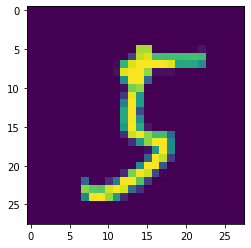

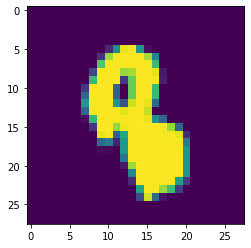

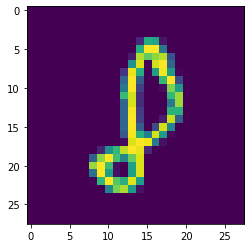

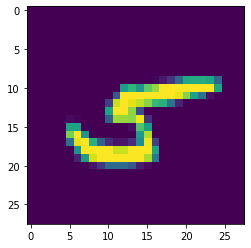

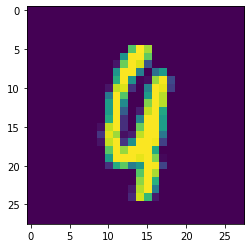

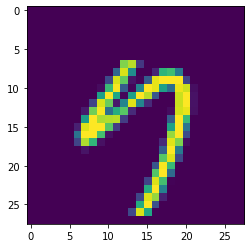

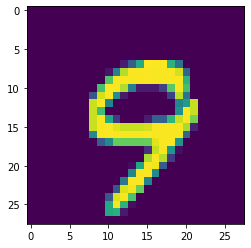

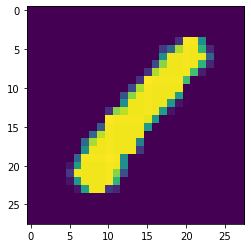

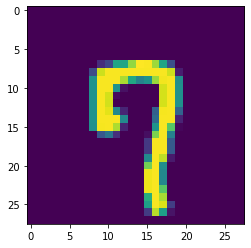

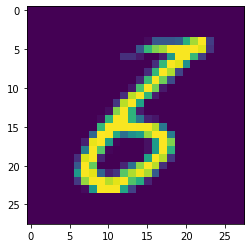

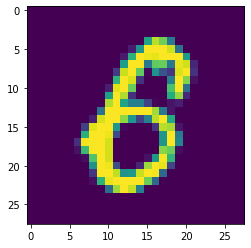

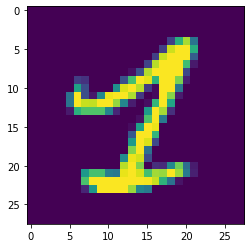

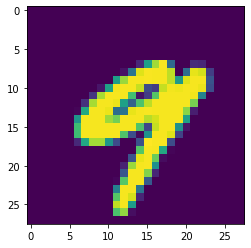

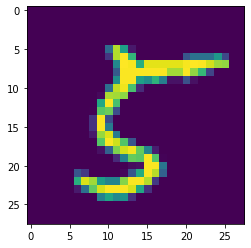

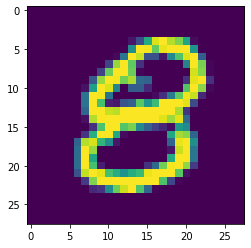

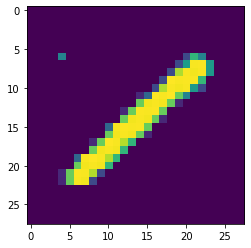

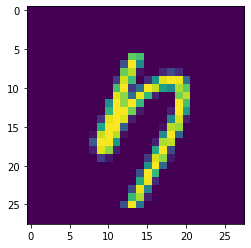

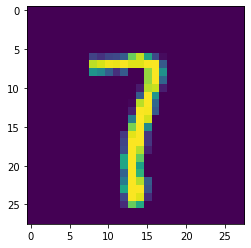

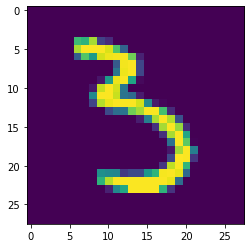

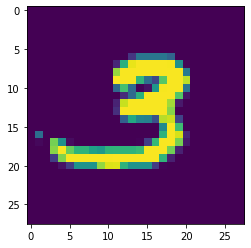

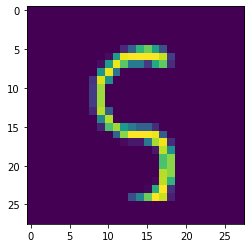

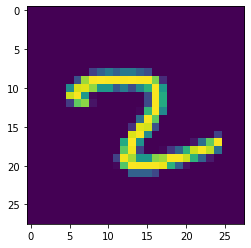

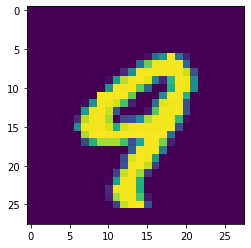

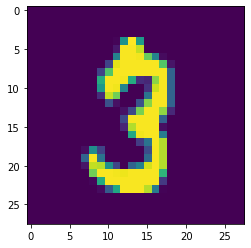

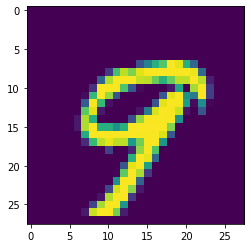

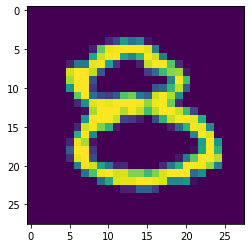

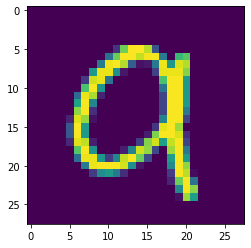

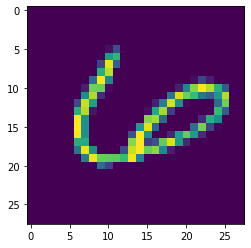

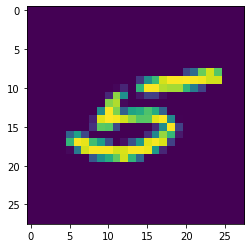

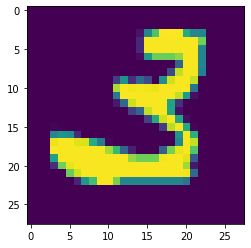

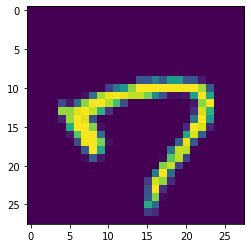

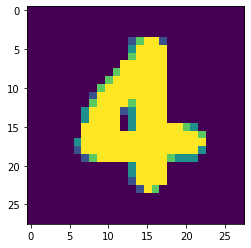

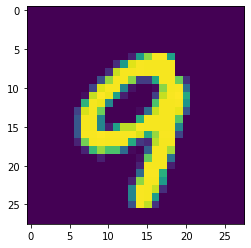

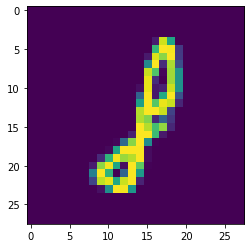

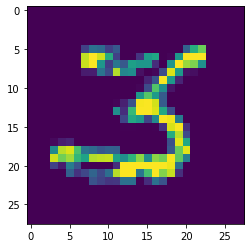

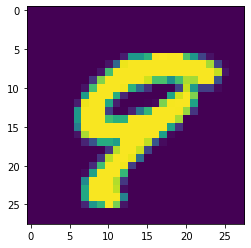

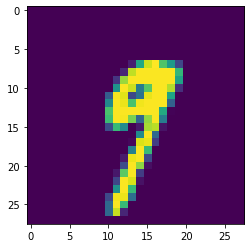

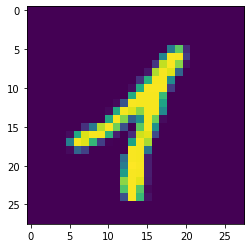

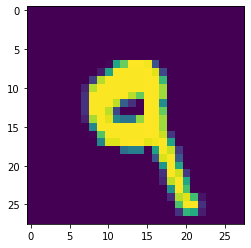

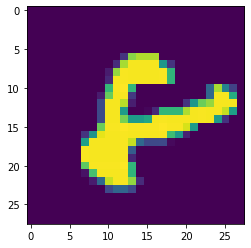

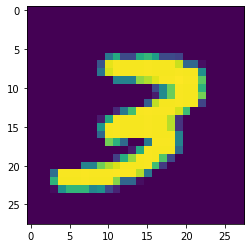

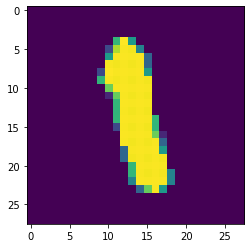

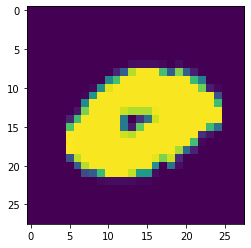

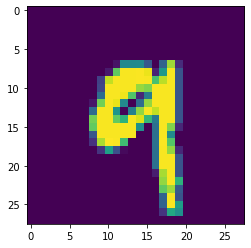

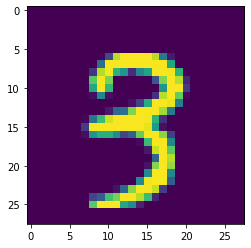

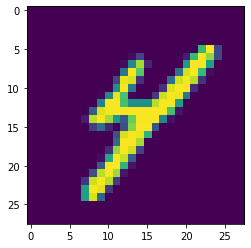

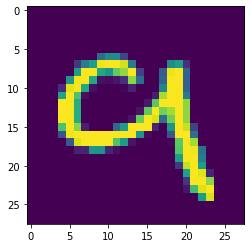

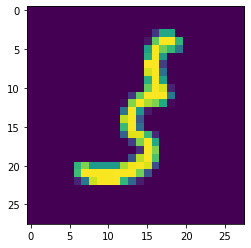

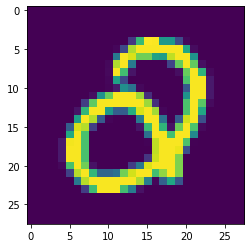

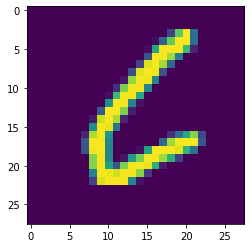

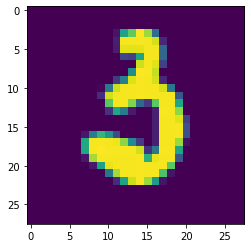

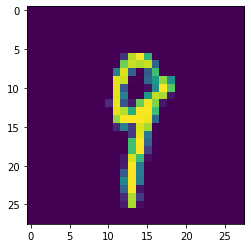

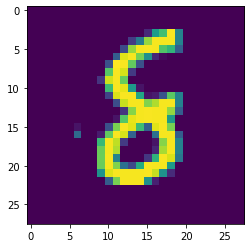

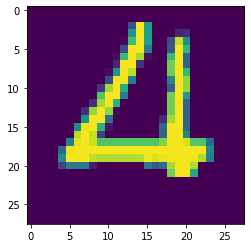

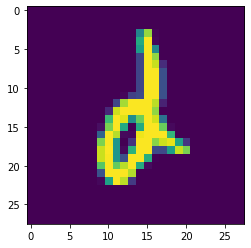

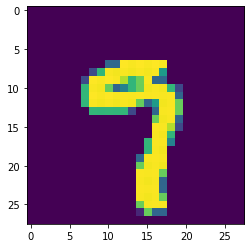

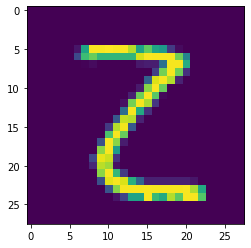

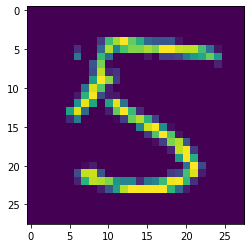

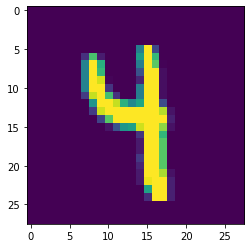

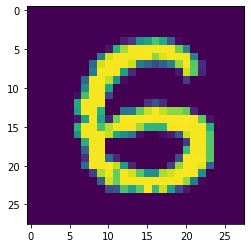

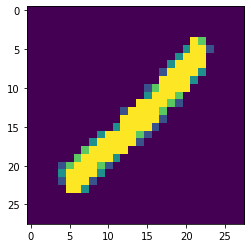

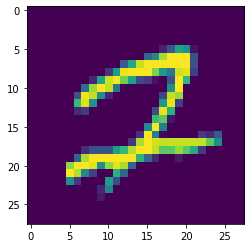

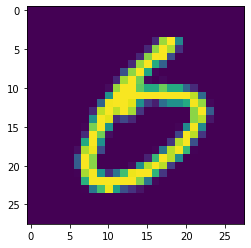

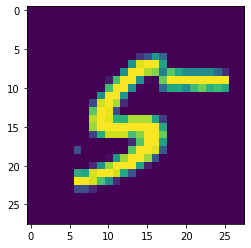

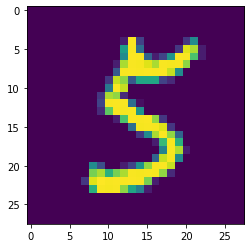

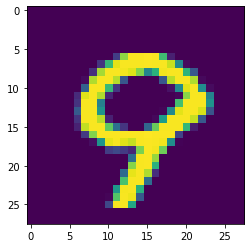

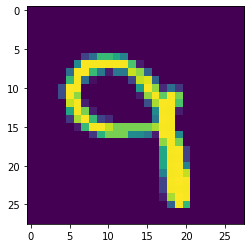

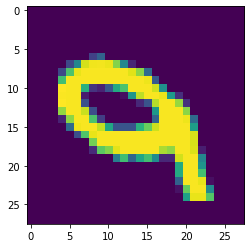

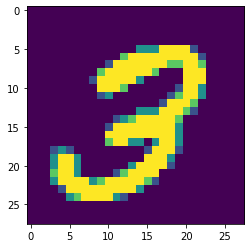

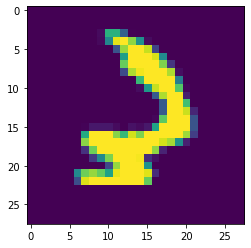

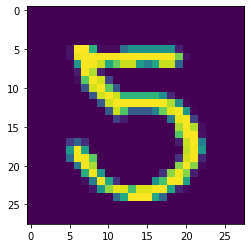

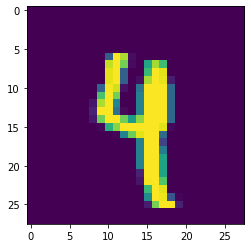

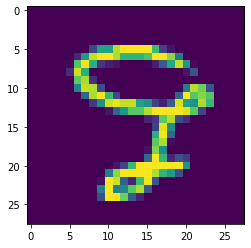

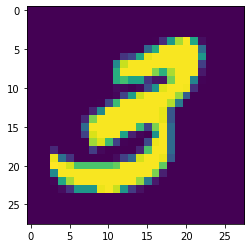

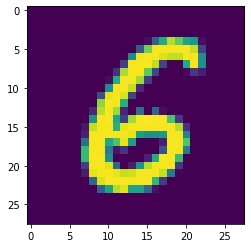

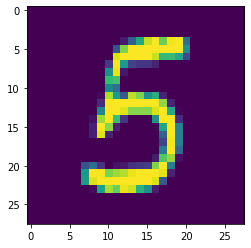

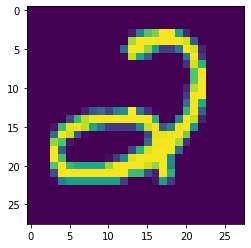

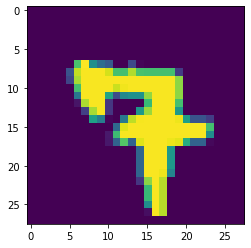

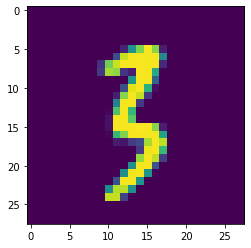

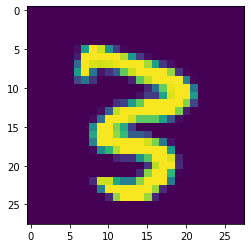

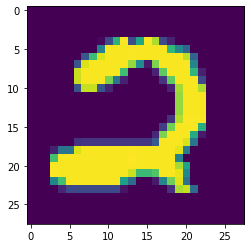

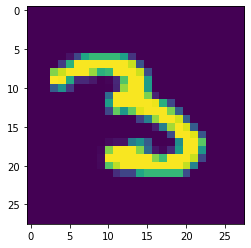

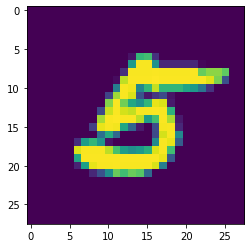

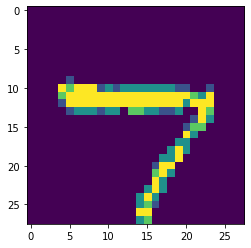

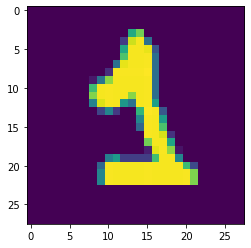

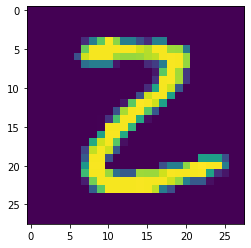

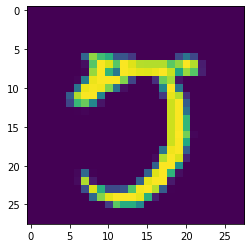

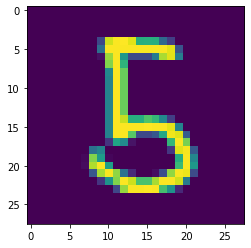

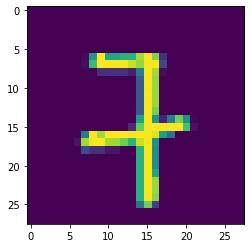

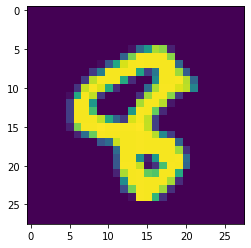

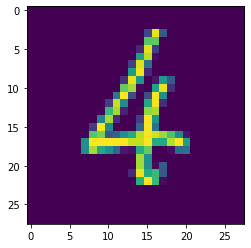

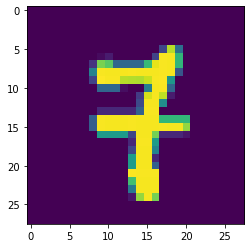

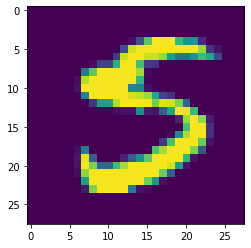

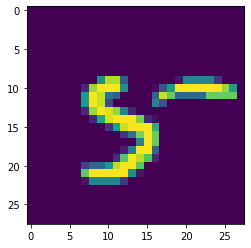

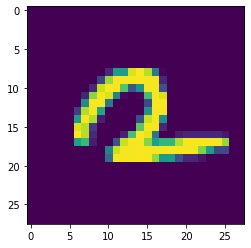

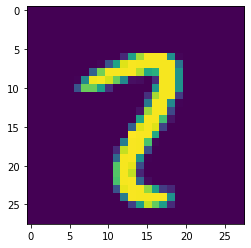

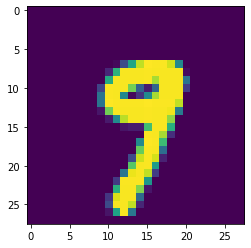

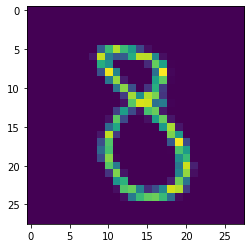

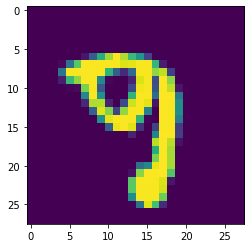

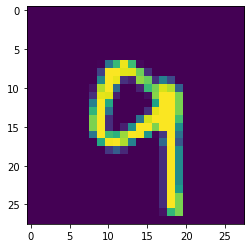

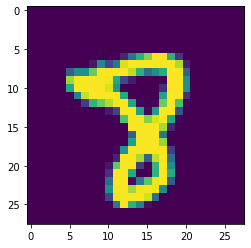

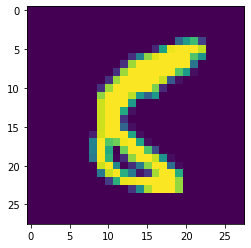

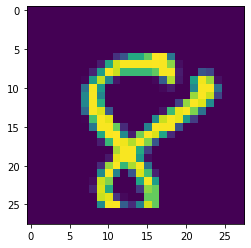

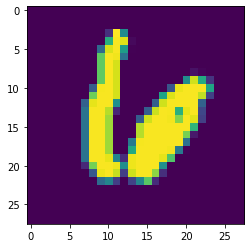

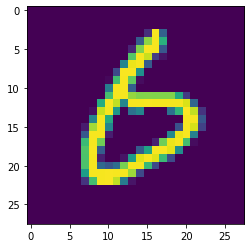

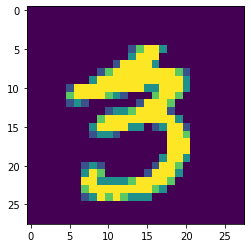

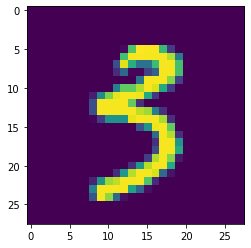

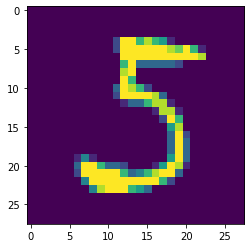

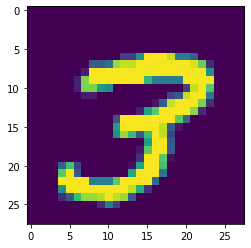

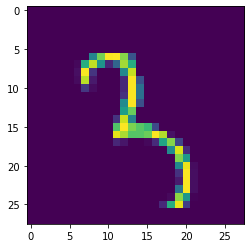

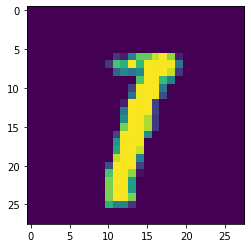

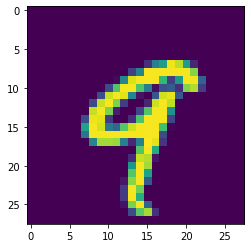

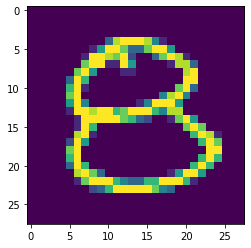

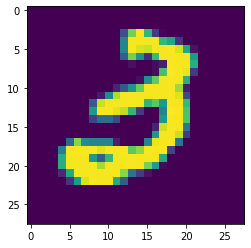

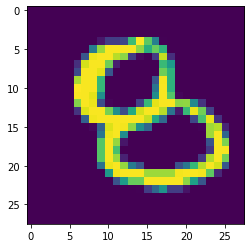

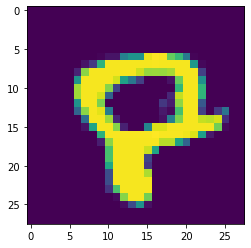

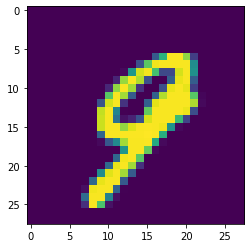

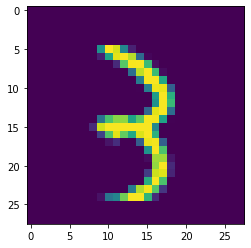

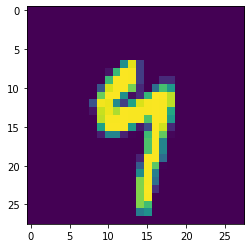

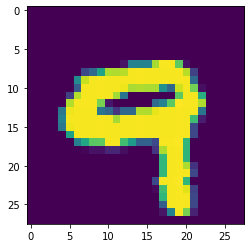

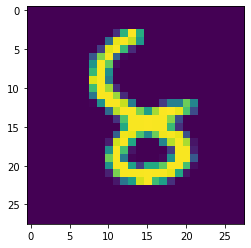

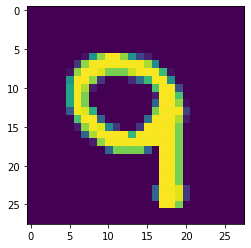

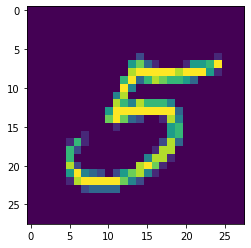

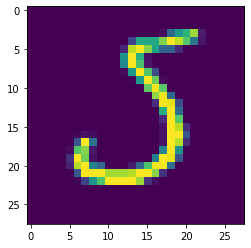

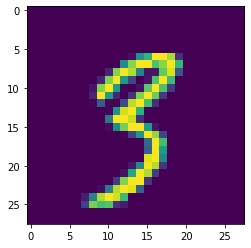

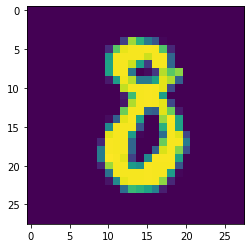

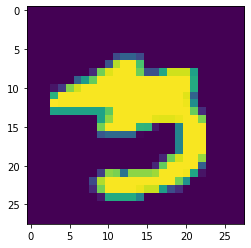

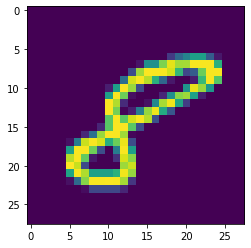

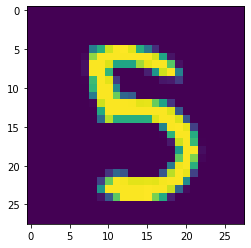

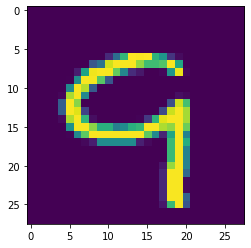

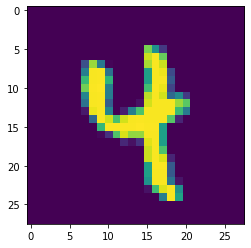

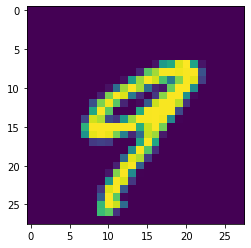

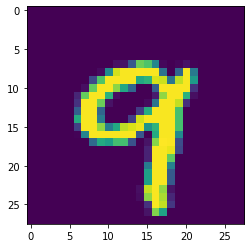

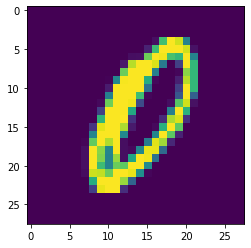

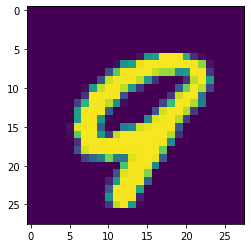

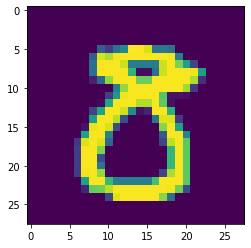

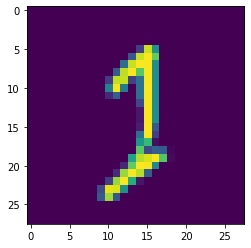

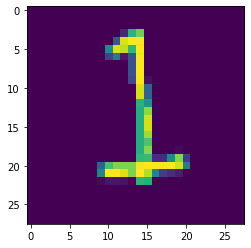

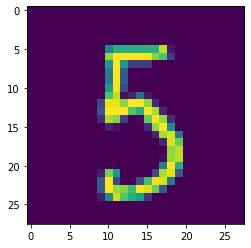

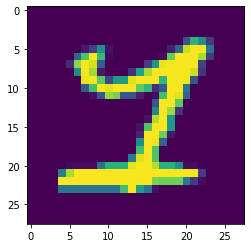

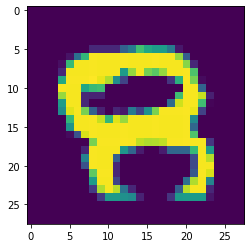

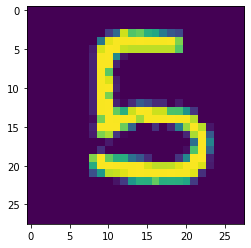

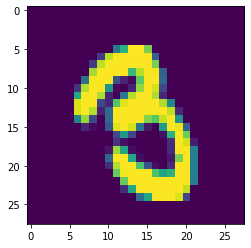

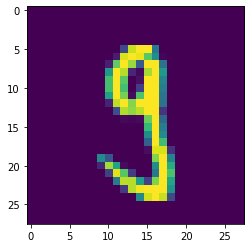

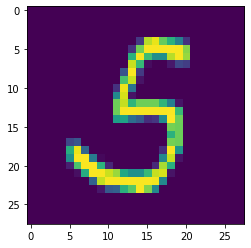

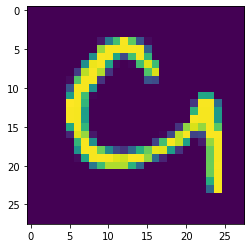

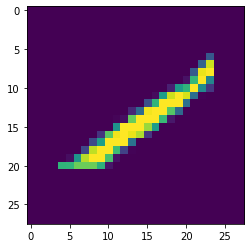

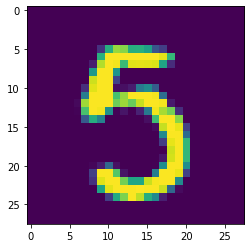

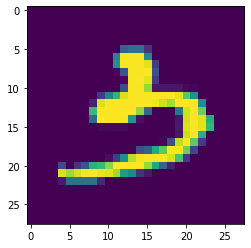

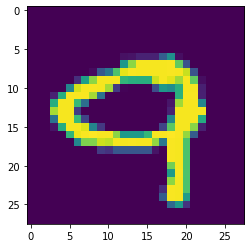

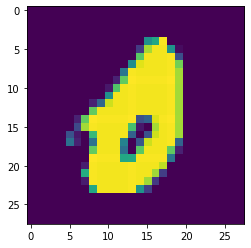

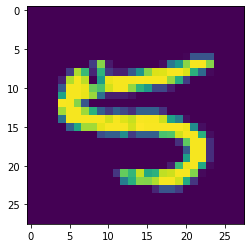

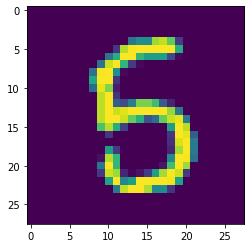

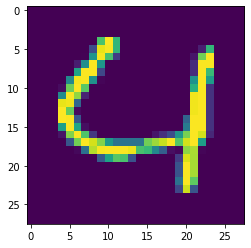

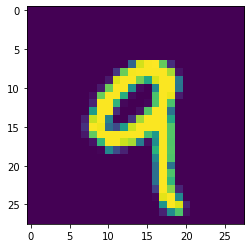

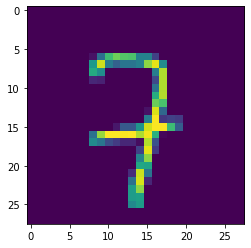

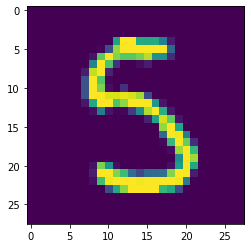

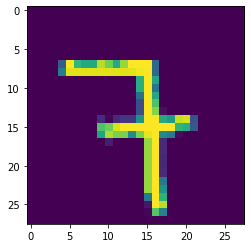

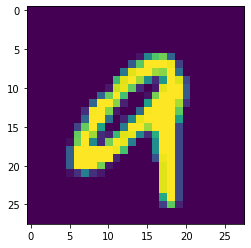

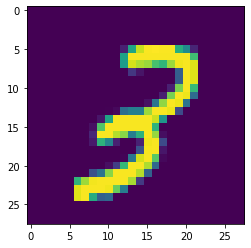

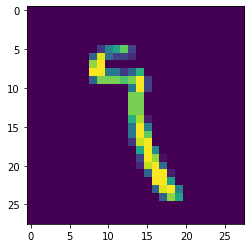

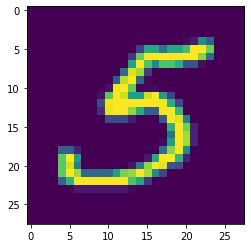

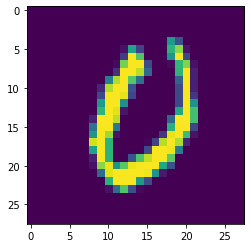

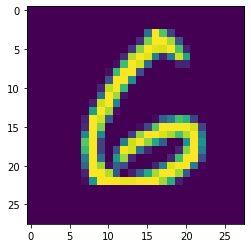

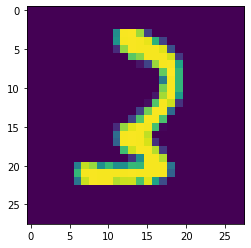

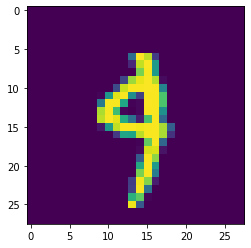

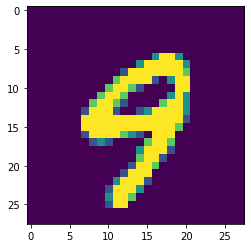

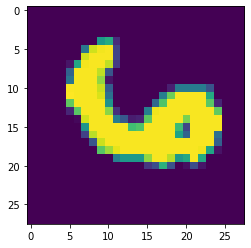

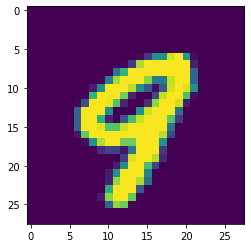

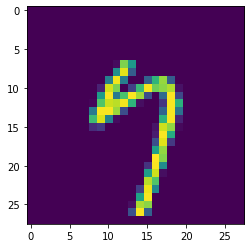

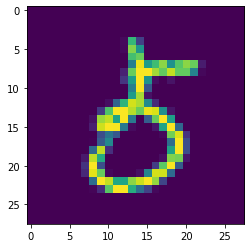

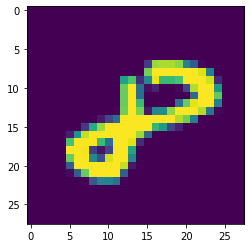

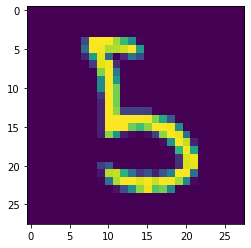

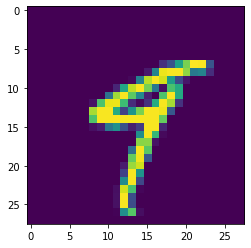

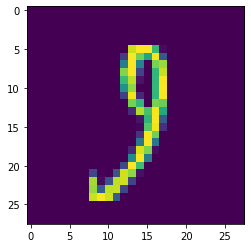

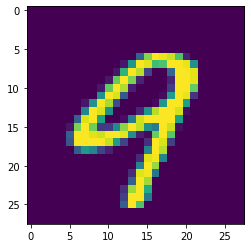

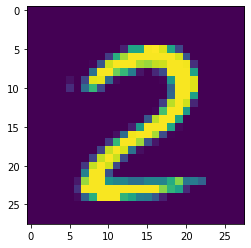

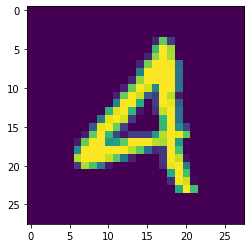

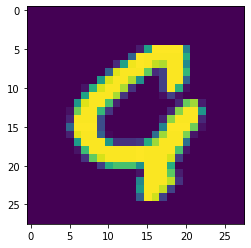

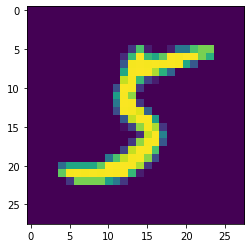

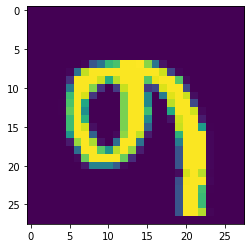

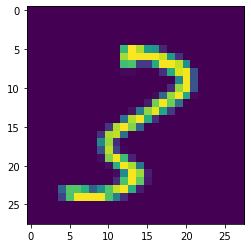

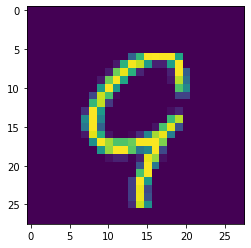

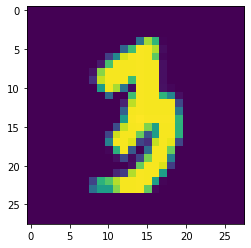

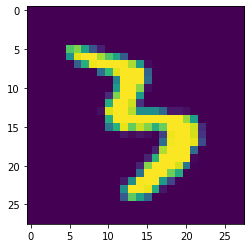

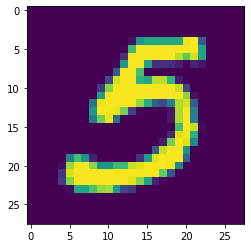

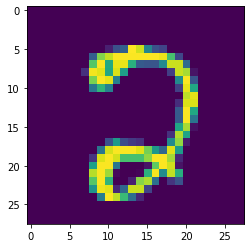

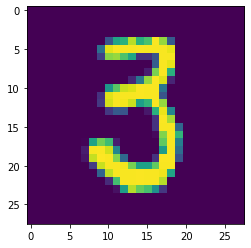

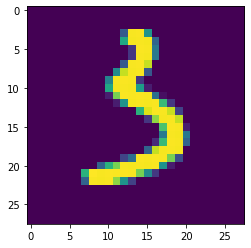

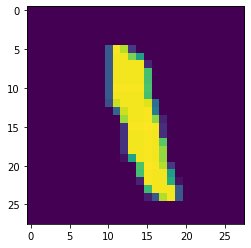

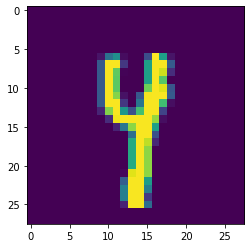

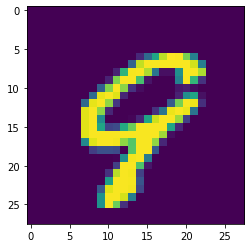

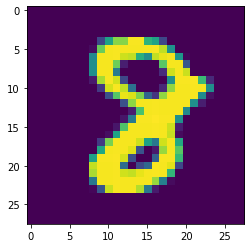

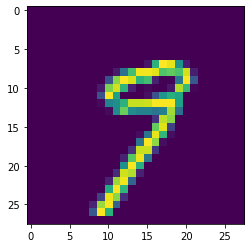

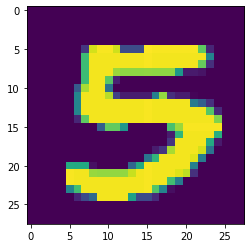

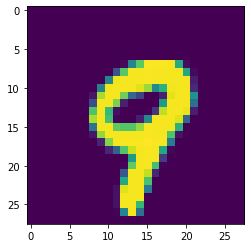

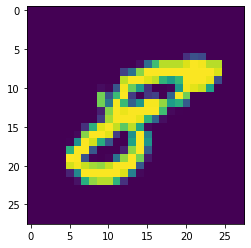

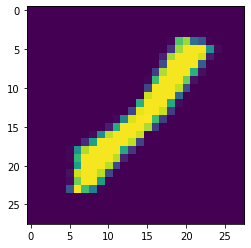

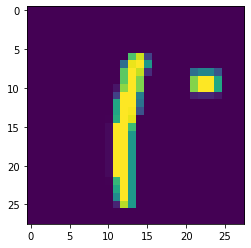

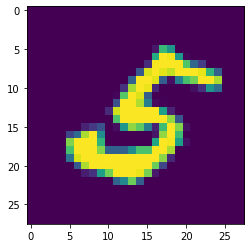

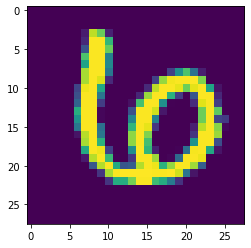

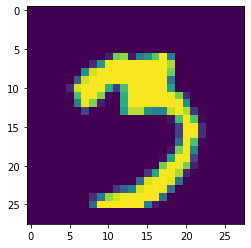

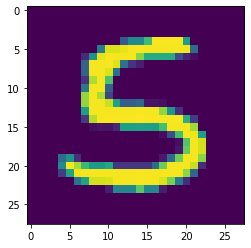

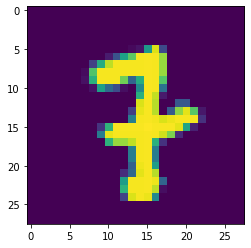

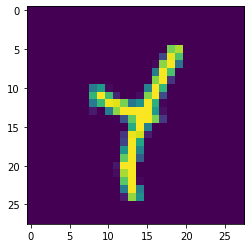

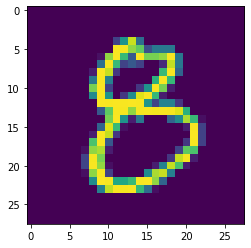

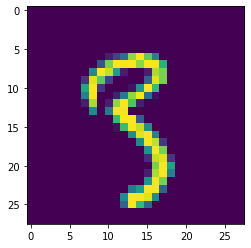

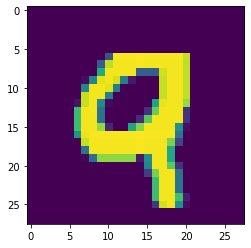

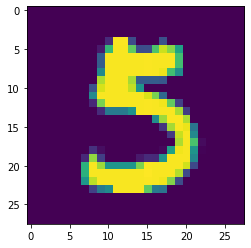

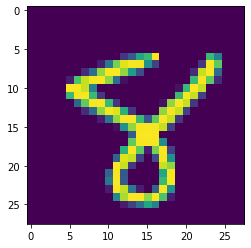

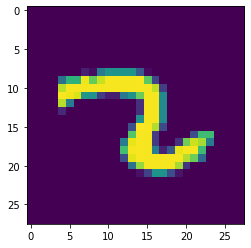

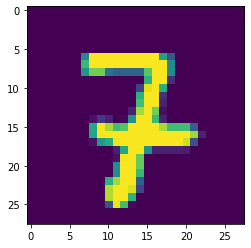

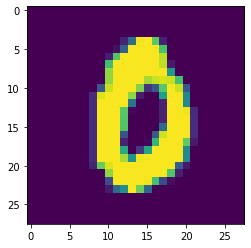

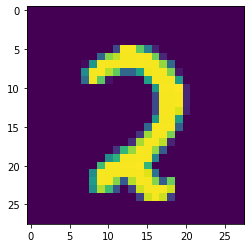

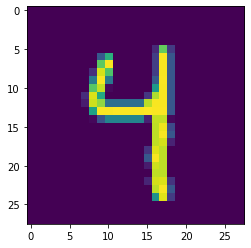

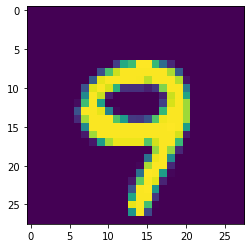

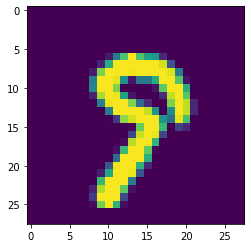

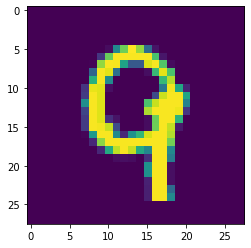

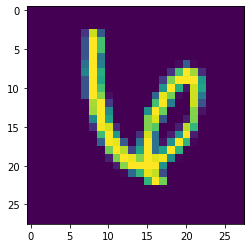

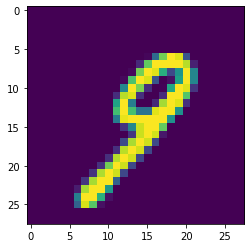

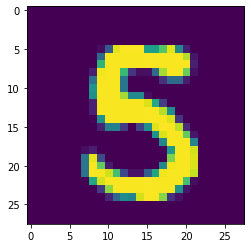

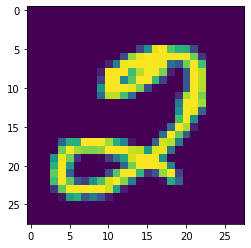

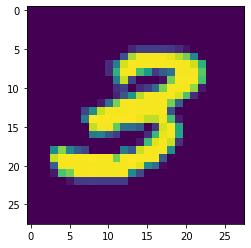

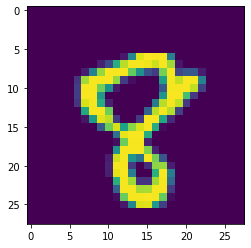

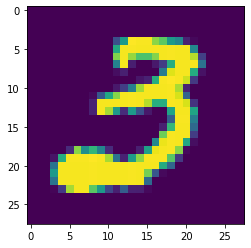

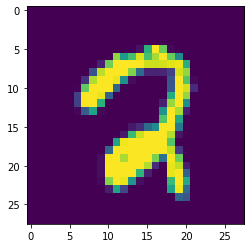

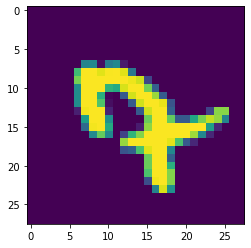

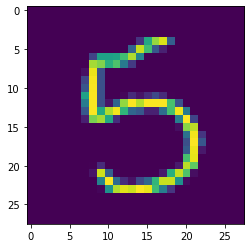

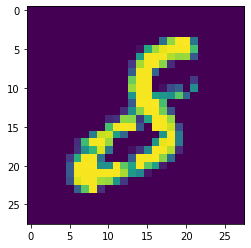

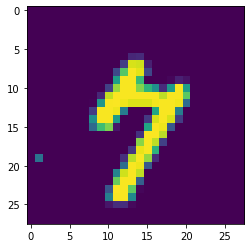

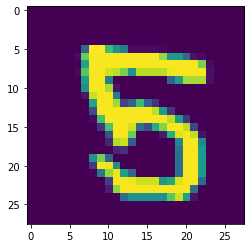

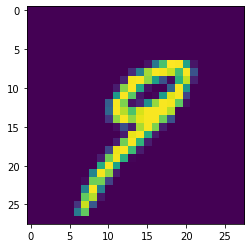

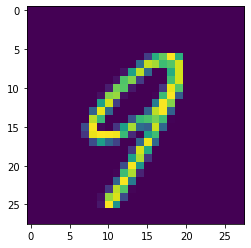

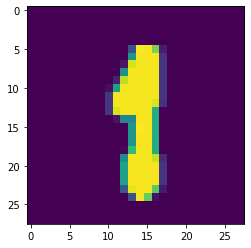

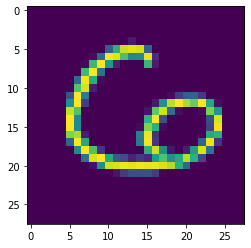

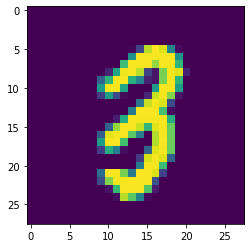

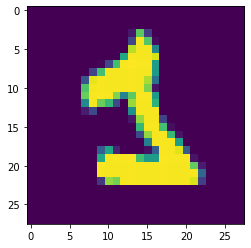

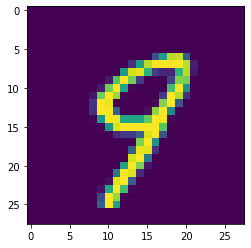

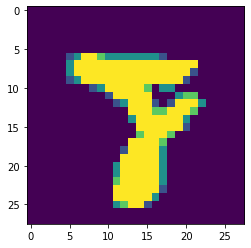

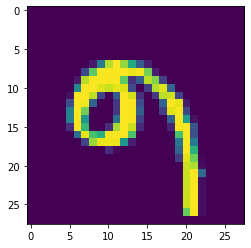

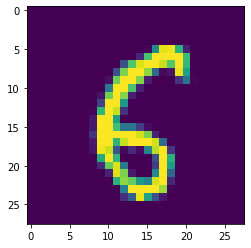

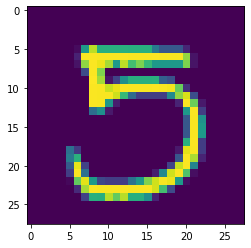

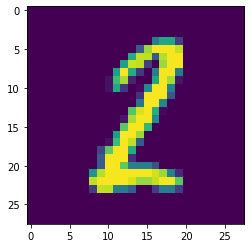

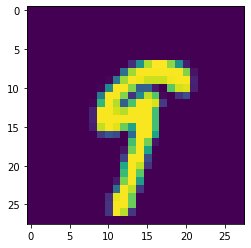

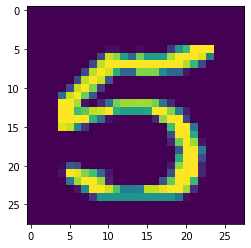

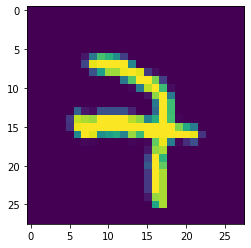

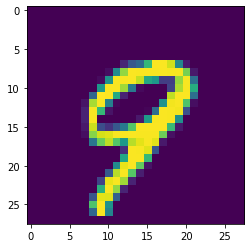

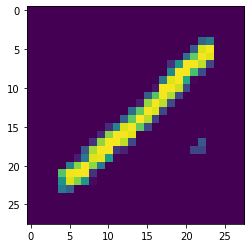

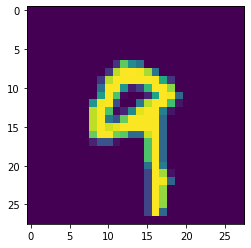

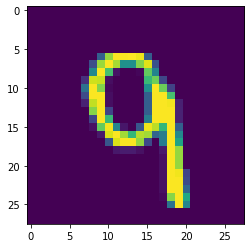

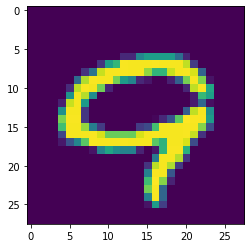

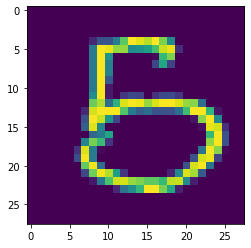

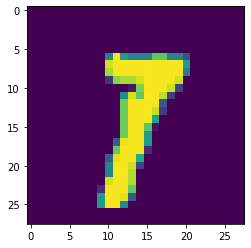

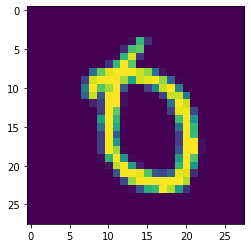

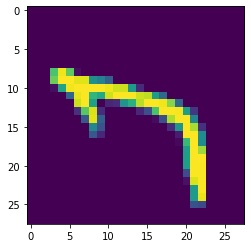

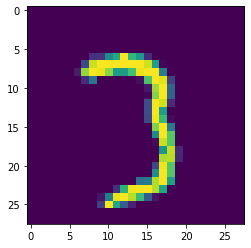

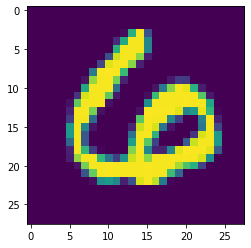

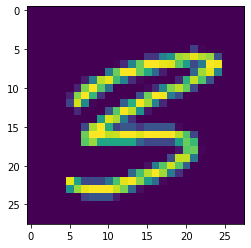

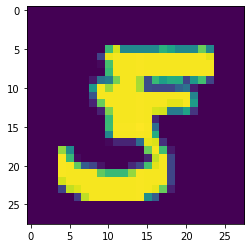

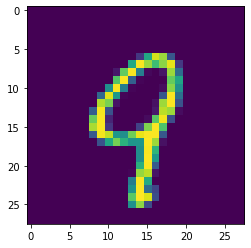

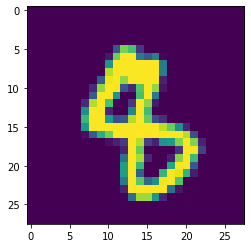

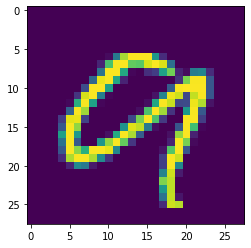

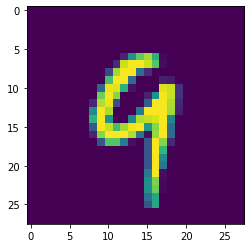

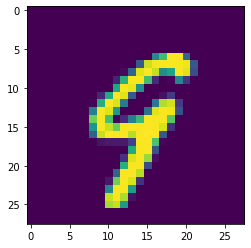

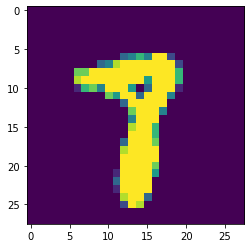

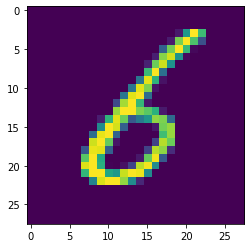

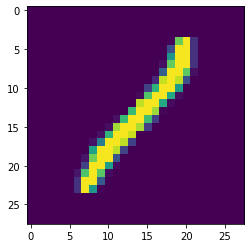

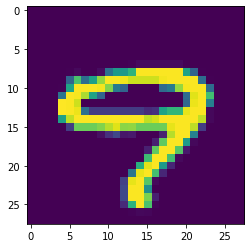

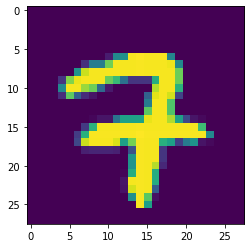

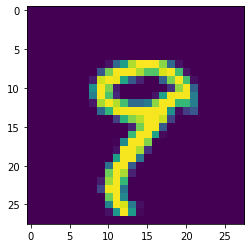

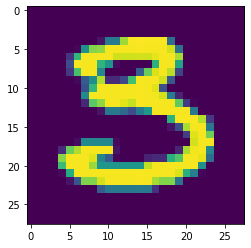

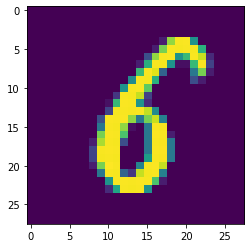

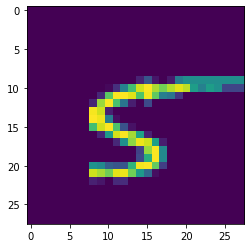

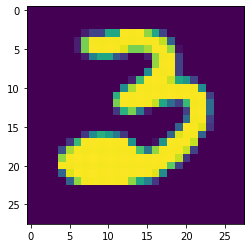

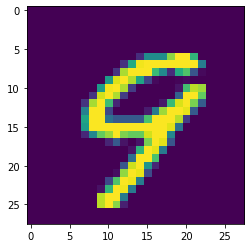

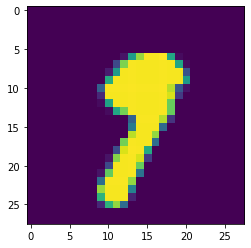

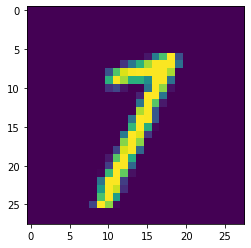

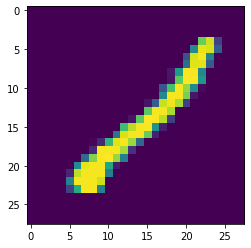

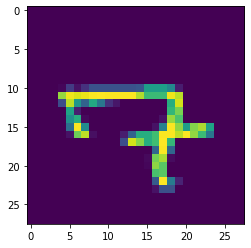

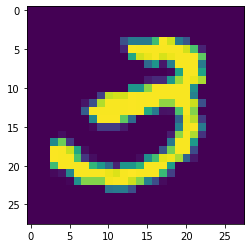

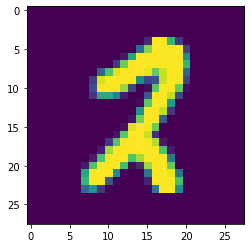

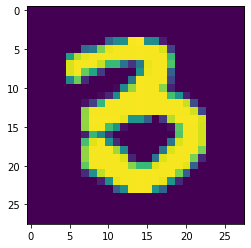

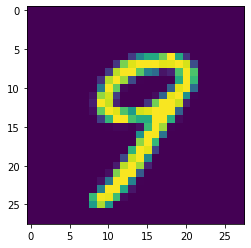

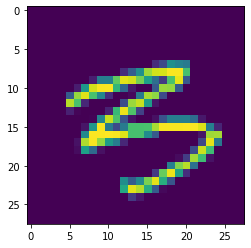

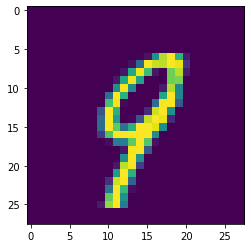

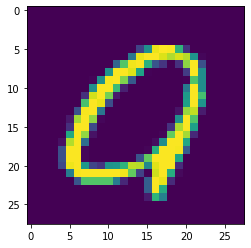

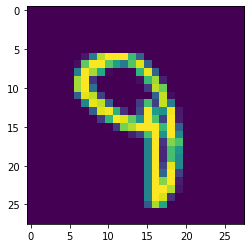

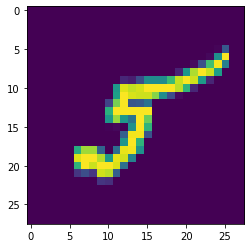

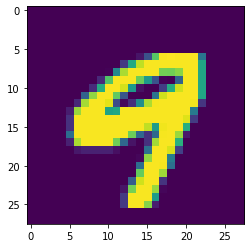

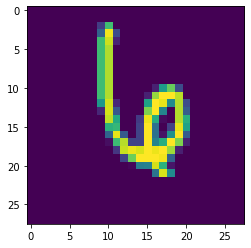

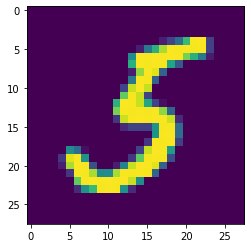

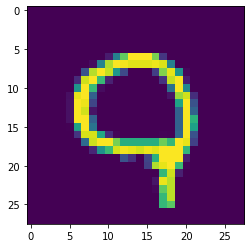

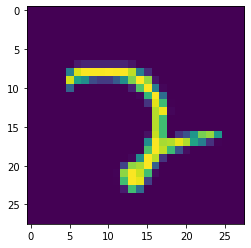

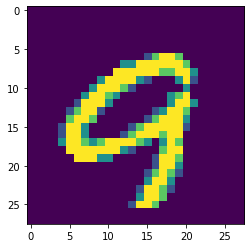

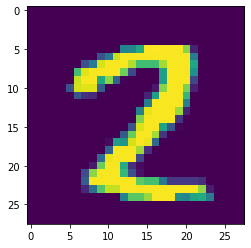

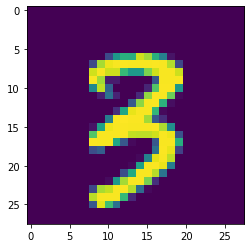

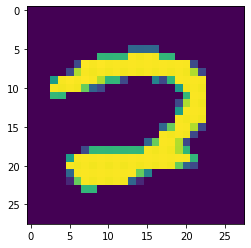

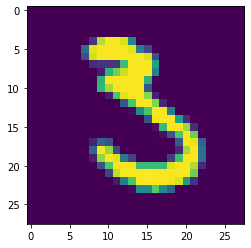

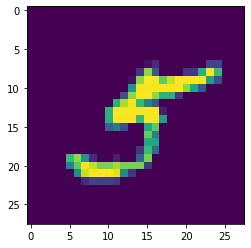

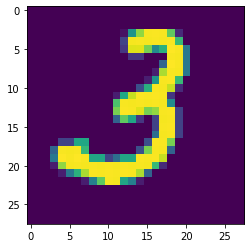

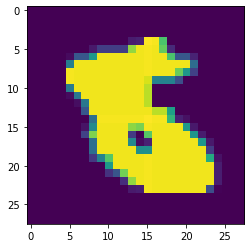

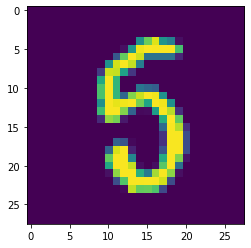

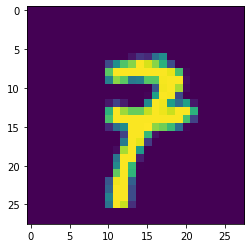

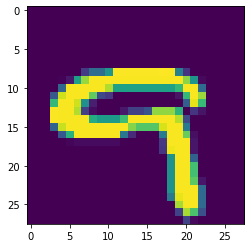

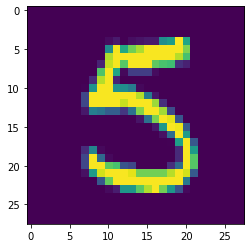

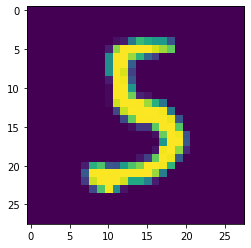

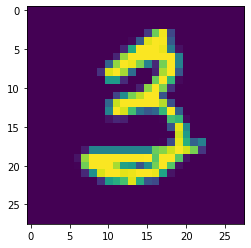

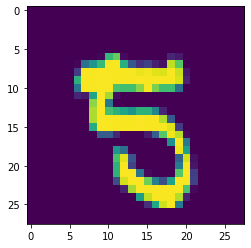

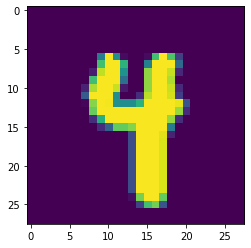

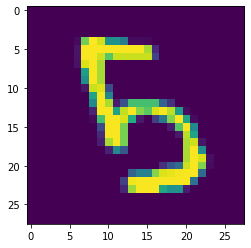

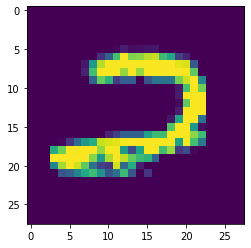

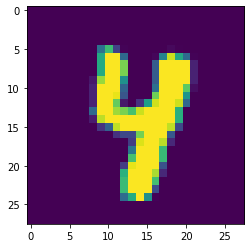

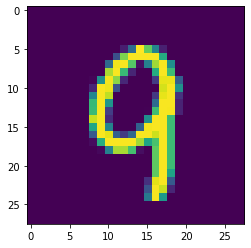

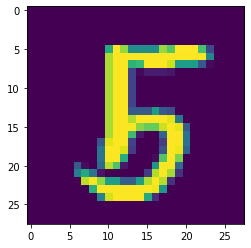

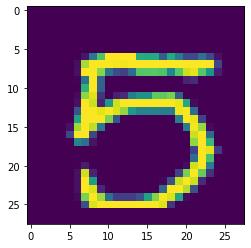

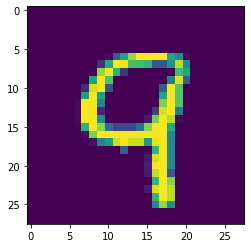

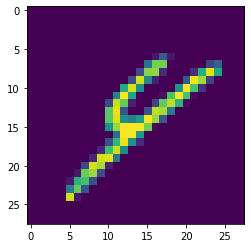

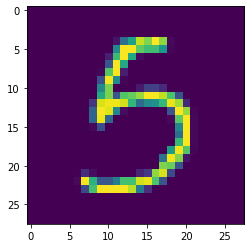

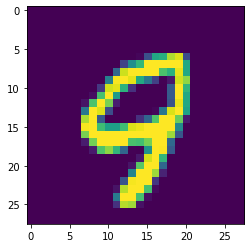

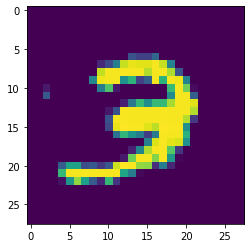

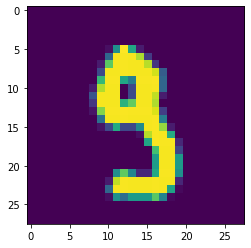

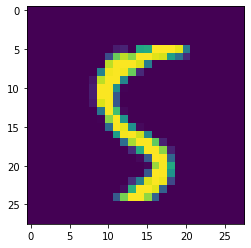

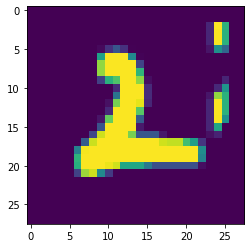

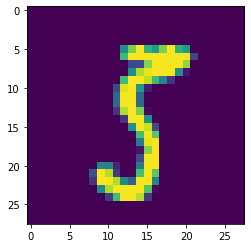

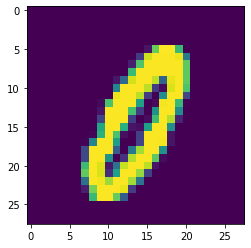

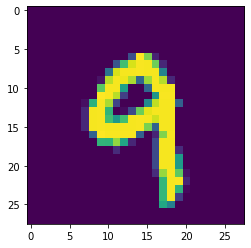

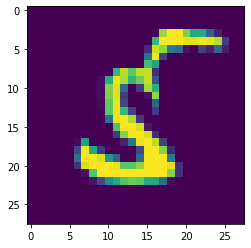

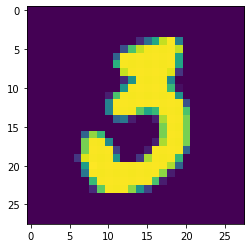

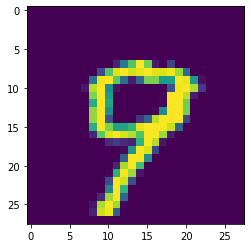

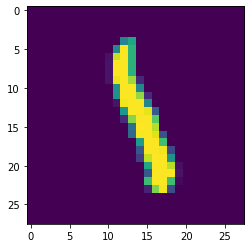

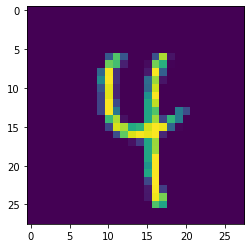

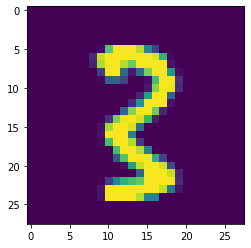

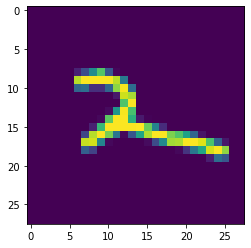

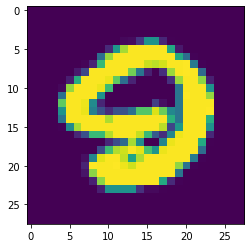

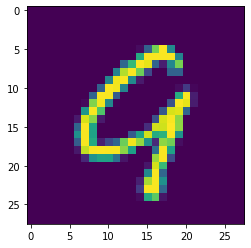

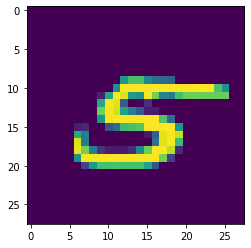

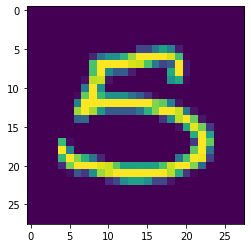

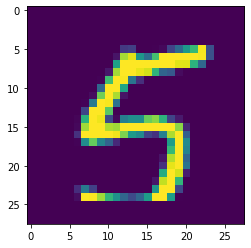

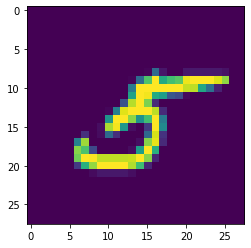

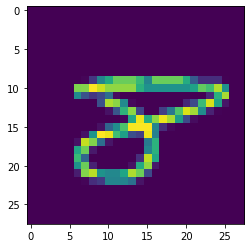

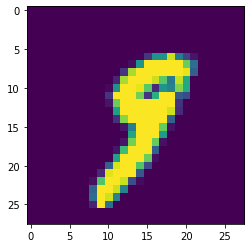

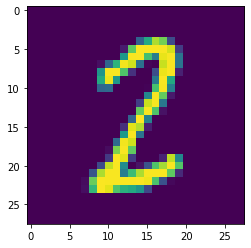

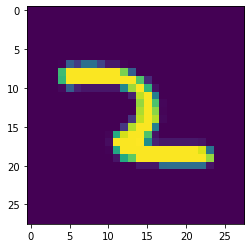

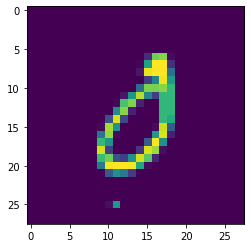

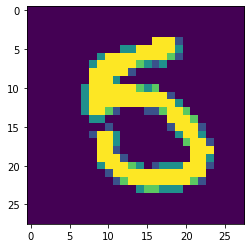

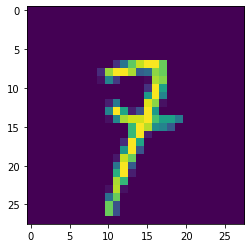

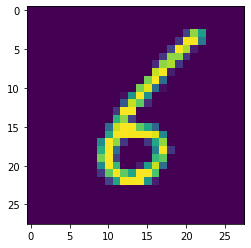

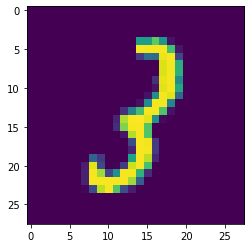

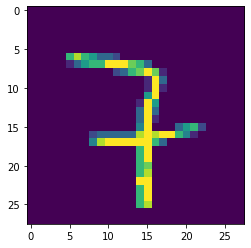

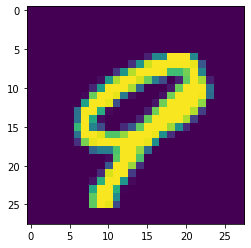

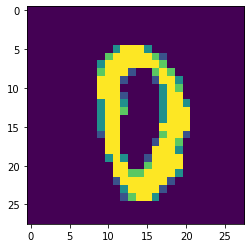

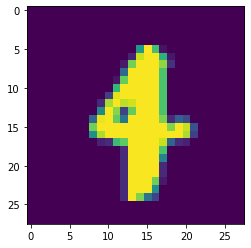

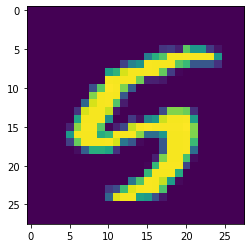

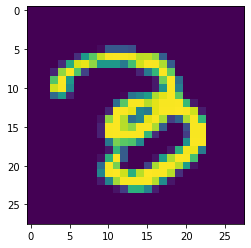

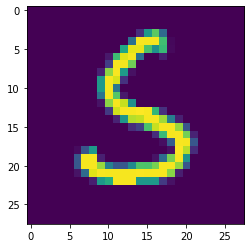

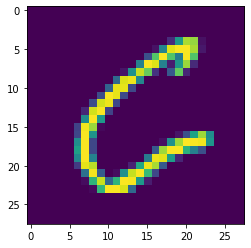

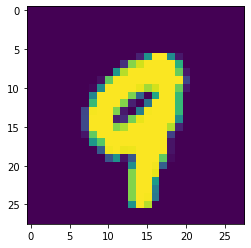

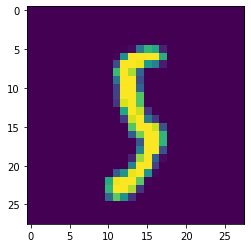

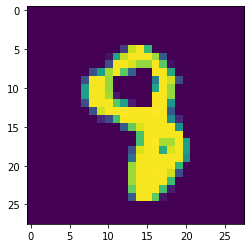

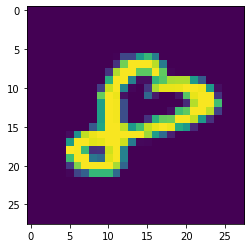

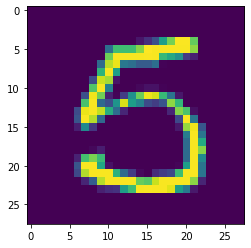

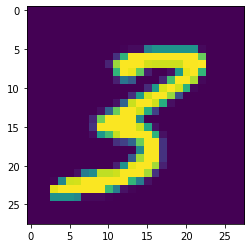

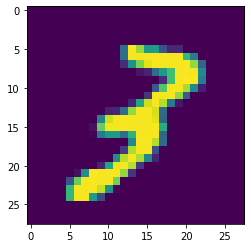

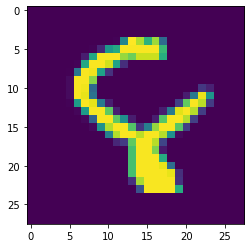

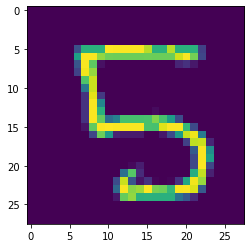

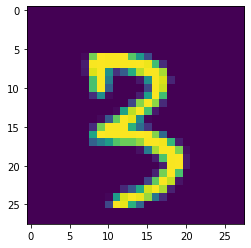

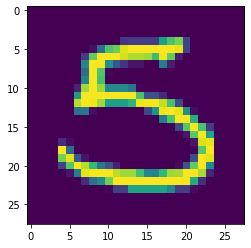

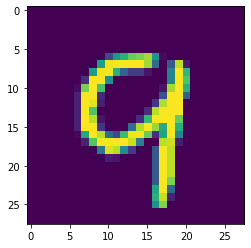

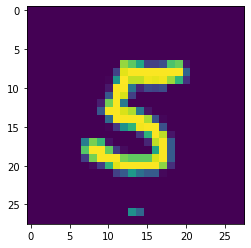

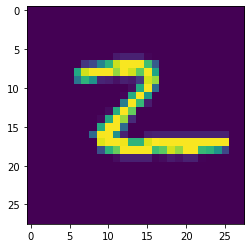

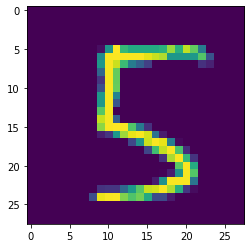

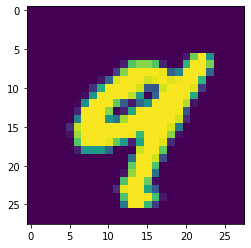

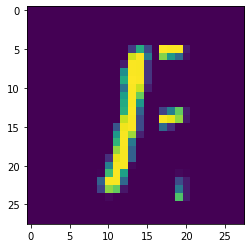

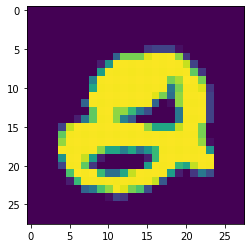

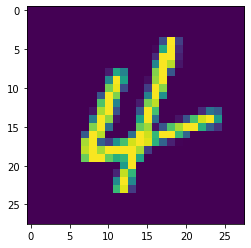

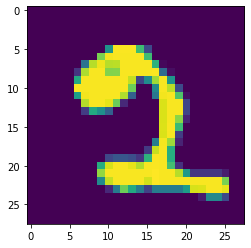

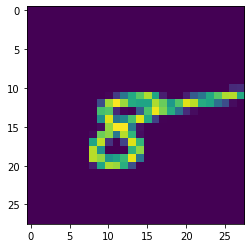

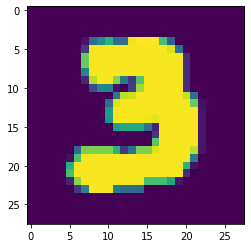

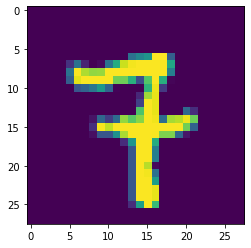

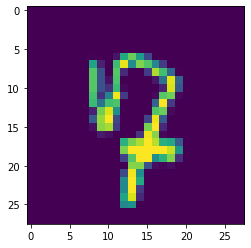

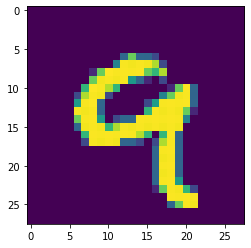

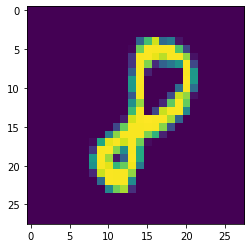

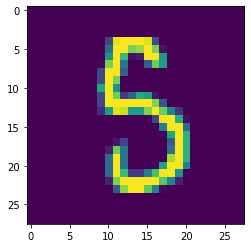

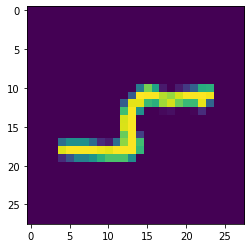

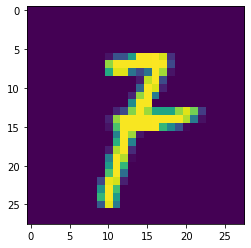

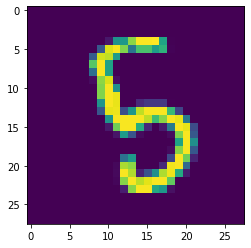

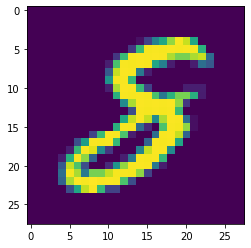

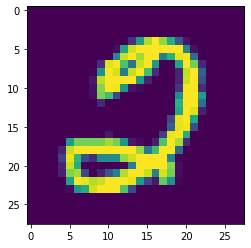

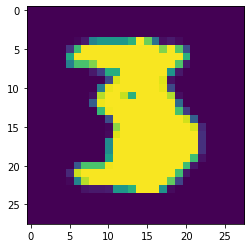

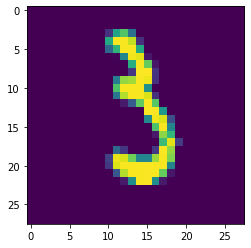

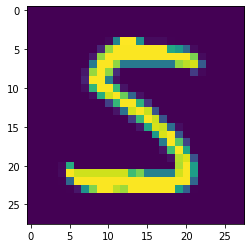

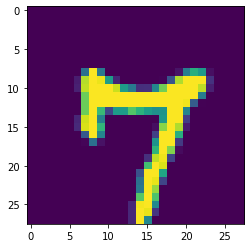

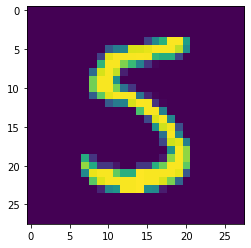

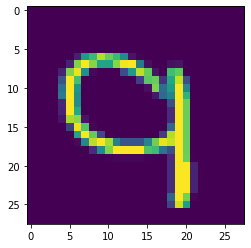

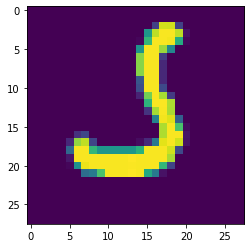

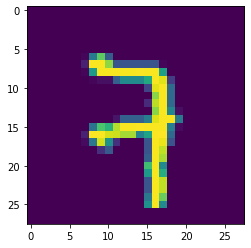

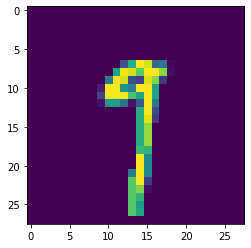

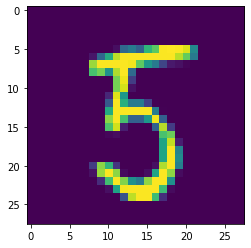

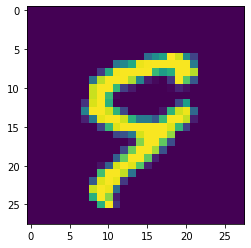

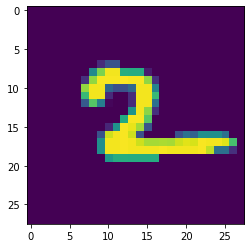

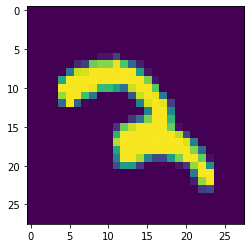

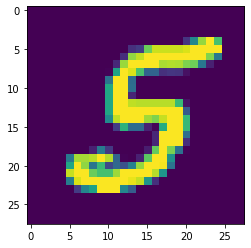

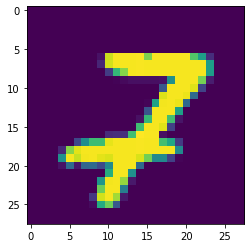

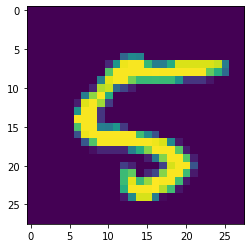

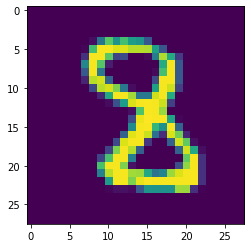

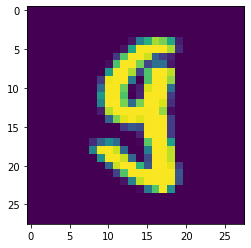

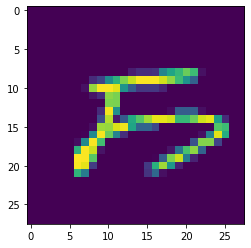

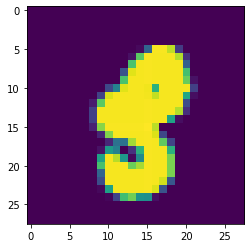

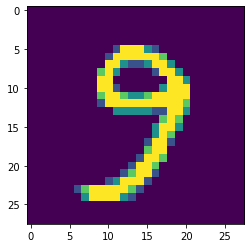

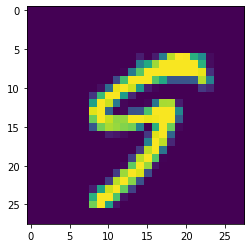

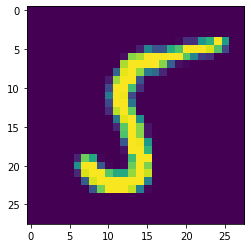

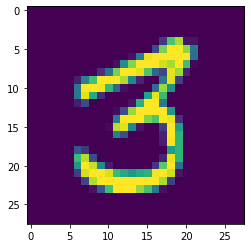

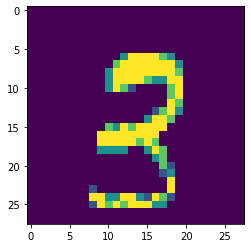

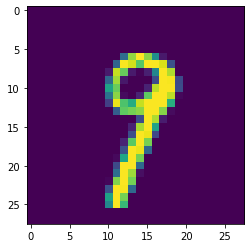

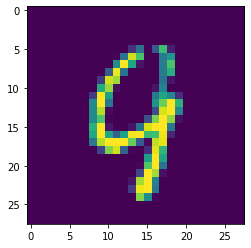

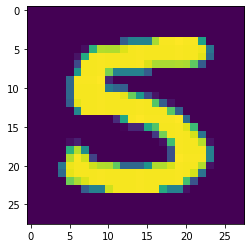

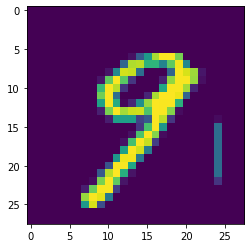

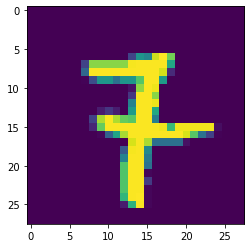

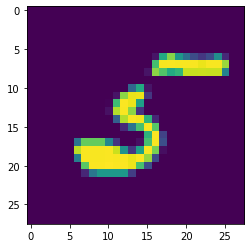

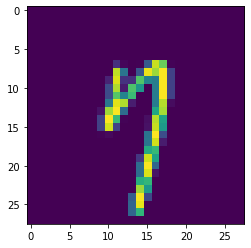

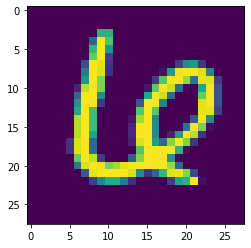

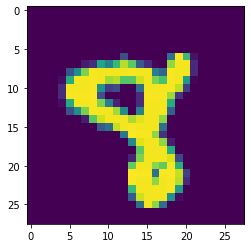

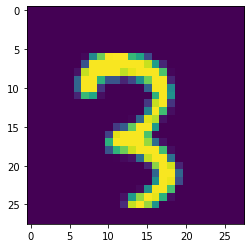

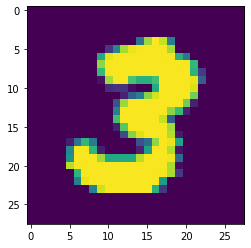

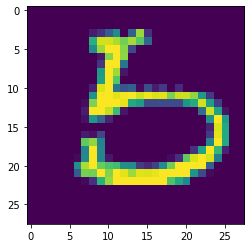

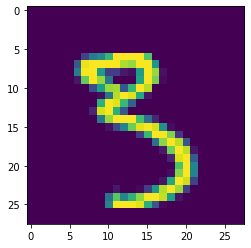

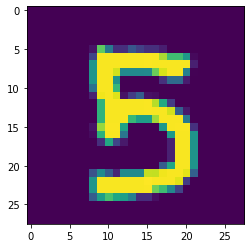

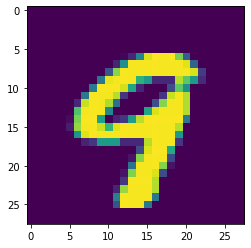

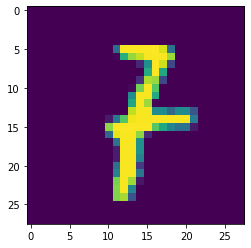

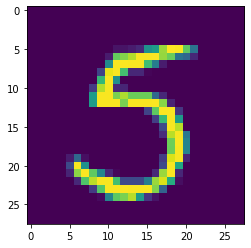

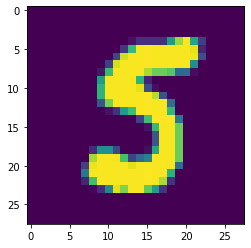

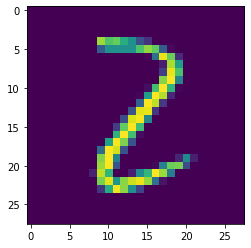

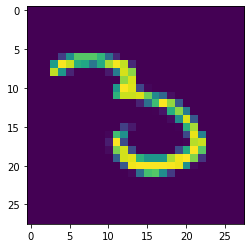

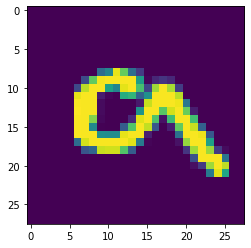

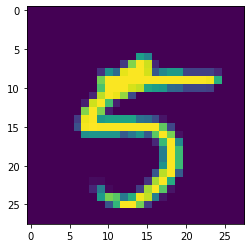

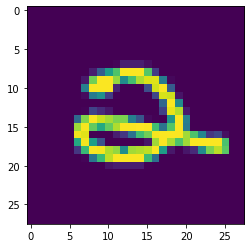

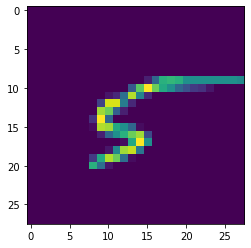

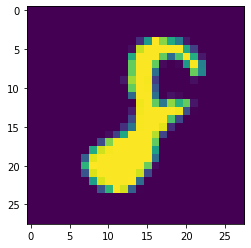

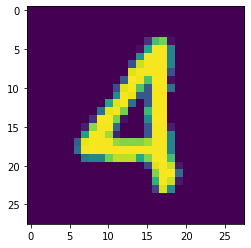

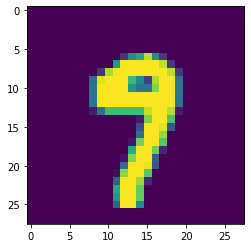

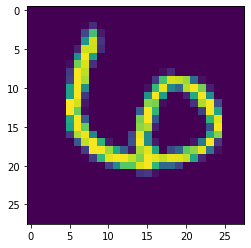

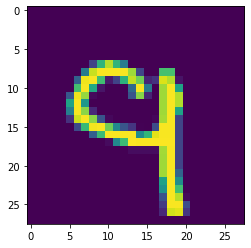

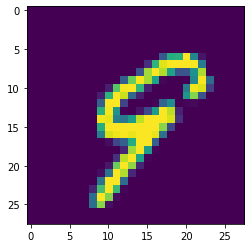

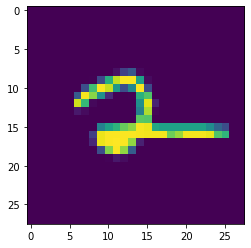

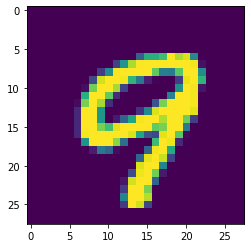

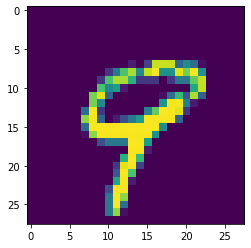

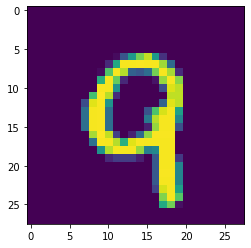

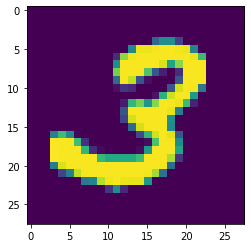

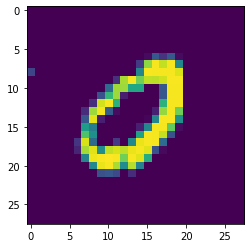

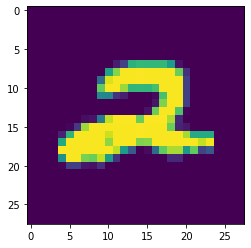

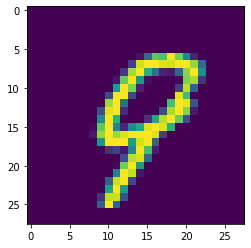

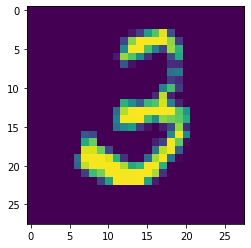

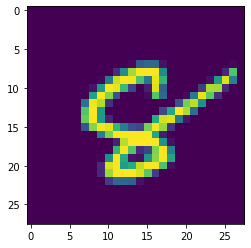

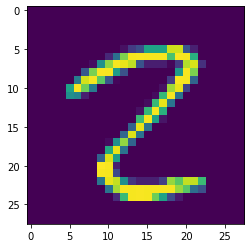

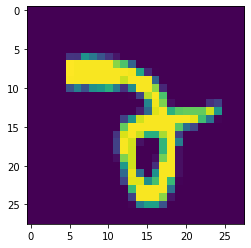

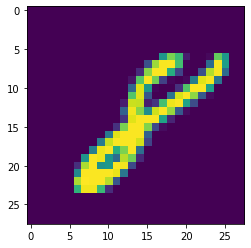

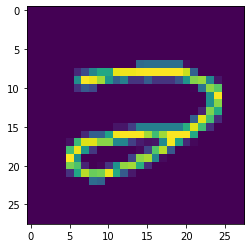

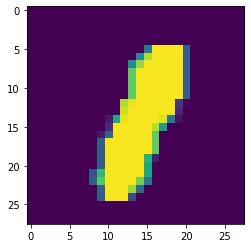

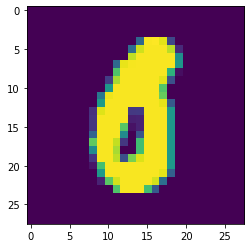

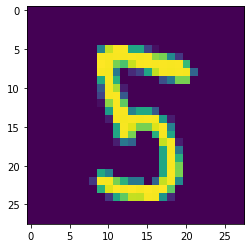

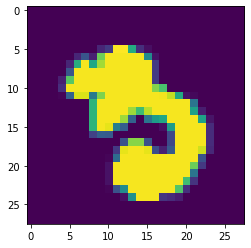

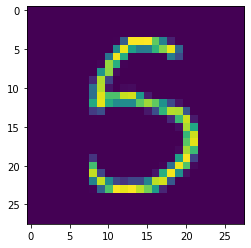

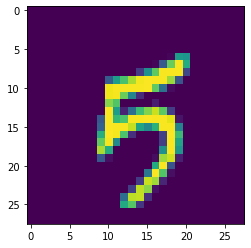

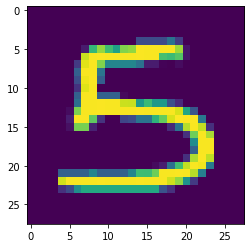

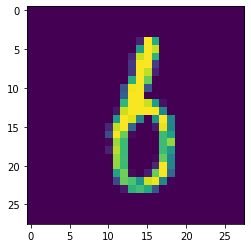

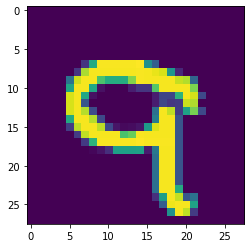

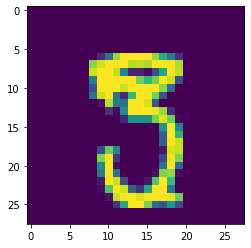

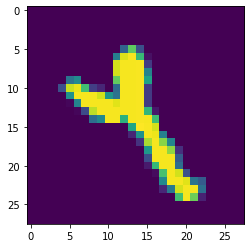

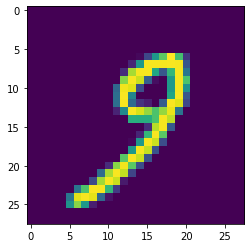

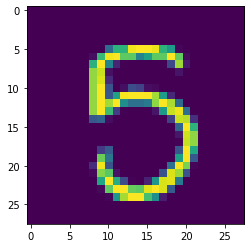

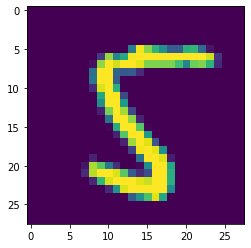

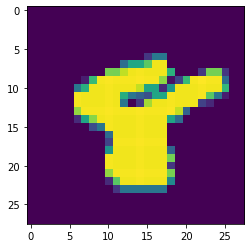

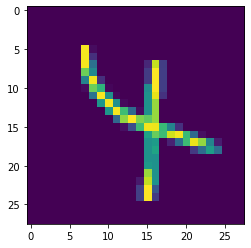

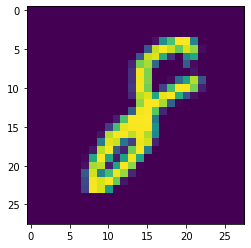

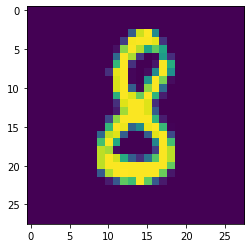

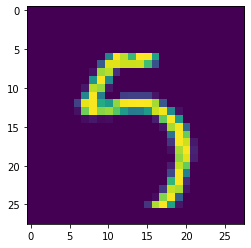

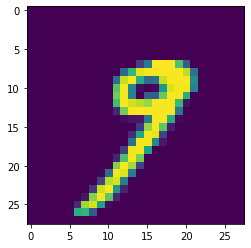

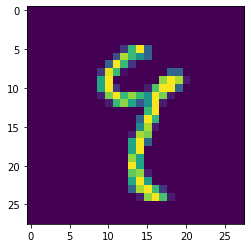

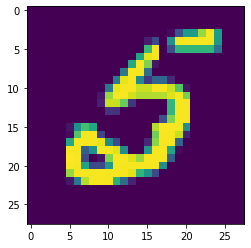

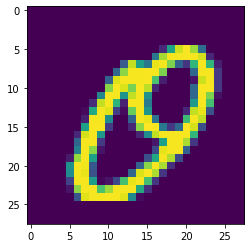

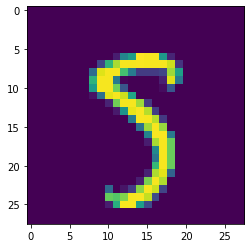

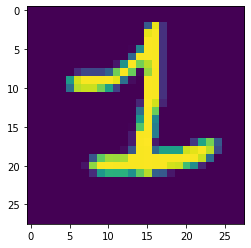

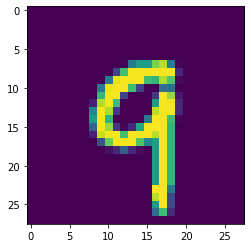

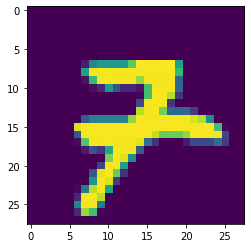

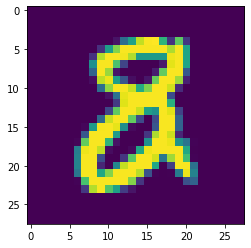

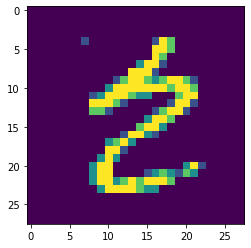

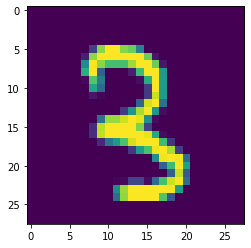

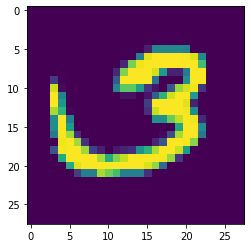

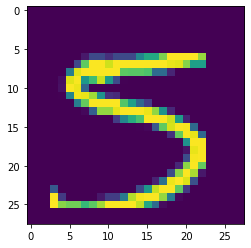

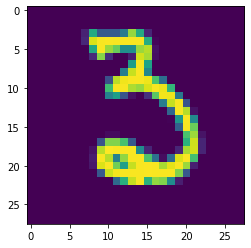

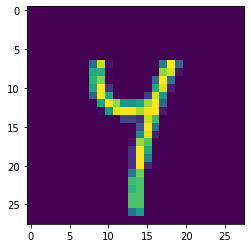

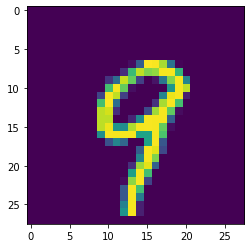

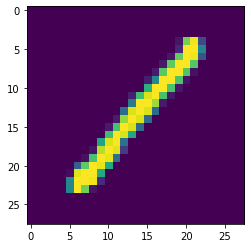

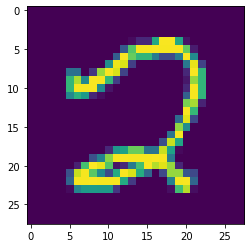

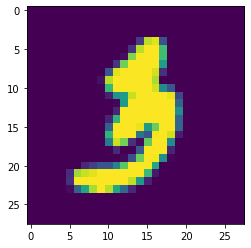

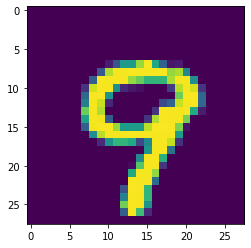

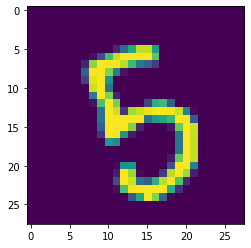

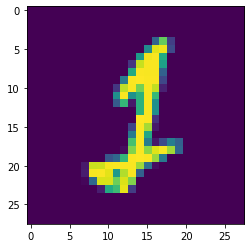

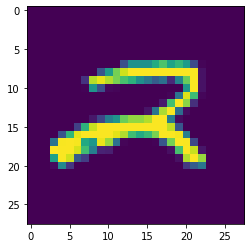

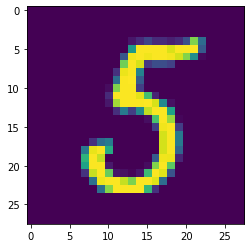

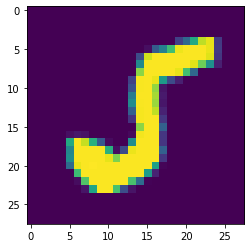

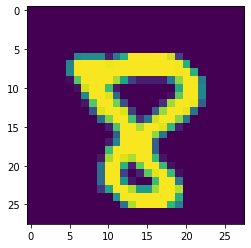

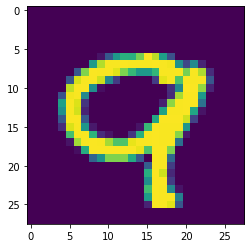

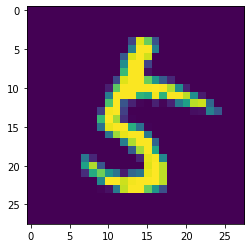

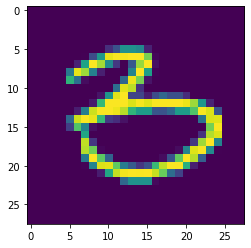

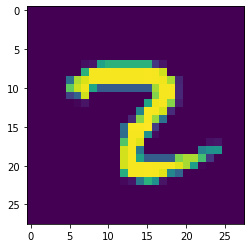

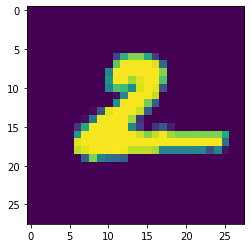

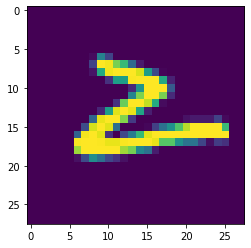

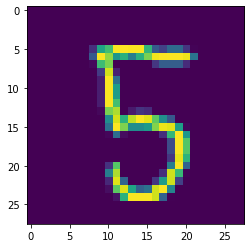

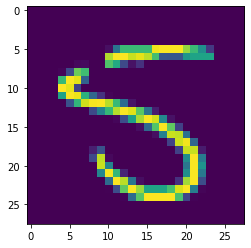

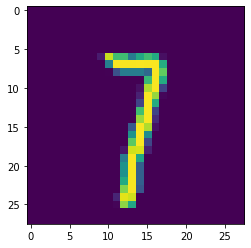

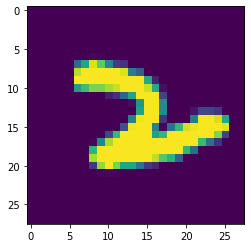

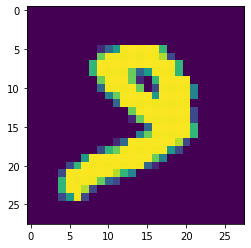

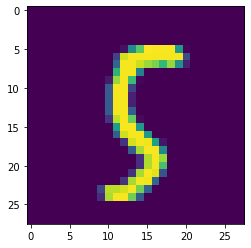

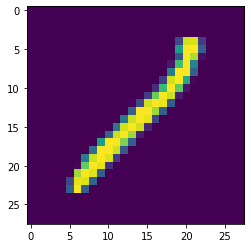

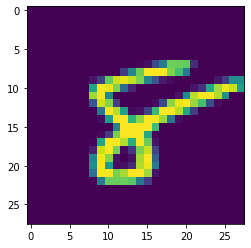

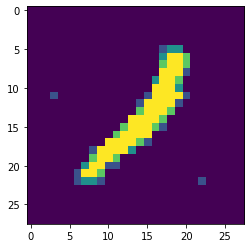

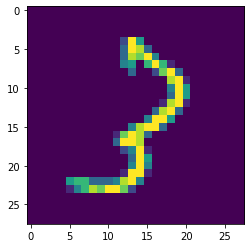

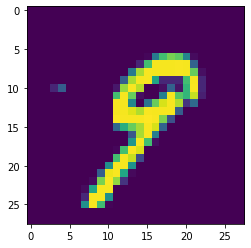

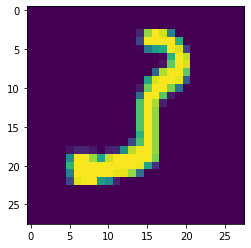

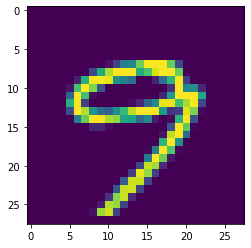

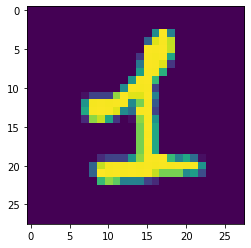

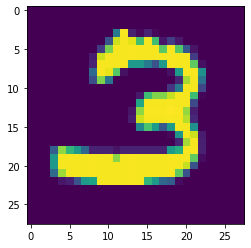

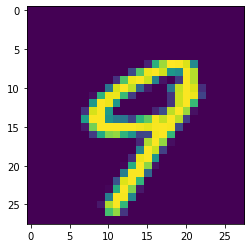

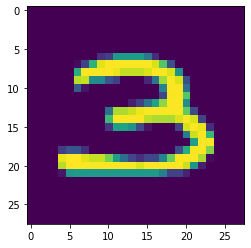

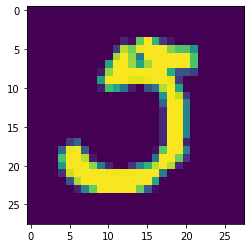

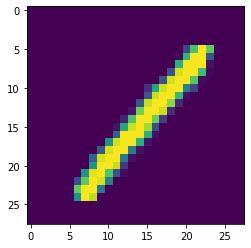

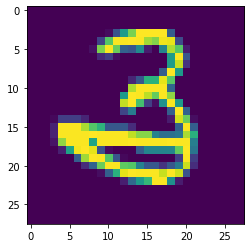

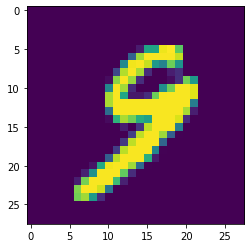

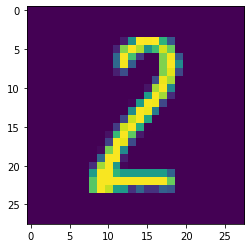

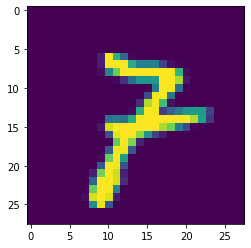

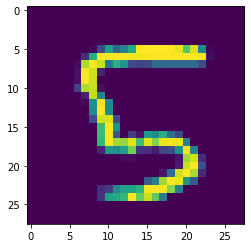

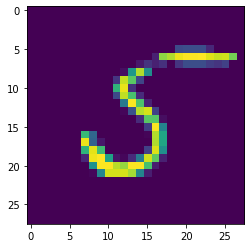

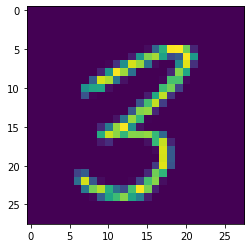

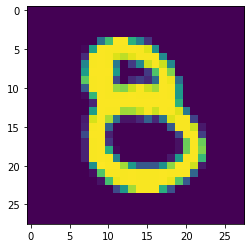

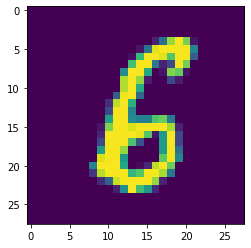

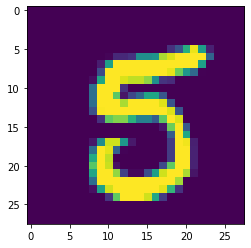

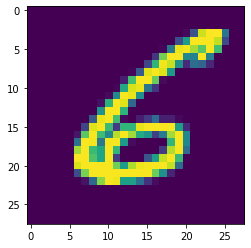

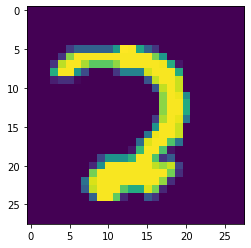

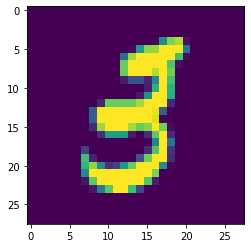

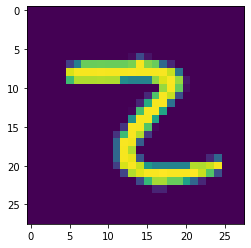

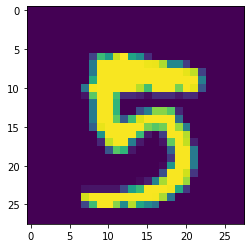

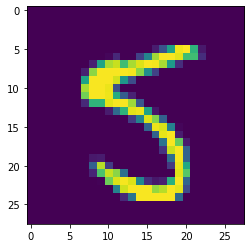

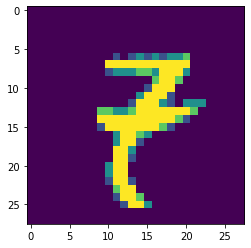

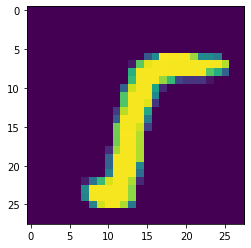

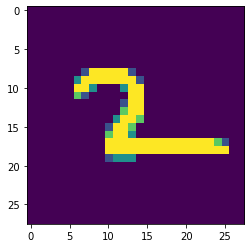

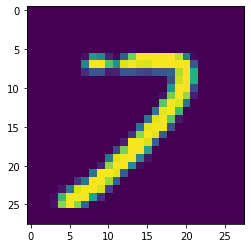

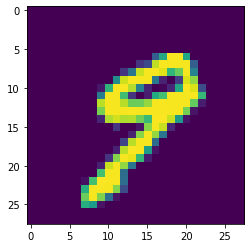

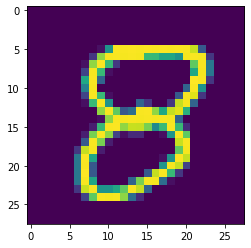

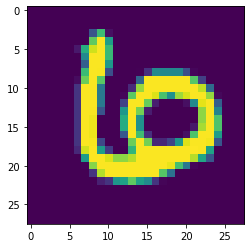

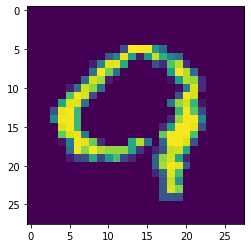

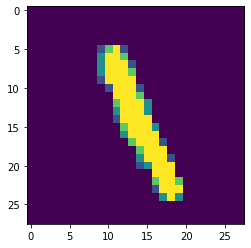

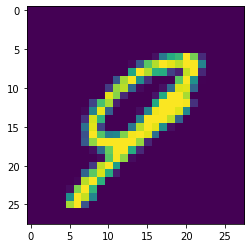

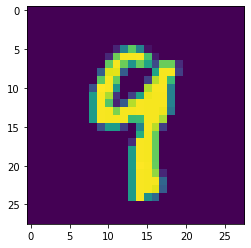

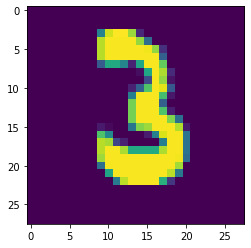

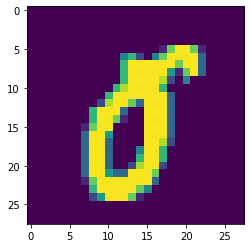

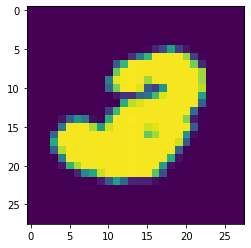

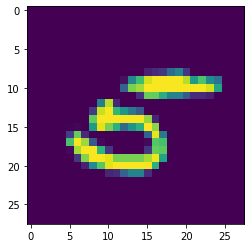

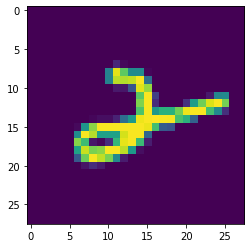

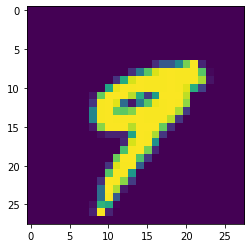

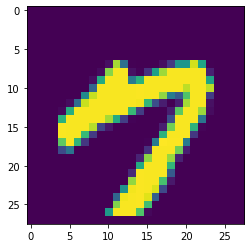

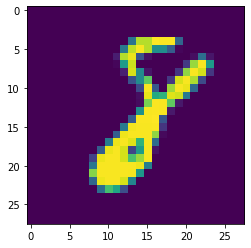

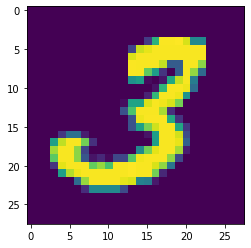

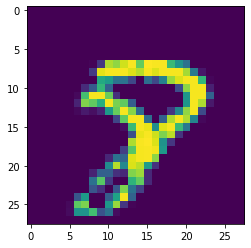

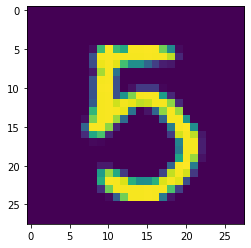

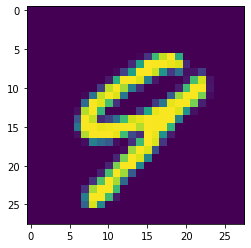

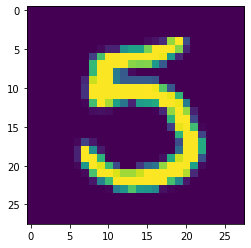

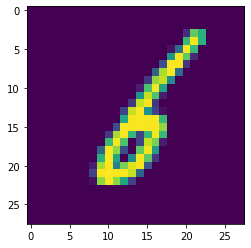

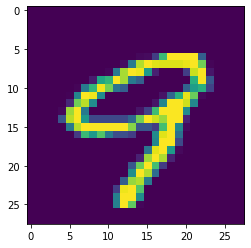

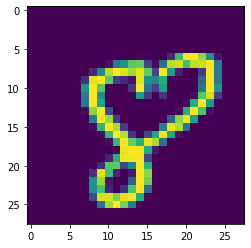

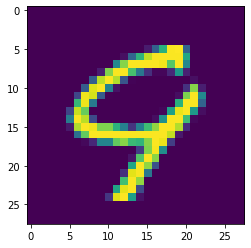

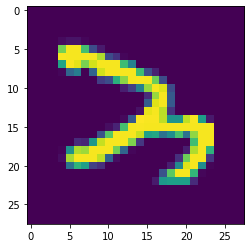

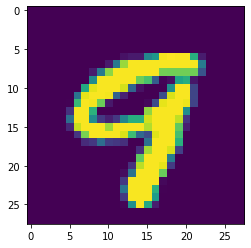

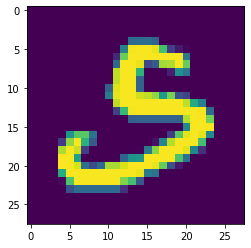

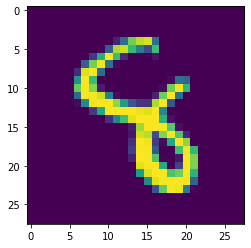

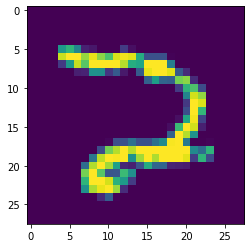

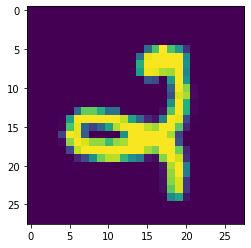

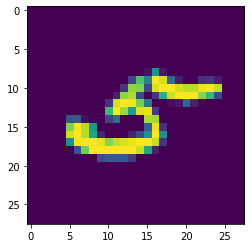

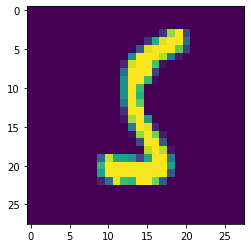

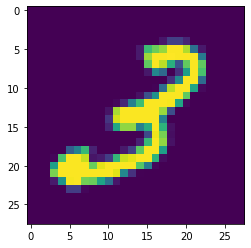

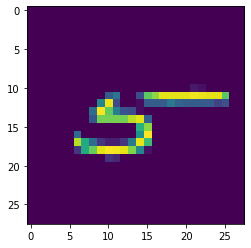

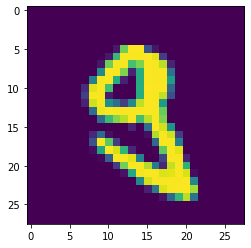

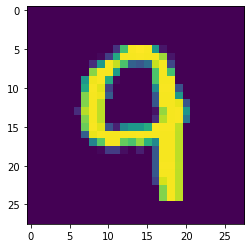

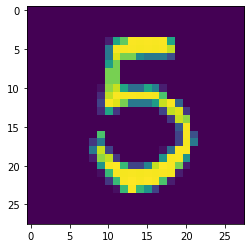

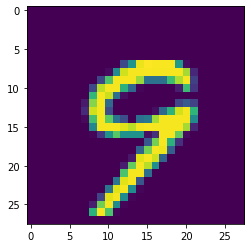

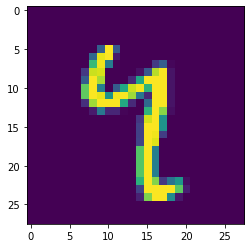

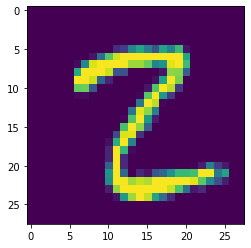

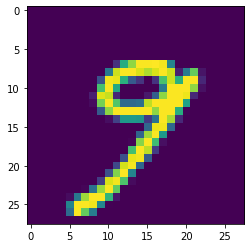

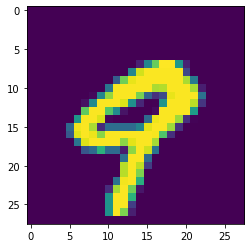

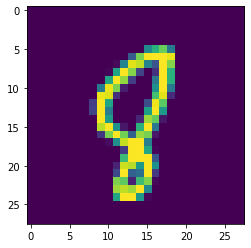

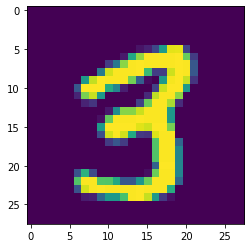

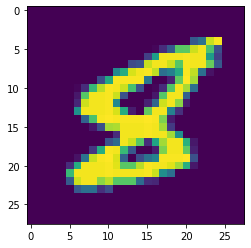

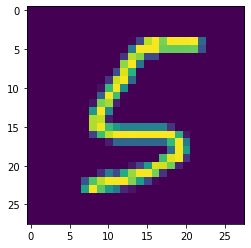

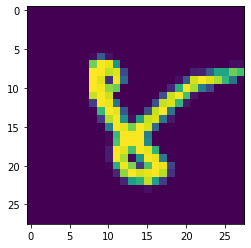

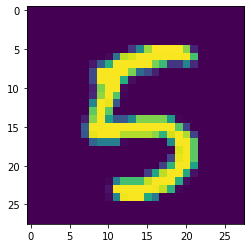

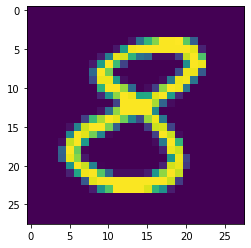

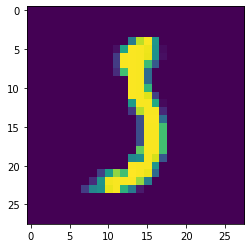

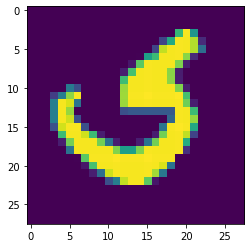

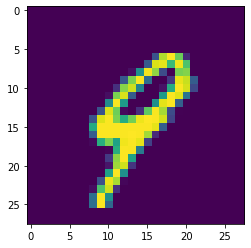

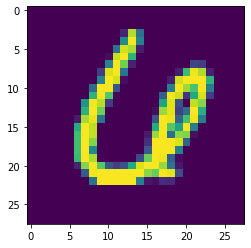

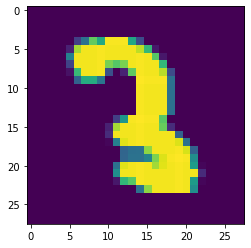

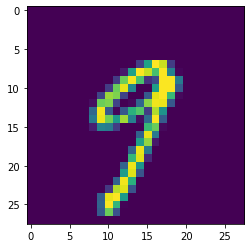

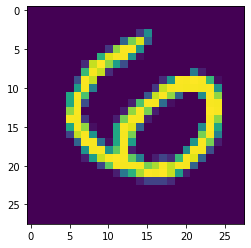

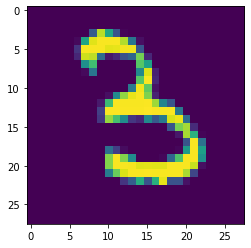

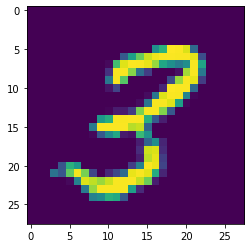

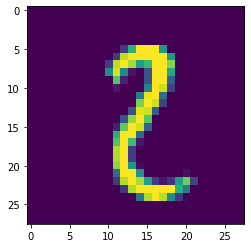

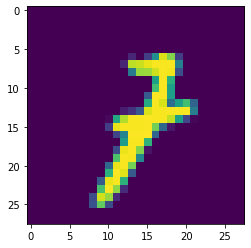

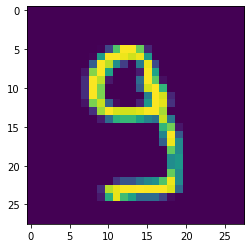

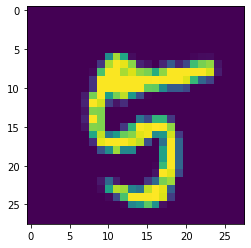

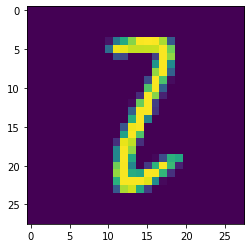

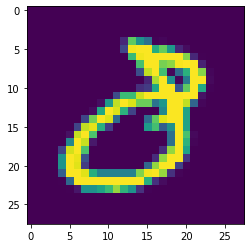

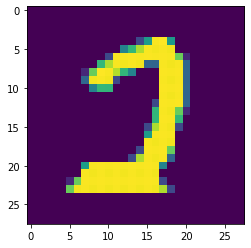

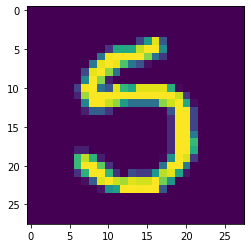

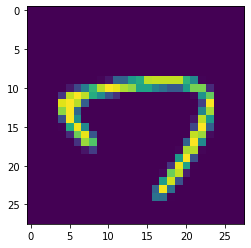

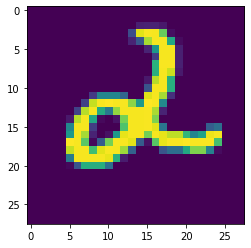

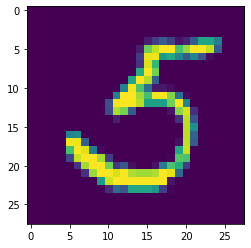

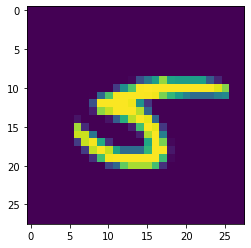

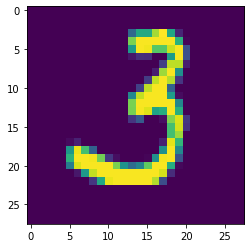

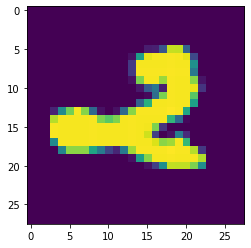

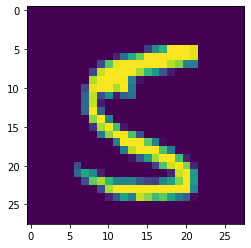

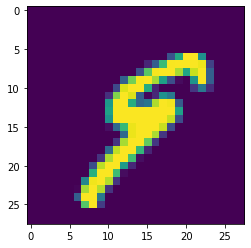

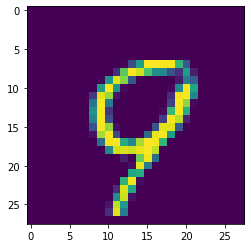

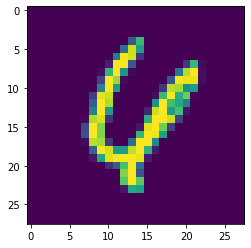

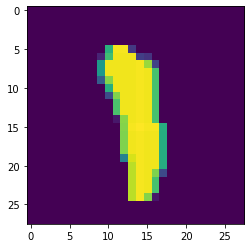

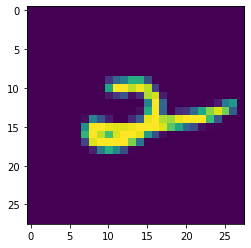

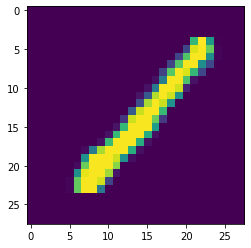

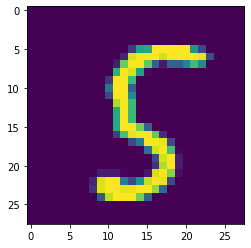

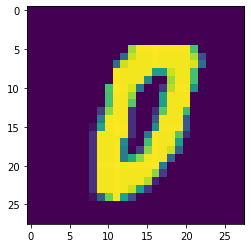

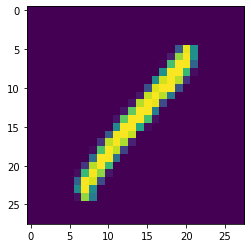

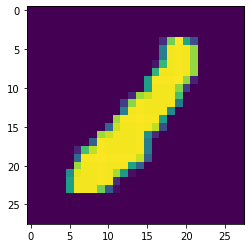

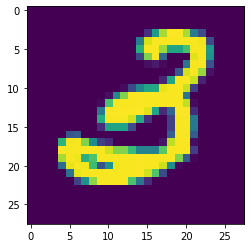

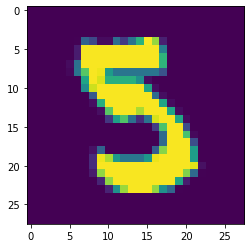

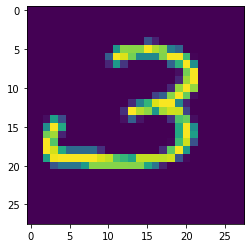

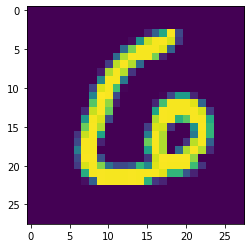

0.85


In [133]:
# visualizing the misclassifications
V, W, net, errors = neural_network(nn_structure)
final_weights = batch_grad_descent(x_input, y_output, 5, 2, 0.001, V, W, net, errors)
acc = 0
for i in range(0,7000):
    V, W, net, errors = forward_propogation(x_input[i], y_output[i], V, final_weights, net, errors)
    n_layers = len(V)
    y = V[n_layers-1]
    label = return_label(y)
#     print(label)
    if label == data_labels[i]:
        acc = acc+1
    else:
        input = x_input[i][:-1].reshape(28,28)
        plt.imshow(input)  
        plt.show()
    
print(acc/7000)

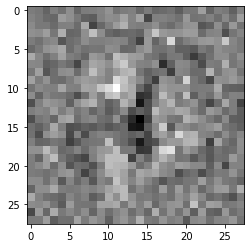

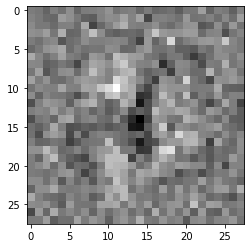

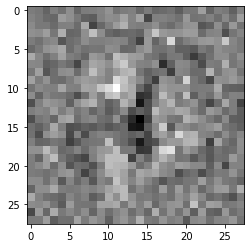

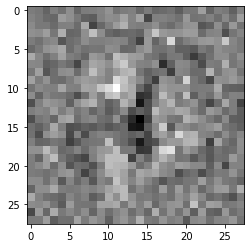

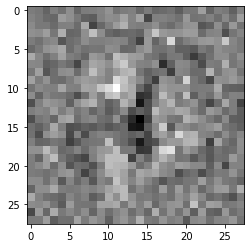

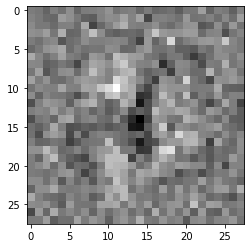

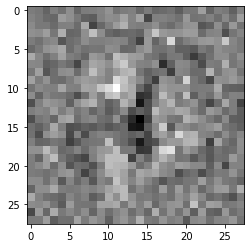

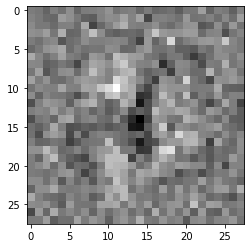

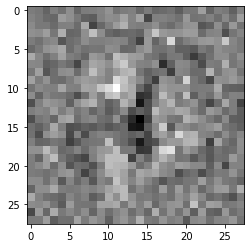

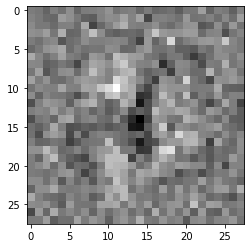

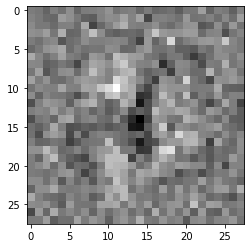

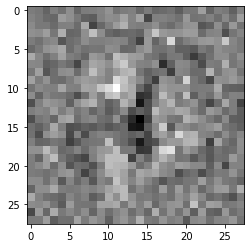

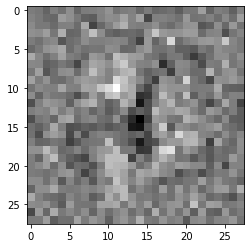

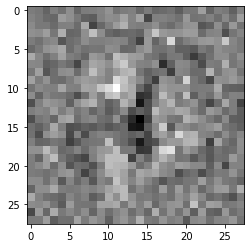

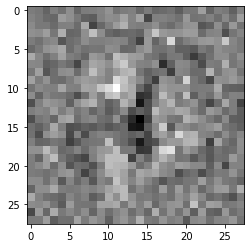

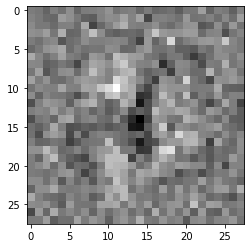

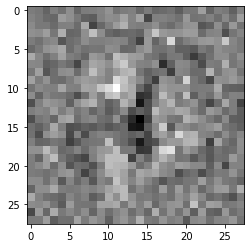

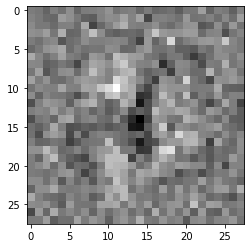

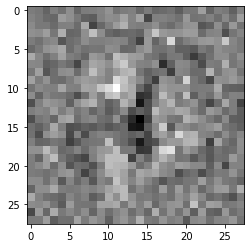

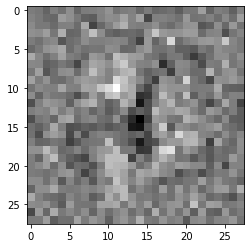

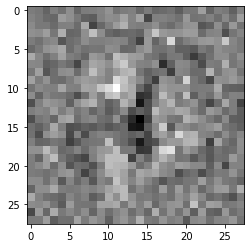

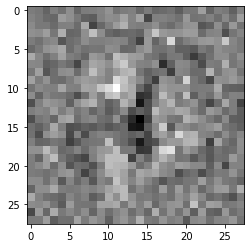

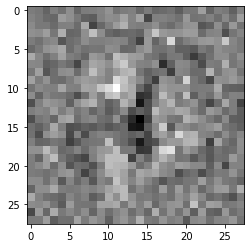

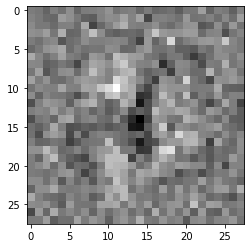

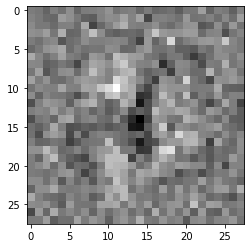

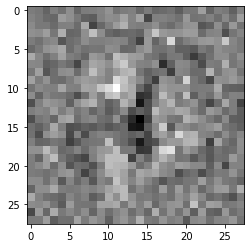

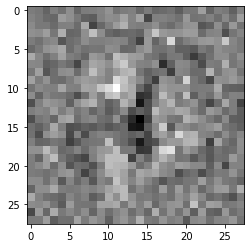

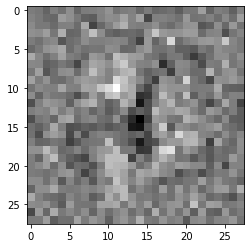

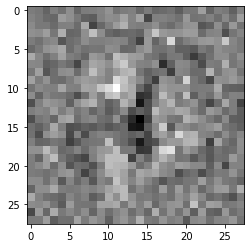

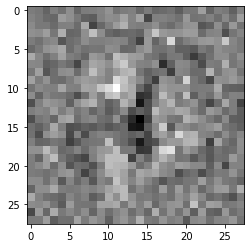

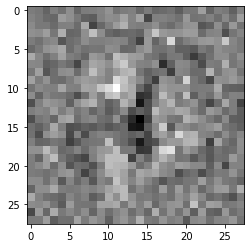

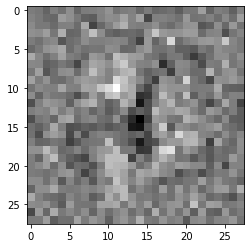

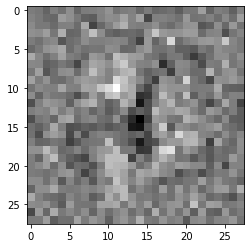

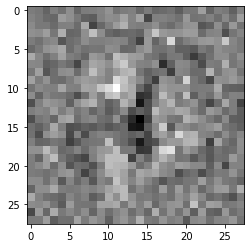

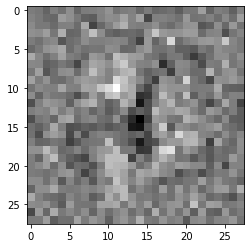

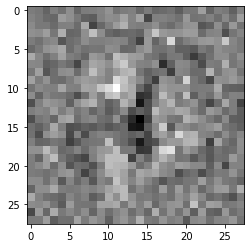

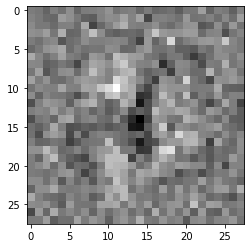

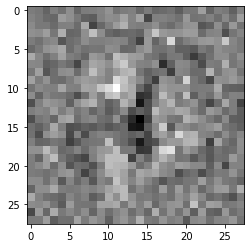

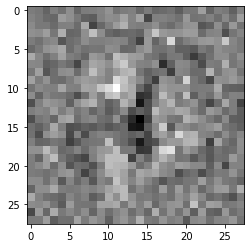

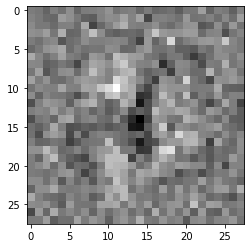

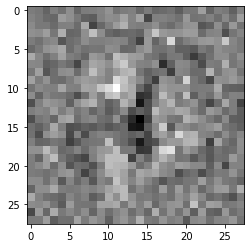

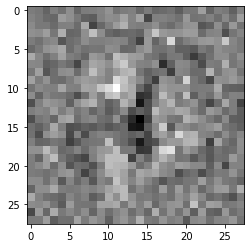

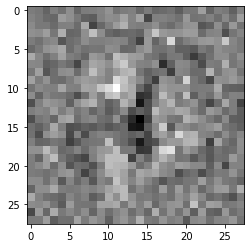

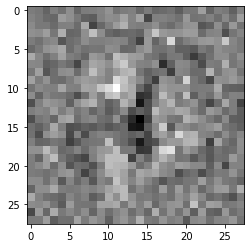

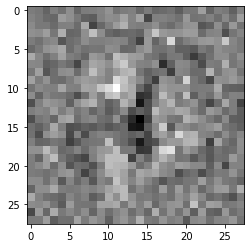

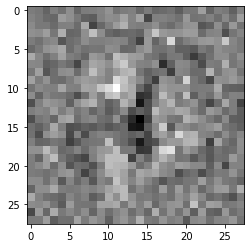

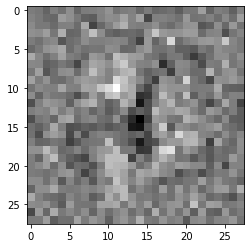

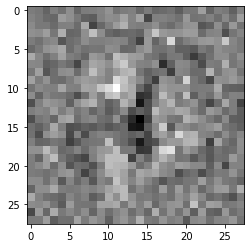

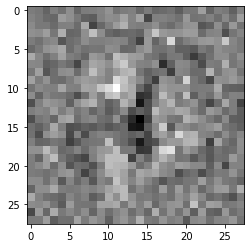

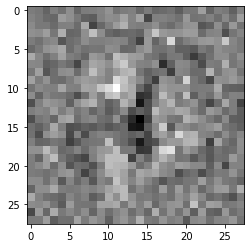

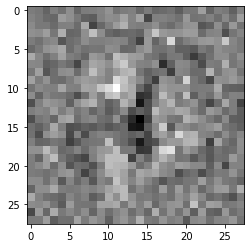

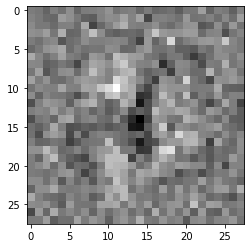

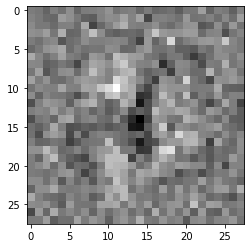

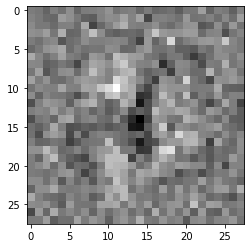

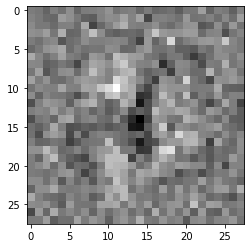

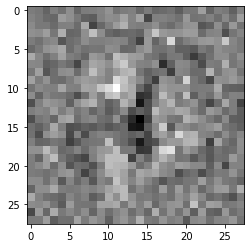

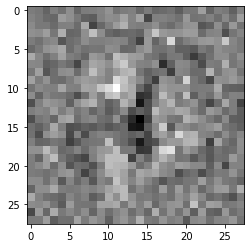

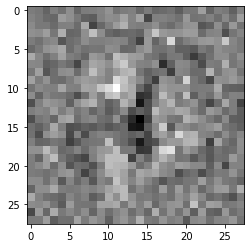

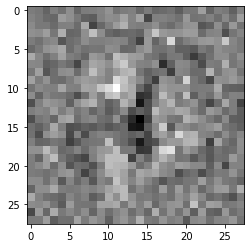

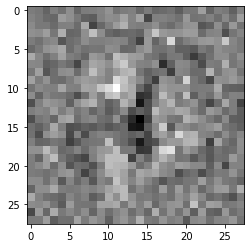

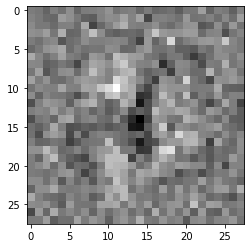

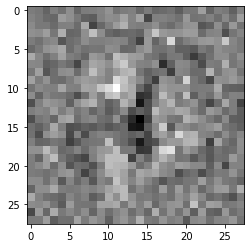

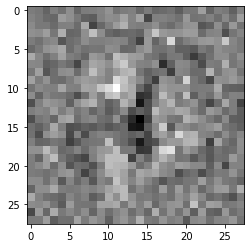

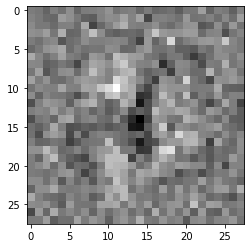

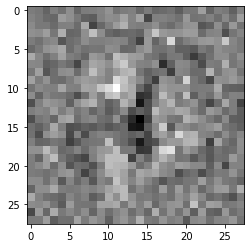

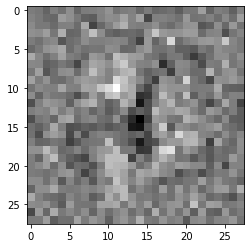

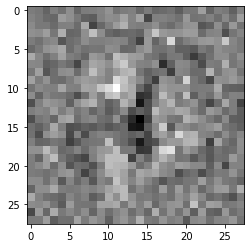

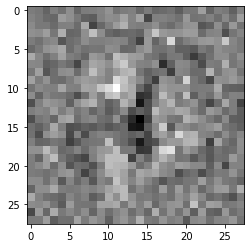

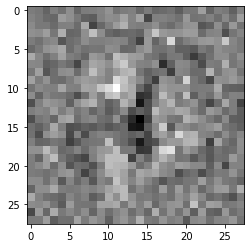

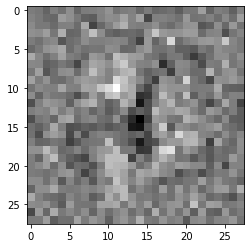

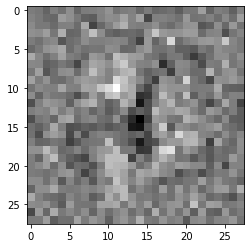

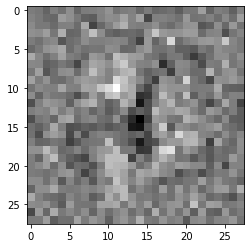

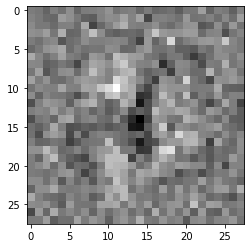

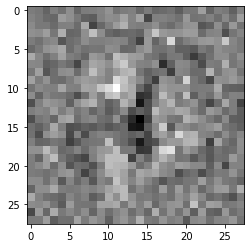

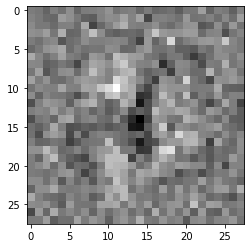

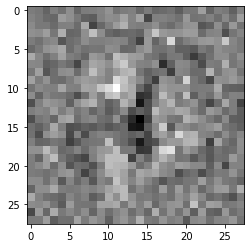

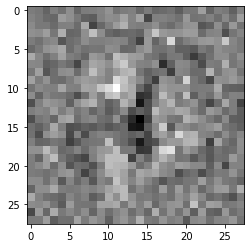

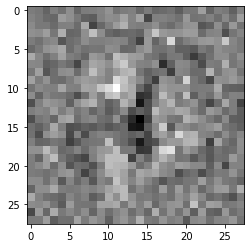

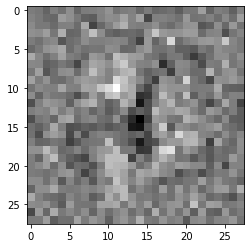

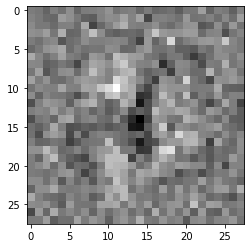

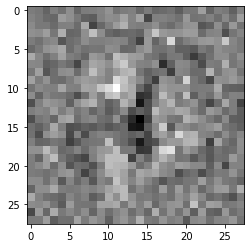

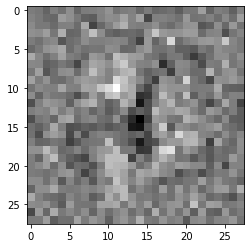

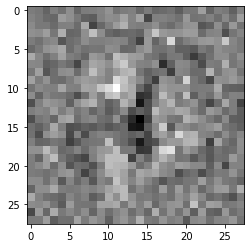

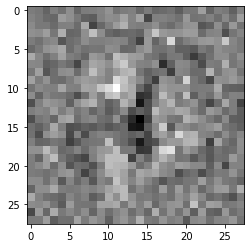

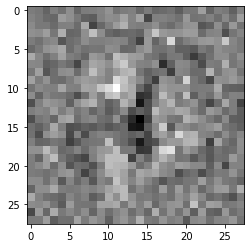

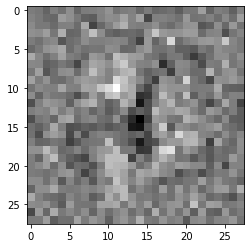

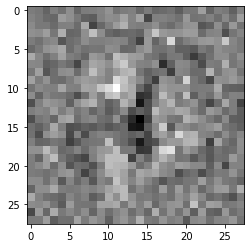

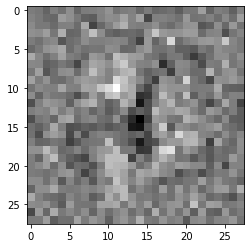

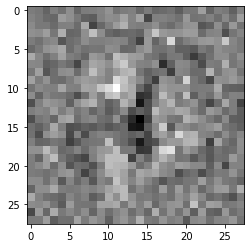

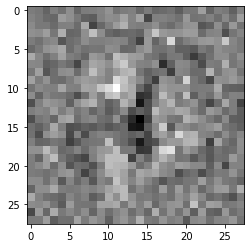

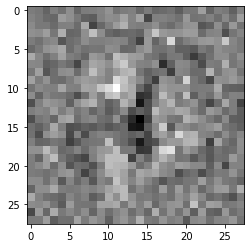

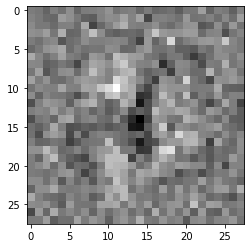

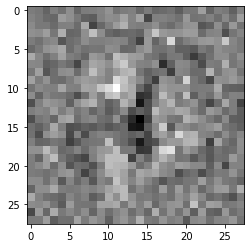

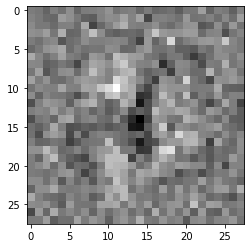

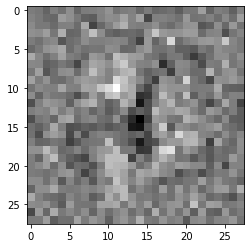

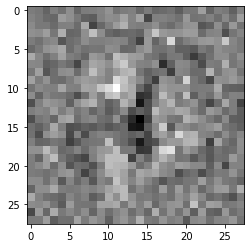

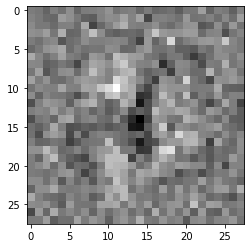

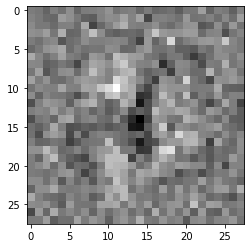

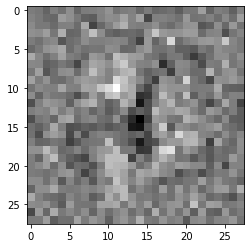

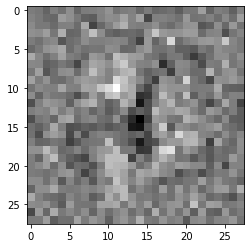

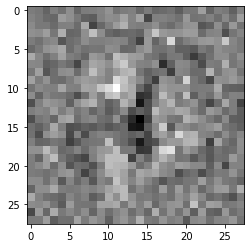

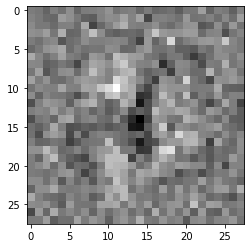

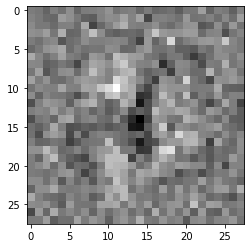

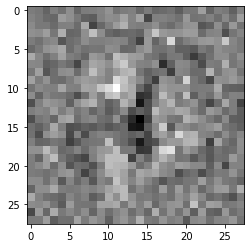

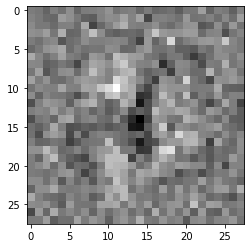

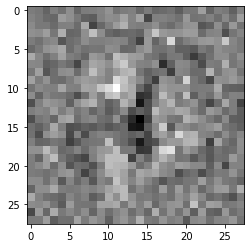

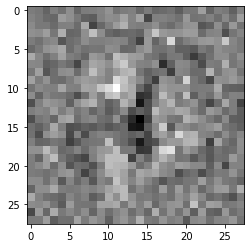

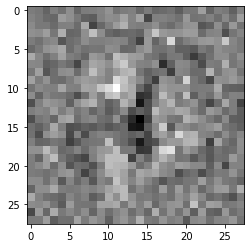

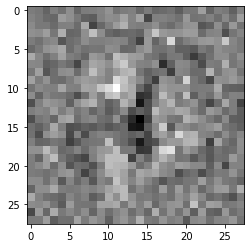

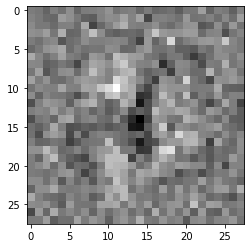

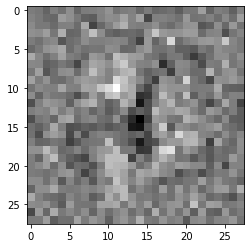

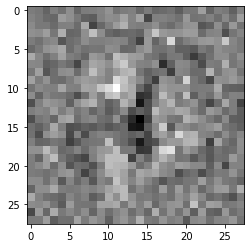

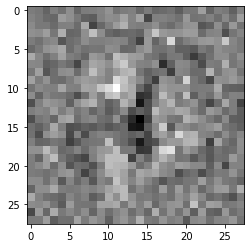

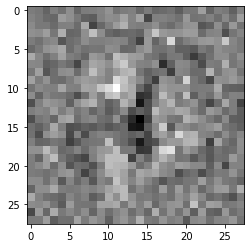

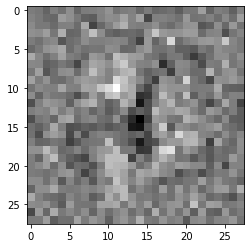

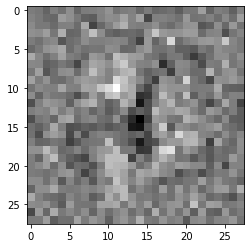

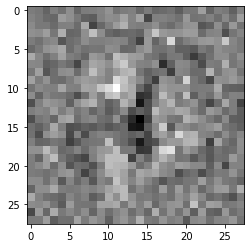

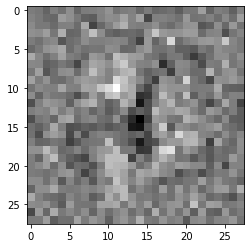

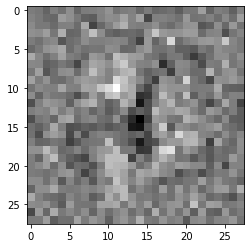

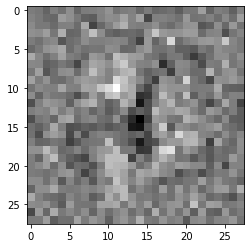

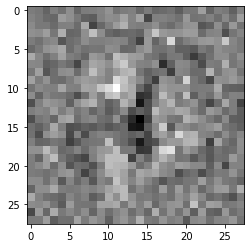

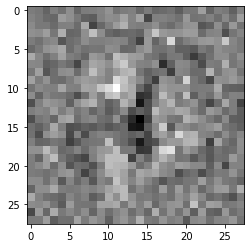

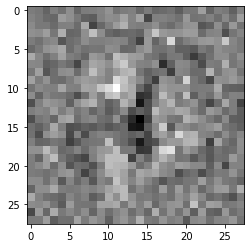

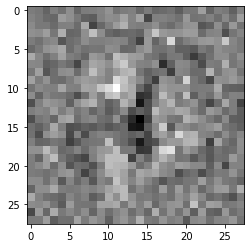

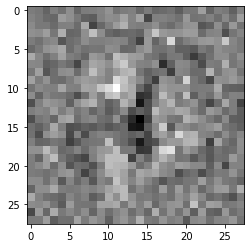

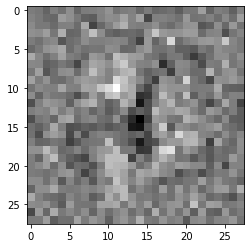

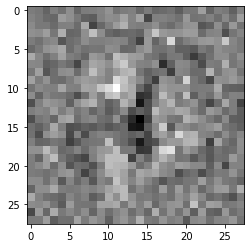

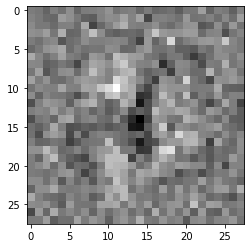

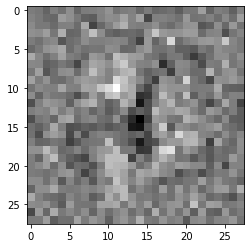

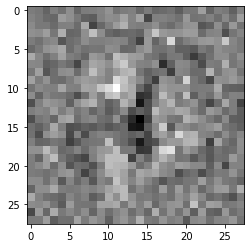

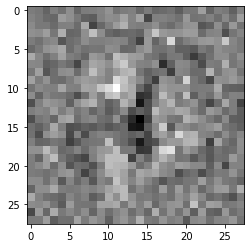

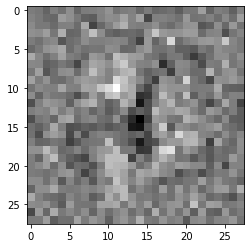

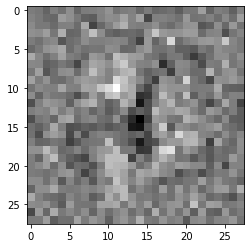

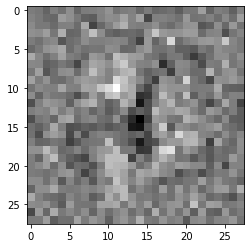

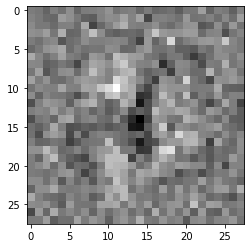

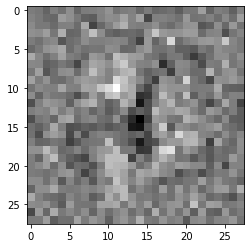

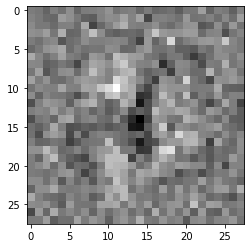

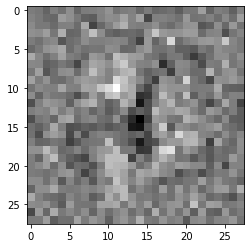

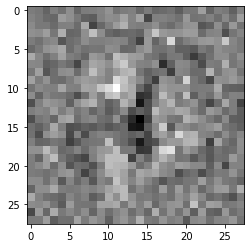

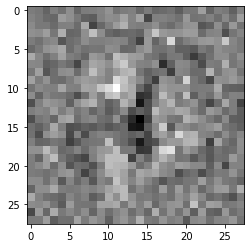

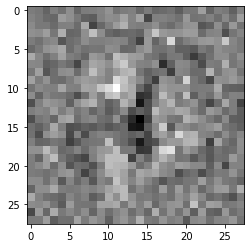

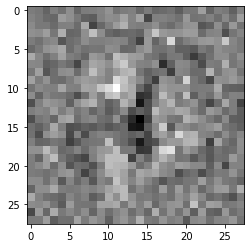

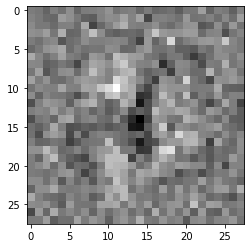

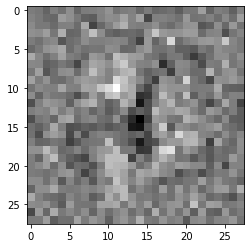

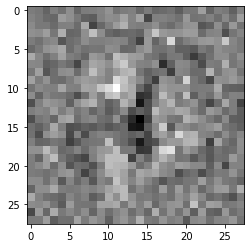

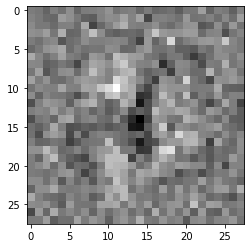

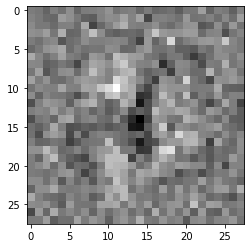

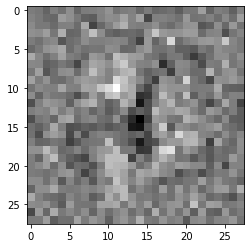

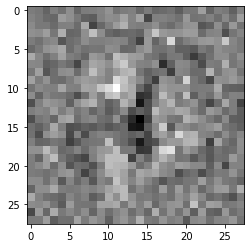

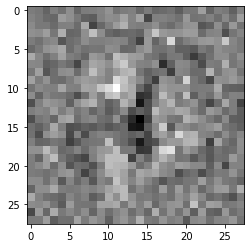

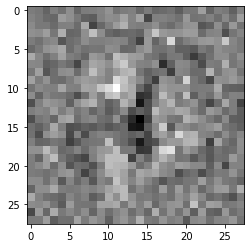

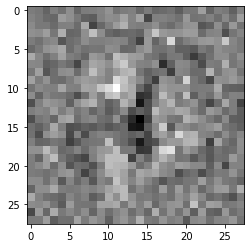

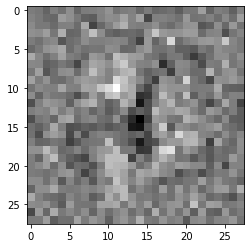

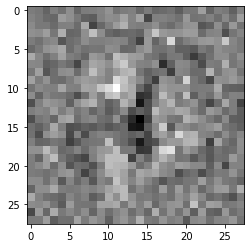

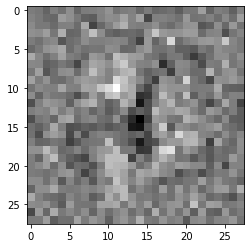

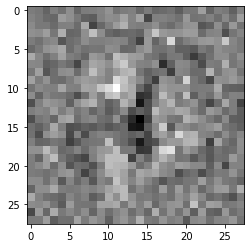

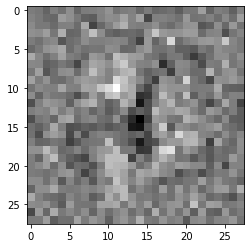

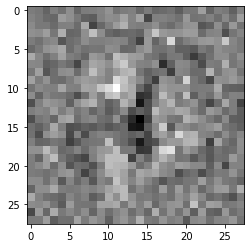

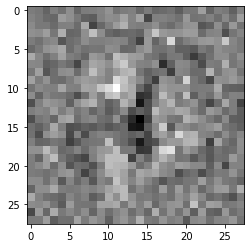

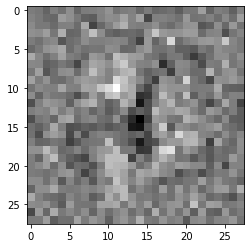

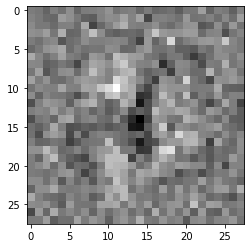

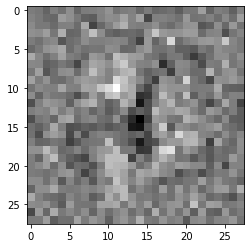

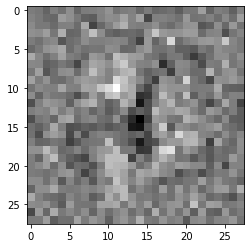

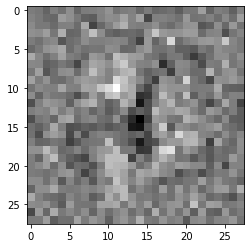

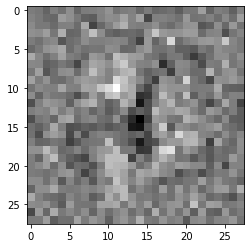

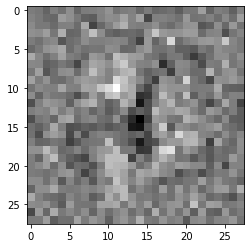

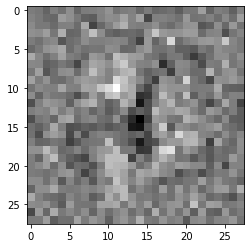

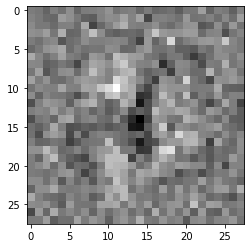

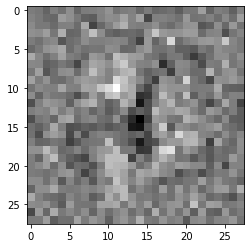

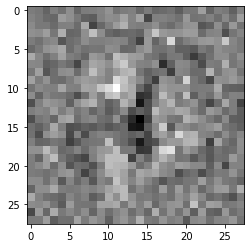

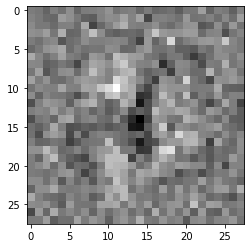

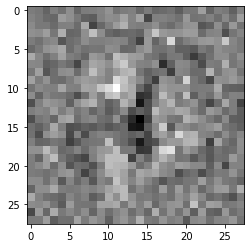

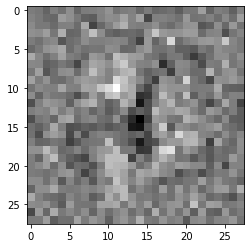

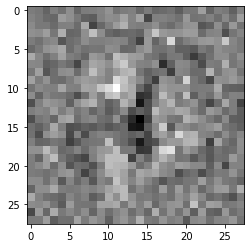

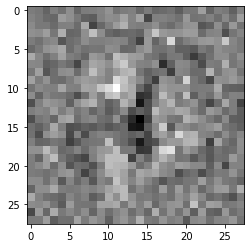

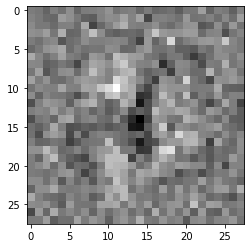

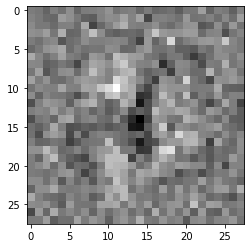

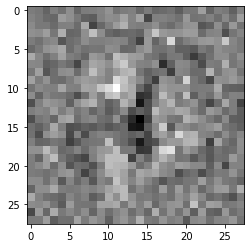

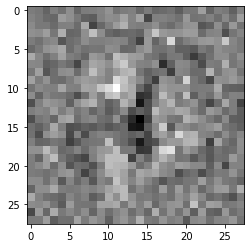

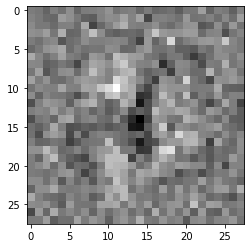

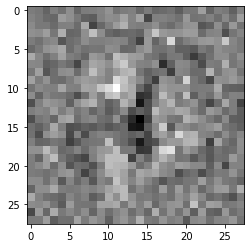

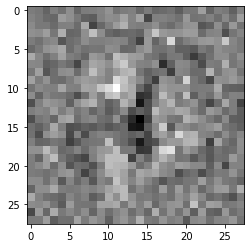

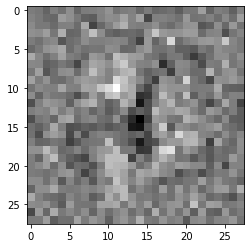

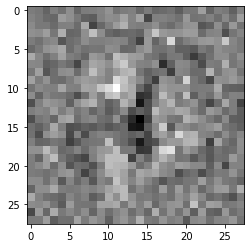

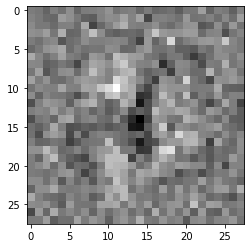

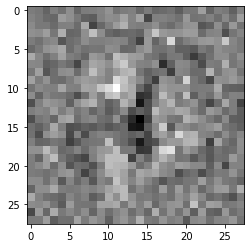

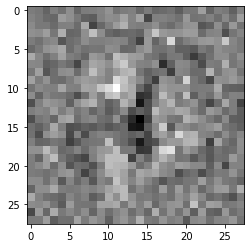

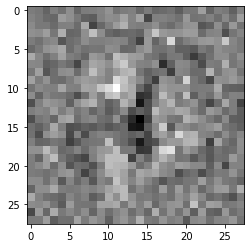

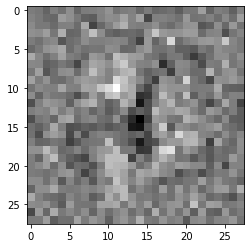

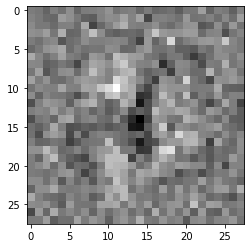

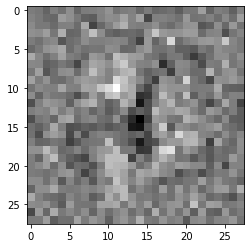

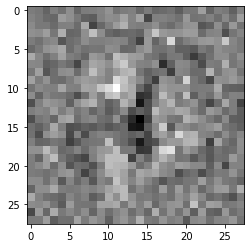

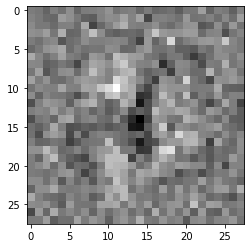

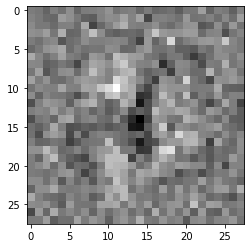

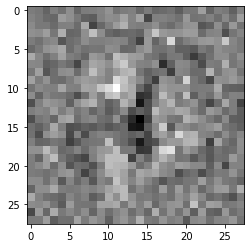

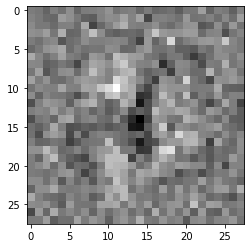

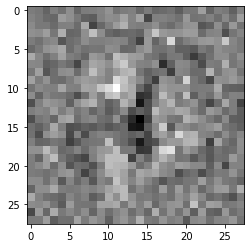

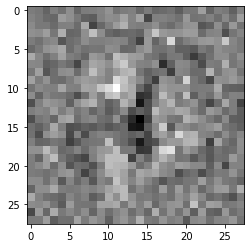

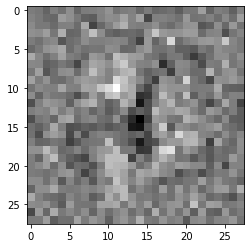

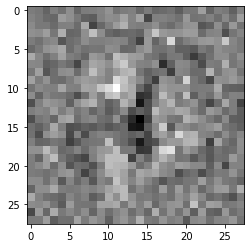

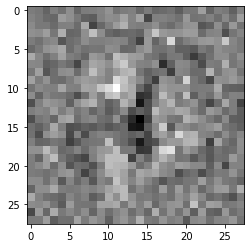

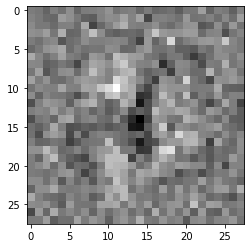

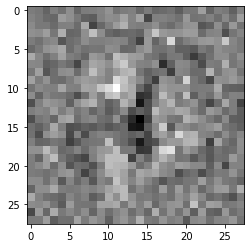

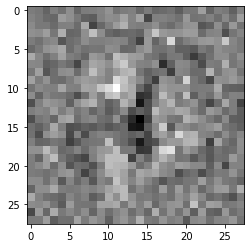

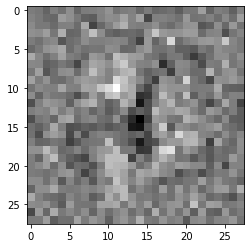

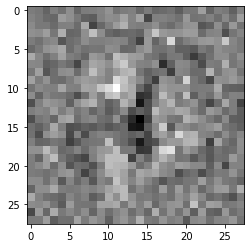

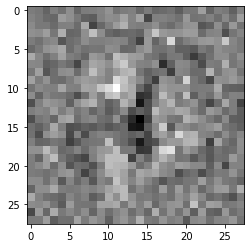

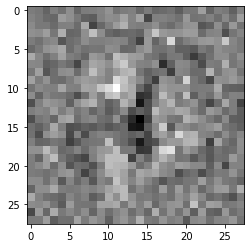

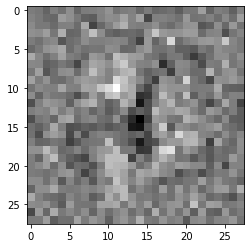

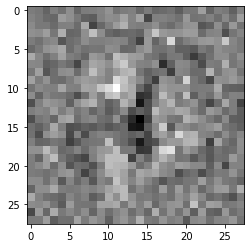

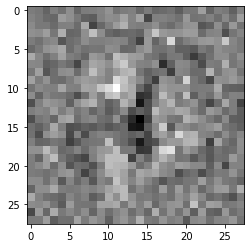

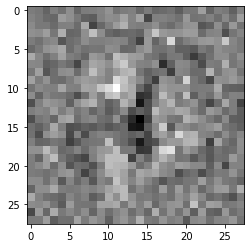

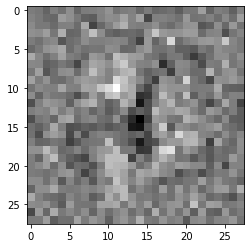

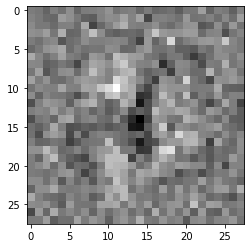

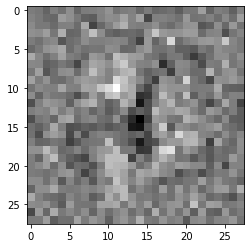

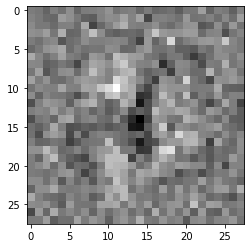

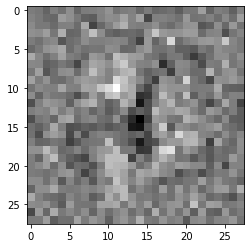

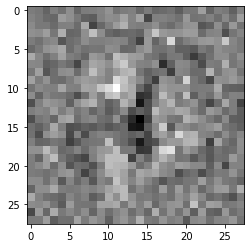

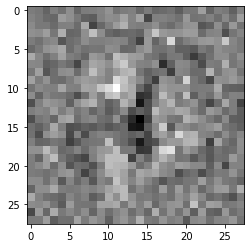

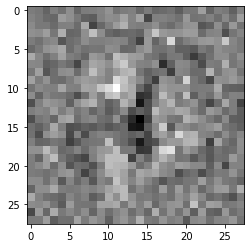

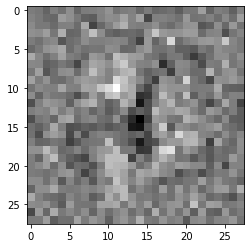

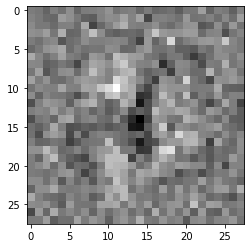

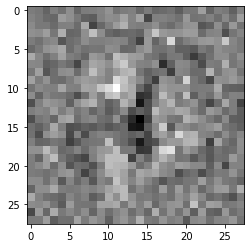

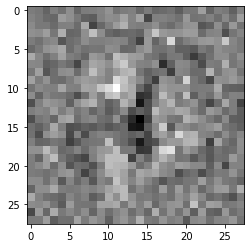

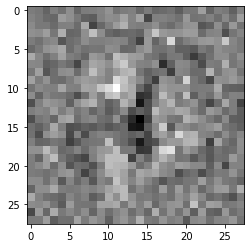

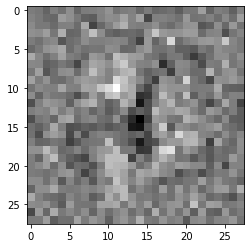

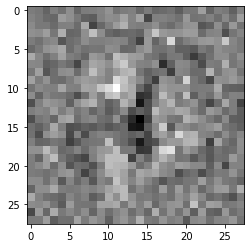

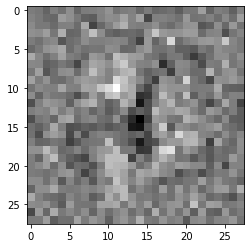

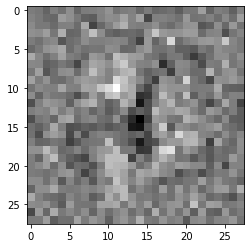

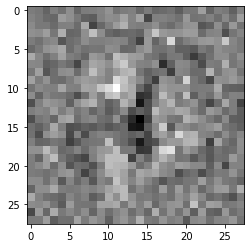

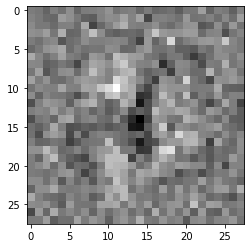

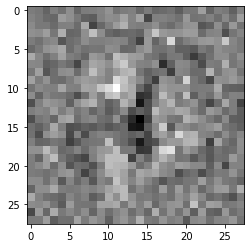

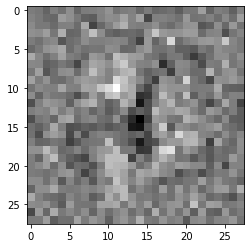

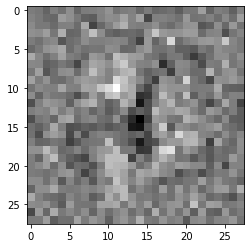

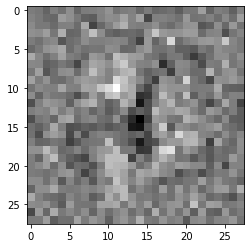

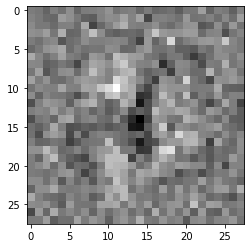

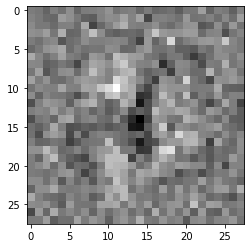

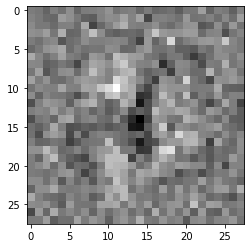

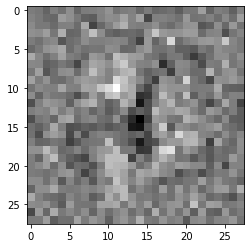

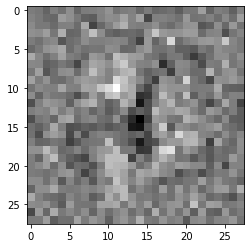

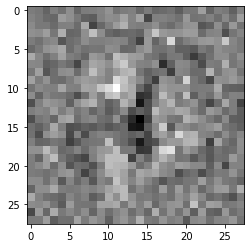

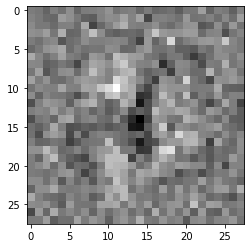

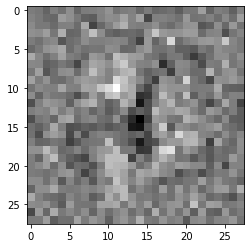

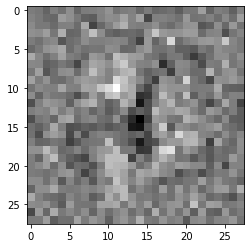

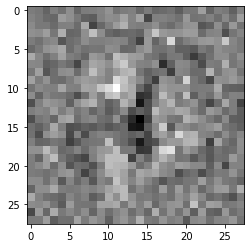

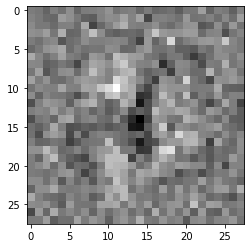

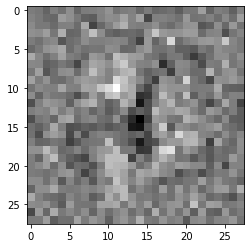

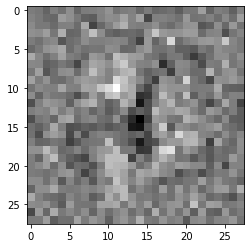

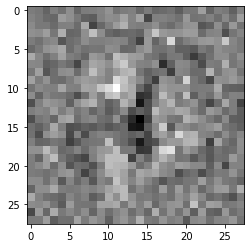

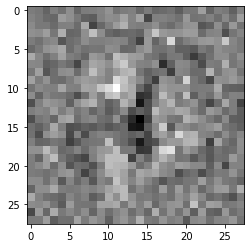

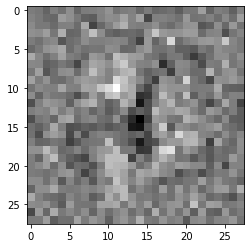

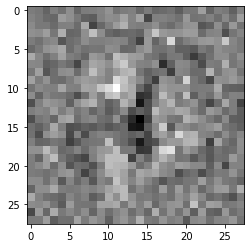

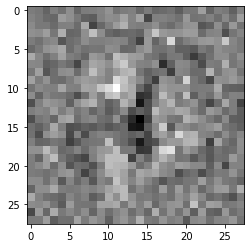

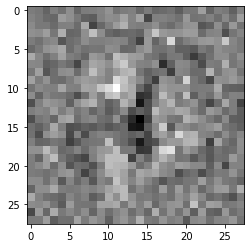

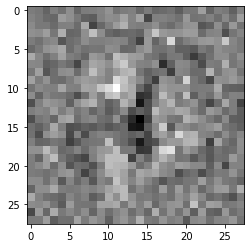

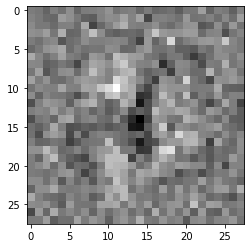

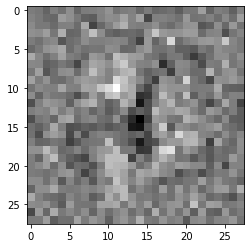

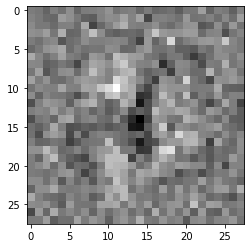

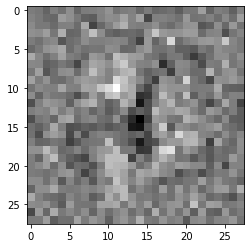

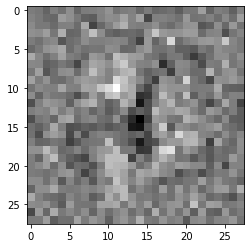

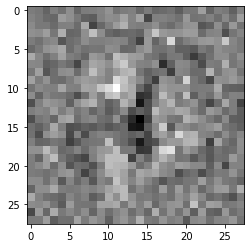

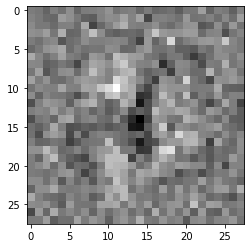

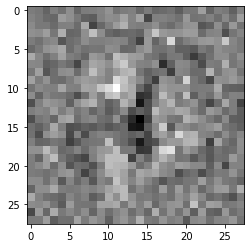

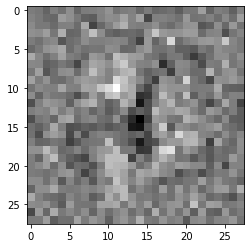

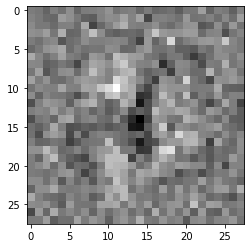

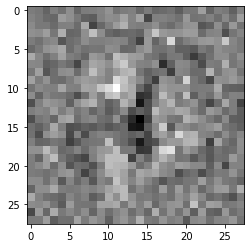

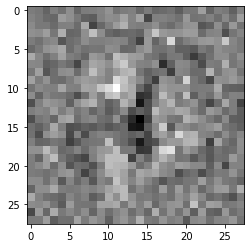

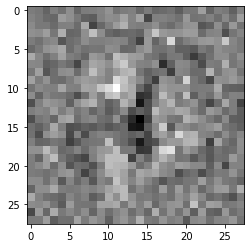

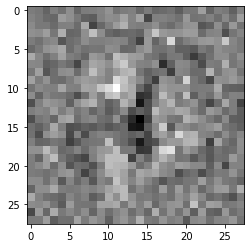

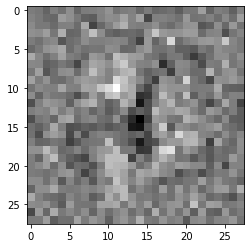

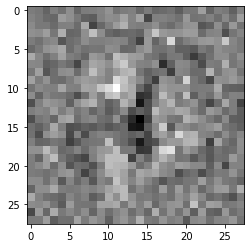

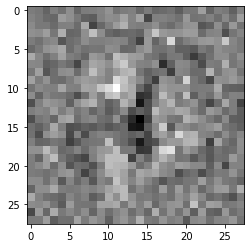

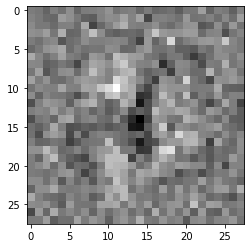

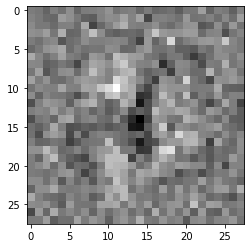

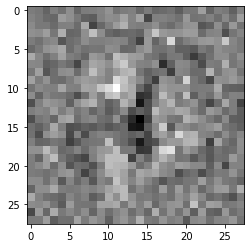

In [137]:
#visualization of the weights of the hidden layer
W1 = final_weights[1]
for i in range(len(W1)):
    input = W1[0][:-1].reshape(28,28)
    plt.imshow(input, cmap='gray') 
    plt.show()

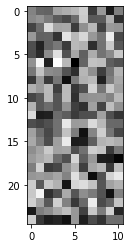

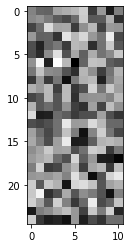

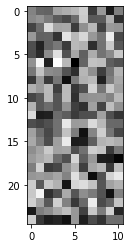

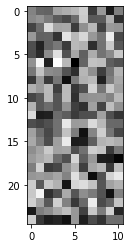

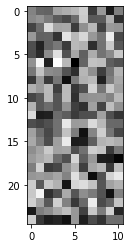

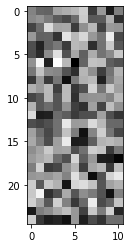

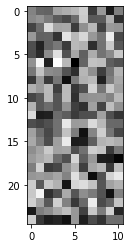

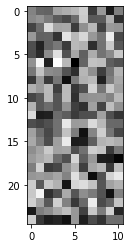

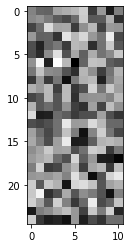

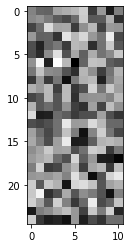

In [136]:
#visualization of the weights of the output layer
W2 = final_weights[2]
for i in range(len(W2)):
    input = W2[0].reshape(25,11)
    plt.imshow(input, cmap='gray') 
    plt.show()